In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.metrics          import mean_squared_error as mse
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api      import ExponentialSmoothing, SimpleExpSmoothing, Holt
from IPython.display          import display
from pylab                    import rcParams
import statsmodels.tools.eval_measures as      em

from sklearn.linear_model import LinearRegression


In [149]:
rcParams['figure.figsize'] = 20,8

# 1.1)

## Reading the data as a monthly Time Series from the '.csv' file :

In [150]:
df = pd.read_csv('Sparkling.csv')
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [151]:
df.duplicated().sum()

0

#### Before converting the dataset into a time series data we have checked for duplicate rows and found none. This was done as after the converion the dataset will only contain a single column of monthly sales values which can get repeated. this doesnot mean that there is an error. 

In [152]:
df1 = pd.read_csv('Sparkling.csv', parse_dates = True, index_col = 'YearMonth')

In [153]:
df1.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [154]:
df1.tail()

,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


Now, we have our data ready for the Time Series Analysis.

## Time series plot (Plotting the Time Series data) :

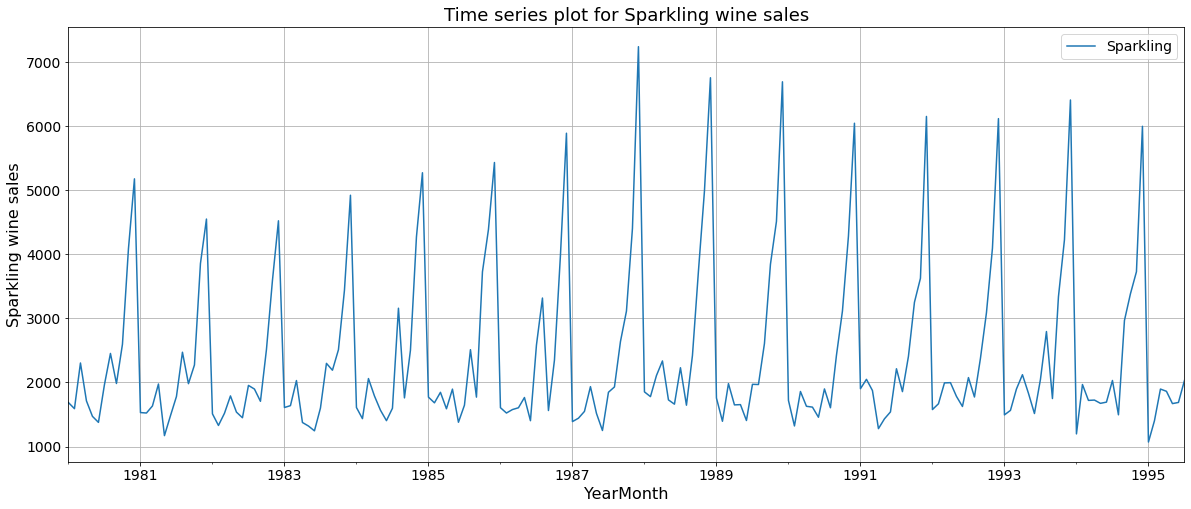

In [155]:
df1.plot(grid=True , fontsize=14)
plt.xlabel('YearMonth', fontsize=16)
plt.ylabel('Sparkling wine sales', fontsize=16)

plt.legend(fontsize=14)
plt.title('Time series plot for Sparkling wine sales', fontsize=18)
plt.show()

# 1.2)

## EDA :

In [156]:
print('Total number of rows in the dataset:',df1.shape[0])
print('Total number of columns in the dataset:',df1.shape[1])

Total number of rows in the dataset: 187
Total number of columns in the dataset: 1


In [157]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


### Checking the basic measures of descriptive statistics of the Time Series data :

In [158]:
round(df1.describe(),3)

,Sparkling
count,187.000
mean,2402.417
std,1295.112
min,1070.000
25%,1605.000
50%,1874.000
75%,2549.000
max,7242.000


In [159]:
print('Number of null or missing values in the dataset:\n',df1.isnull().sum())

Number of null or missing values in the dataset:
 Sparkling    0
dtype: int64


## Yearly boxplot

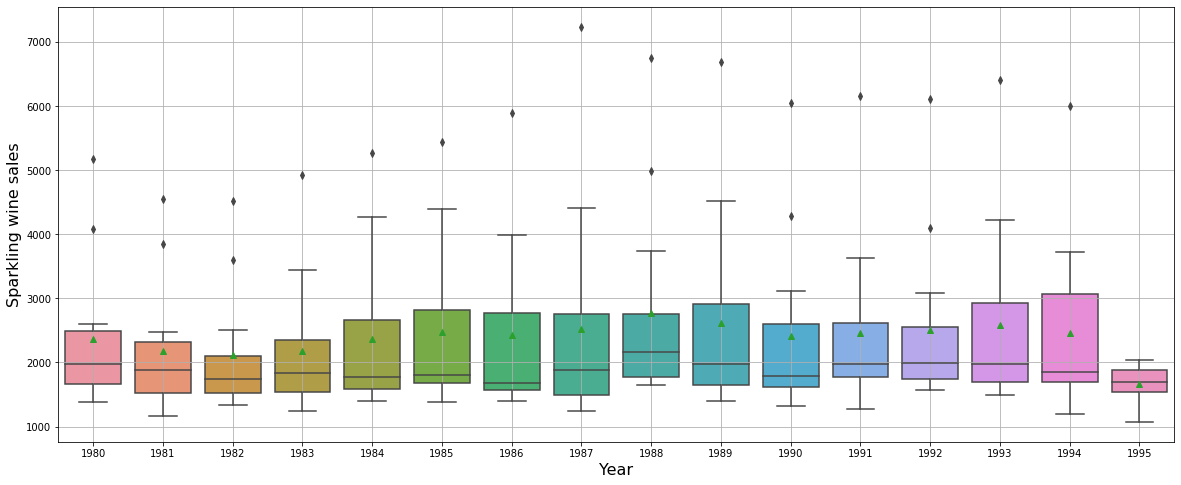

In [160]:
sns.boxplot(x = df1.index.year,y = df1['Sparkling'], showmeans=True)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Sparkling wine sales', fontsize=16)
plt.grid();

## Monthly boxplot

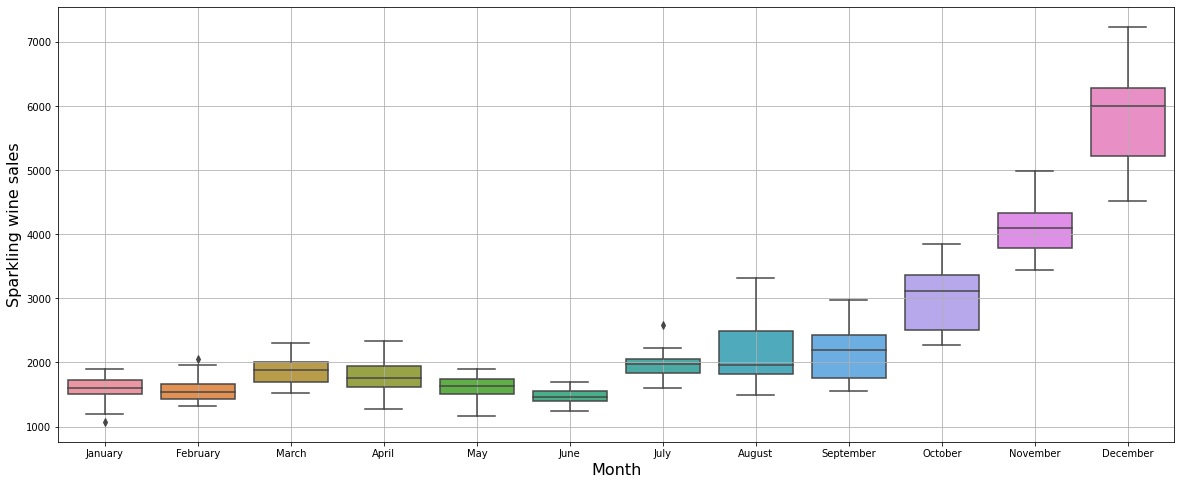

In [161]:
sns.boxplot(x = df1.index.month_name(),y = df1['Sparkling'])
plt.xlabel('Month', fontsize=16)
plt.ylabel('Sparkling wine sales', fontsize=16)
plt.grid();

### Plotting graph of monthly Wine Sales across years:

In [162]:
monthly_sales = pd.pivot_table(df1, values = 'Sparkling', columns = df1.index.month, index = df1.index.year)
monthly_sales

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


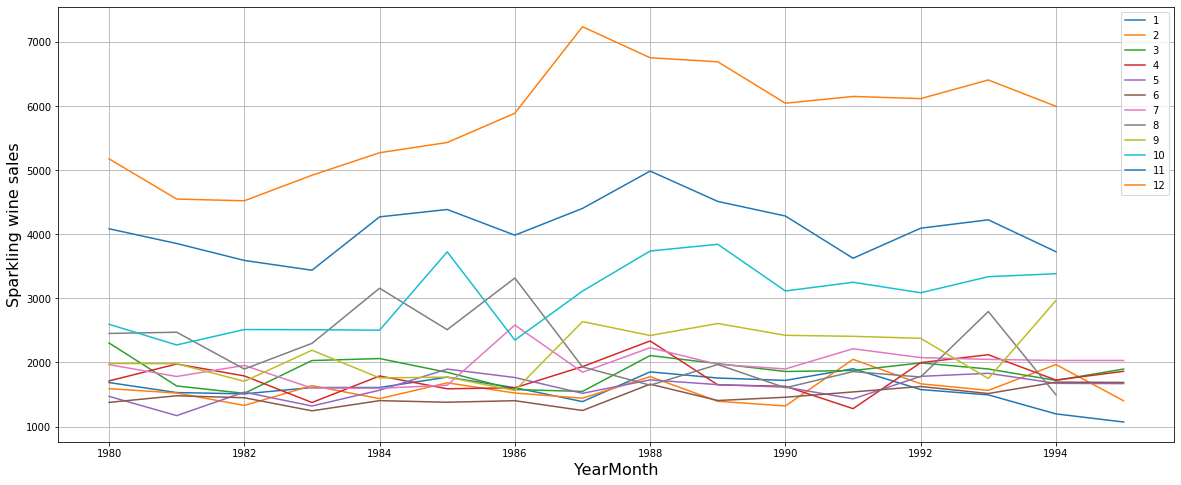

In [163]:
monthly_sales.plot()
plt.xlabel('YearMonth', fontsize=16)
plt.ylabel('Sparkling wine sales', fontsize=16)
plt.grid()
plt.legend(loc='best');

### Plotting the Empirical Cumulative Distribution:

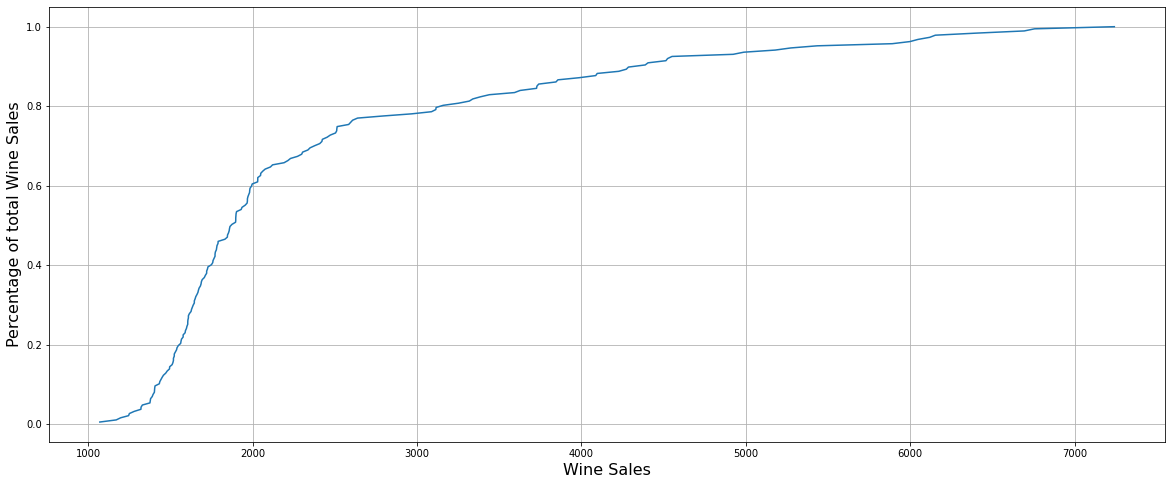

In [164]:
from statsmodels.distributions.empirical_distribution import ECDF

cdf = ECDF(df1['Sparkling'])
plt.plot(cdf.x, cdf.y);
plt.grid()
plt.ylabel('Percentage of total Wine Sales', fontsize=16);
plt.xlabel('Wine Sales', fontsize=16);

## Performing Decomposition :

### Additive Decomposition :

In [165]:
df1_add_decompose = seasonal_decompose(df1, model = 'additive')

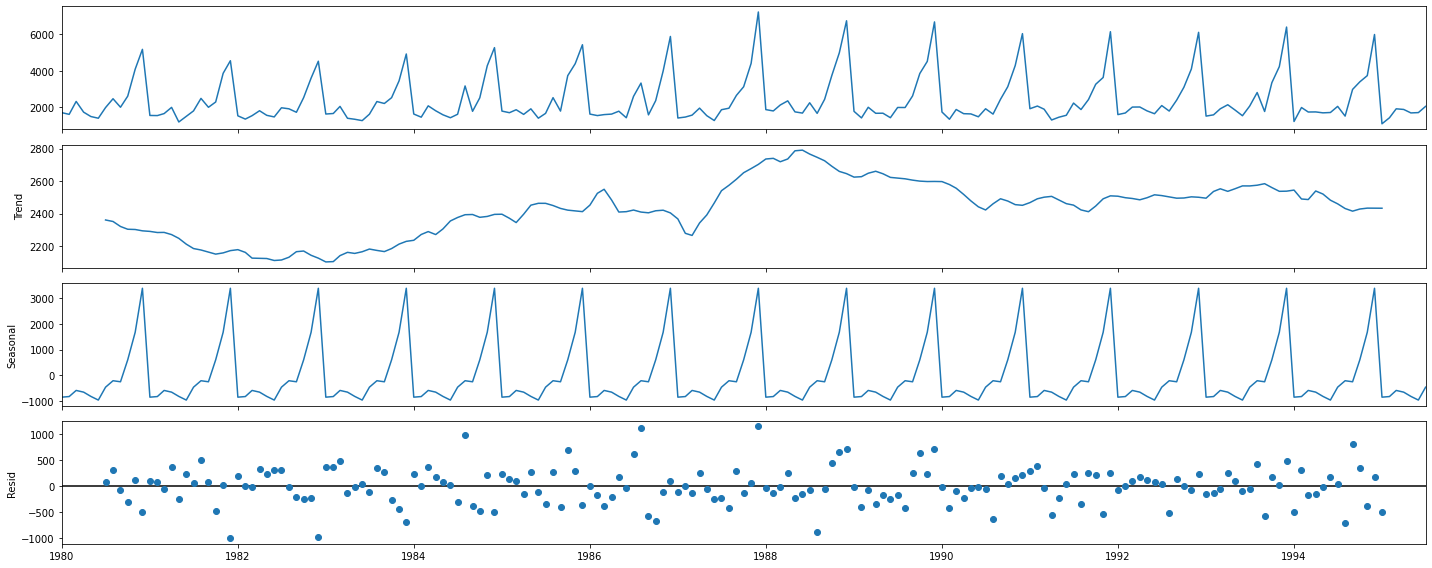

In [166]:
df1_add_decompose.plot();
plt.show()


### Multiplicative Decomposition :

In [167]:
df1_mult_decompose = seasonal_decompose(df1, model = 'multiplicative')

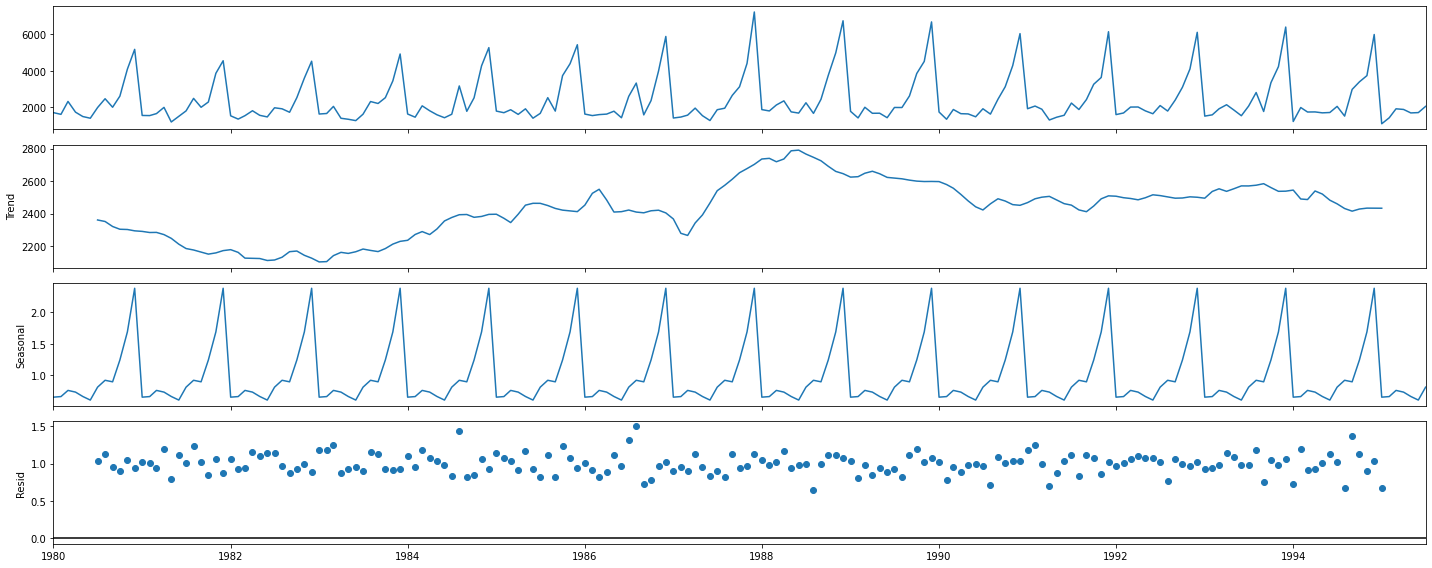

In [168]:
df1_mult_decompose.plot()
plt.show()

# 1.3)

## Splitting the data into train and test and plotting the train and test data. [Test data should start in 1991]

In [169]:
train = df1[df1.index<'1991'] 
test  = df1[df1.index>='1991']

In [170]:
print(df1.shape)
print(train.shape)
print(test.shape)

(187, 1)
(132, 1)
(55, 1)


In [171]:
print('Total number of rows in the training dataset:',train.shape[0])
print('Total number of columns in the training dataset:',train.shape[1])

Total number of rows in the training dataset: 132
Total number of columns in the training dataset: 1


In [172]:
print('Total number of rows in the testing dataset:',test.shape[0])
print('Total number of columns in the testing dataset:',test.shape[1])

Total number of rows in the testing dataset: 55
Total number of columns in the testing dataset: 1


In [173]:
from IPython.display import display

In [174]:
print('First few rows of Training Data')
display(train.head())
print('\n\n')
print('Last few rows of Training Data')
display(train.tail())
print('\n\n')
print('First few rows of Test Data')
display(test.head())
print('\n\n')
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471





Last few rows of Training Data


,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047





First few rows of Test Data


,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432





Last few rows of Test Data


,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


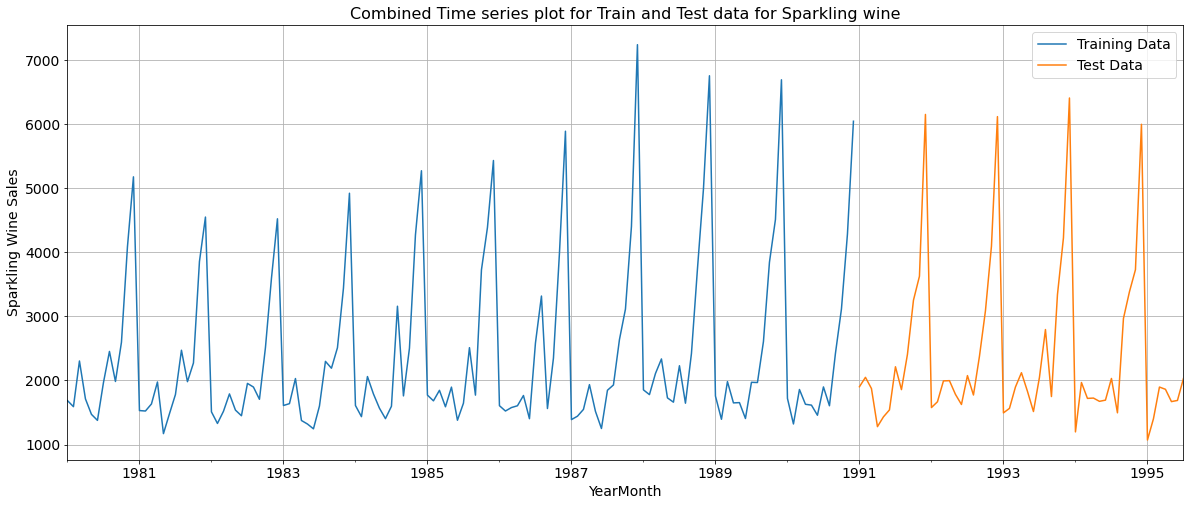

In [175]:
train['Sparkling'].plot(fontsize=14)
test['Sparkling'].plot(fontsize=14)
plt.xlabel('YearMonth', fontsize=14)
plt.ylabel('Sparkling Wine Sales', fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'], fontsize=14)
plt.title('Combined Time series plot for Train and Test data for Sparkling wine', fontsize=16)
plt.show()

----

-----

# 1.4) Building different models and checking their performance metrics using RMSE

## Model 1: Linear Regression

We know that Linear regression needs at least one independent variable X to explain the target variable, Y but here we only have one variable available that is Wine sales 'Sparkling', as we converted the date-time variable into the index. So now we will define an independent variable by assigning it to a new column 'time' both for train and test data

In [176]:
print(df1.shape)
print(train.shape)
print(test.shape)

(187, 1)
(132, 1)
(55, 1)


In [177]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('\n')
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [178]:
LnR_train = train.copy()
LnR_test = test.copy()

In [179]:
LnR_train['time'] = train_time
LnR_test['time'] = test_time

print('First few rows of Training Data')
display(LnR_train.head())
print('Last few rows of Training Data')
display(LnR_train.tail())
print('First few rows of Test Data')
display(LnR_test.head())
print('Last few rows of Test Data')
display(LnR_test.tail())

First few rows of Training Data


,Sparkling,time
YearMonth,,
1980-01-01,1686,1
1980-02-01,1591,2
1980-03-01,2304,3
1980-04-01,1712,4
1980-05-01,1471,5


Last few rows of Training Data


,Sparkling,time
YearMonth,,
1990-08-01,1605,128
1990-09-01,2424,129
1990-10-01,3116,130
1990-11-01,4286,131
1990-12-01,6047,132


First few rows of Test Data


,Sparkling,time
YearMonth,,
1991-01-01,1902,133
1991-02-01,2049,134
1991-03-01,1874,135
1991-04-01,1279,136
1991-05-01,1432,137


Last few rows of Test Data


,Sparkling,time
YearMonth,,
1995-03-01,1897,183
1995-04-01,1862,184
1995-05-01,1670,185
1995-06-01,1688,186
1995-07-01,2031,187


Now that our training and test data has been modified, let us go ahead use Linear Regression to build the model on the training data and test the model on the test data.

#### Fitting the Linear model:

In [180]:
lr = LinearRegression()

In [181]:
lr.fit(LnR_train[['time']],LnR_train['Sparkling'])

LinearRegression()

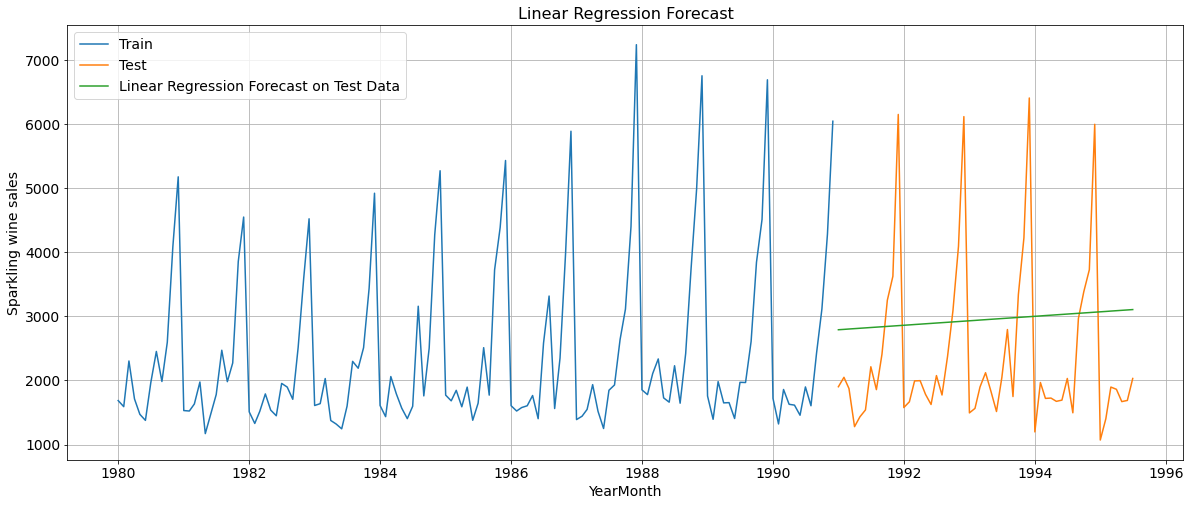

In [182]:
train_predict_model1   = lr.predict(LnR_train[['time']])
LnR_train['LnR_forecast'] = train_predict_model1

test_predict_model1    = lr.predict(LnR_test[['time']])
LnR_test['LnR_forecast']  = test_predict_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LnR_test['LnR_forecast'], label='Linear Regression Forecast on Test Data')

plt.legend(loc='best', fontsize=14)
plt.title('Linear Regression Forecast', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('YearMonth', fontsize=14)
plt.ylabel('Sparkling wine sales', fontsize=14)
plt.grid();

In [183]:
LnR_test.head()

,Sparkling,time,LnR_forecast
YearMonth,,,
1991-01-01,1902,133,2791.652093
1991-02-01,2049,134,2797.484752
1991-03-01,1874,135,2803.317410
1991-04-01,1279,136,2809.150069
1991-05-01,1432,137,2814.982727


#### Defining the functions for calculating the accuracy metrics.

### Model Evaluation

In [184]:
rmse_model1_test = mse(test['Sparkling'],test_predict_model1,squared=False)
print("For Linear Regression forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For Linear Regression forecast on the Test Data,  RMSE is 1389.135 


In [185]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['LnR_forecast'])
resultsDf

,Test RMSE
LnR_forecast,1389.135175


----

## Model 2: Naive Approach: 

#### In the Naive model, the prediction for tomorrow is the same as today and the prediction for day after tomorrow is same as tomorrow and therefore as the prediction of tomorrow is same as today, the prediction for day after tomorrow should also be today by following the logic.

In [186]:
Naive_train = train.copy()
Naive_test = test.copy()

In [187]:
len(train['Sparkling'])

132

In [188]:
Naive_test['naive'] = train['Sparkling'][len(train['Sparkling'])-1]
Naive_test.head()

,Sparkling,naive
YearMonth,,
1991-01-01,1902,6047
1991-02-01,2049,6047
1991-03-01,1874,6047
1991-04-01,1279,6047
1991-05-01,1432,6047


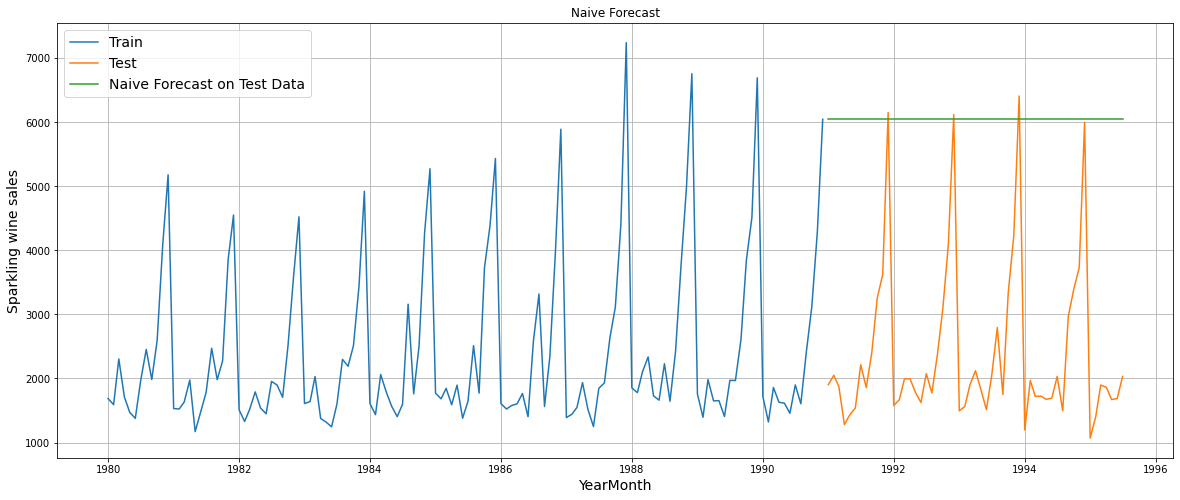

In [189]:
plt.plot(Naive_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(Naive_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best', fontsize=14)
plt.title("Naive Forecast")
plt.xlabel('YearMonth', fontsize=14)
plt.ylabel('Sparkling wine sales', fontsize=14)
plt.grid();

### Model Evaluation

In [190]:
rmse_model2_test = mse(test['Sparkling'],Naive_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 3864.279


In [191]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive_forecast'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
LnR_forecast,1389.135175
Naive_forecast,3864.279352


---

## Model 3: Simple Average

#### In simple average method, we forecast by simply using the average of the training values.

In [192]:
SimpAvg_train = train.copy()
SimpAvg_test = test.copy()

In [193]:
SimpAvg_test['mean_forecast'] = train['Sparkling'].mean()
SimpAvg_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


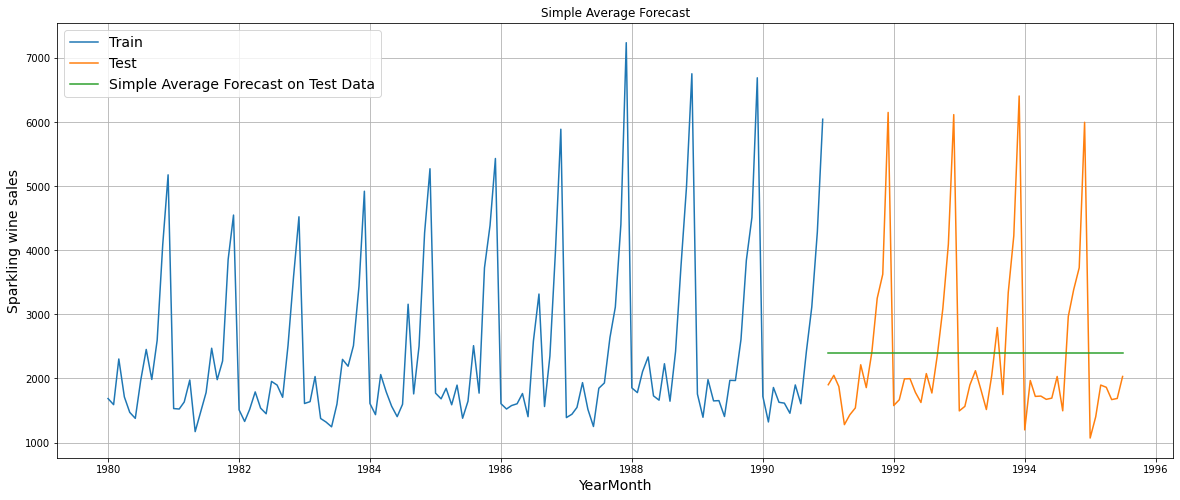

In [194]:
plt.plot(SimpAvg_train['Sparkling'], label='Train')
plt.plot(SimpAvg_test['Sparkling'], label='Test')

plt.plot(SimpAvg_test['mean_forecast'], label='Simple Average Forecast on Test Data')

plt.legend(loc='best', fontsize=14)
plt.title("Simple Average Forecast")
plt.xlabel('YearMonth', fontsize=14)
plt.ylabel('Sparkling wine sales', fontsize=14)
plt.grid();

### Model Evaluation

In [195]:
rmse_model3_test = mse(test['Sparkling'],SimpAvg_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [196]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAvg_forecast'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
LnR_forecast,1389.135175
Naive_forecast,3864.279352
SimpleAvg_forecast,1275.081804


----

## Model 4: Simple Exponential Smoothing 

In [197]:
ses = SimpleExpSmoothing(train,initialization_method='estimated')
ses_autofit = ses.fit(optimized=True)

Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters


In [198]:
ses_autofit.params

{'smoothing_level': 0.07028781387269083,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.926982743667,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Using the fitted model on the training set to forecast on the test set

In [199]:
ses_predict = ses_autofit.forecast(steps=len(test))
ses_predict.head()

1991-01-01    2804.662711
1991-02-01    2804.662711
1991-03-01    2804.662711
1991-04-01    2804.662711
1991-05-01    2804.662711
Freq: MS, dtype: float64

Plotting the Training data, Test data and the forecasted values

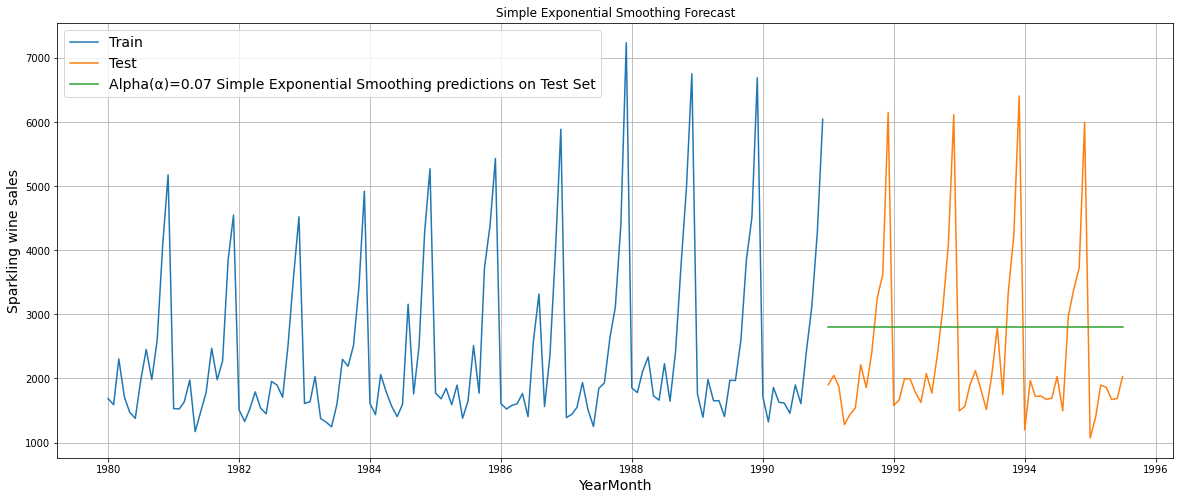

In [200]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(ses_predict, label='Alpha(⍺)=0.07 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best', fontsize=14)
plt.xlabel('YearMonth', fontsize=14)
plt.ylabel('Sparkling wine sales', fontsize=14)
plt.grid()
plt.title('Simple Exponential Smoothing Forecast');

In [201]:
rmse_model4_test = mse(test['Sparkling'],ses_predict,squared=False)
print("For Simple Exponential Smoothing forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For Simple Exponential Smoothing forecast on the Test Data,  RMSE is 1338.005


In [202]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test]}
                           ,index=['Simple_Exp_Smoothing_forecast'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
LnR_forecast,1389.135175
Naive_forecast,3864.279352
SimpleAvg_forecast,1275.081804
Simple_Exp_Smoothing_forecast,1338.004622


---

## Model 5: Double Exponential Smoothing 

Initializing and fitting the Double Exponential Smoothing Model

In [203]:
hlt = Holt(train,initialization_method='estimated')
des = hlt.fit()
print(des.params)

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999996, 'initial_trend': 74.87272727272749, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


Forecasting using this model for the duration of the test set

In [204]:
des_predict =  des.forecast(len(test))
des_predict.head()

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
Freq: MS, dtype: float64

Plotting the Training data, Test data and the forecasted values

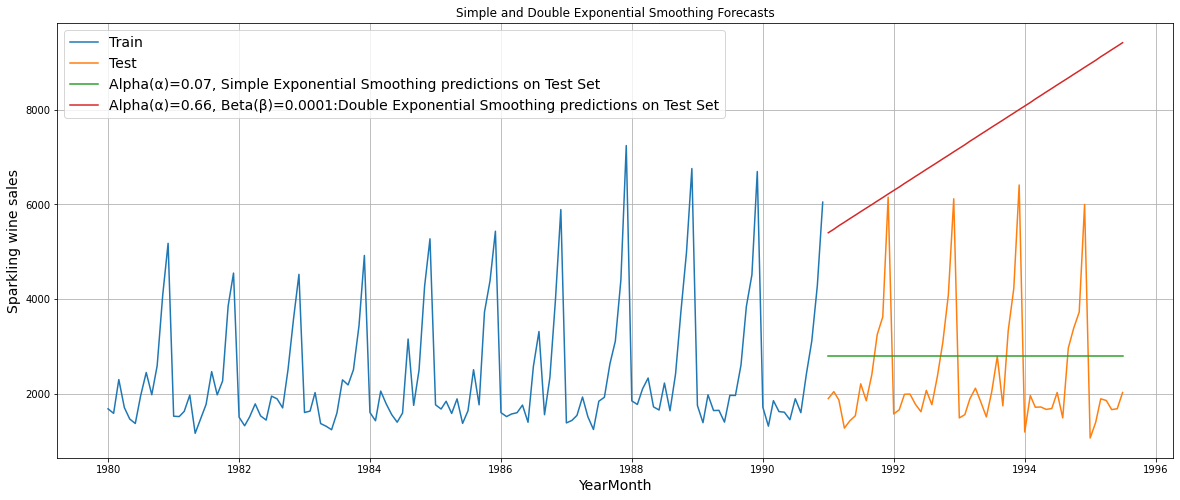

In [205]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(ses_predict, label='Alpha(⍺)=0.07, Simple Exponential Smoothing predictions on Test Set')
plt.plot(des_predict, label='Alpha(⍺)=0.66, Beta(β)=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best', fontsize=14)
plt.xlabel('YearMonth', fontsize=14)
plt.ylabel('Sparkling wine sales', fontsize=14)
plt.grid()
plt.title('Simple and Double Exponential Smoothing Forecasts');

In [206]:
rmse_model5_test = mse(test['Sparkling'],des_predict,squared=False)
print("For Double Exponential Smoothing forecast on the Test Data,  RMSE is %3.3f" %(rmse_model5_test))


For Double Exponential Smoothing forecast on the Test Data,  RMSE is 5291.880


In [207]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test]}
                           ,index=['Double_Exp_Smoothing_forecast'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
LnR_forecast,1389.135175
Naive_forecast,3864.279352
SimpleAvg_forecast,1275.081804
Simple_Exp_Smoothing_forecast,1338.004622
Double_Exp_Smoothing_forecast,5291.879833


### Inference: 

Here, we see that the Double Exponential Smoothing has actually done worse when compared to the Simple Exponential Smoothing. This may be because of the fact that the Double Exponential Smoothing model has picked up the trend component but ignored seasonality which has a strong presence in this data.



----

## Triple Exponential Smoothing 

## Model 6: Holt Winter's linear method with additive errors 

Initializing and fitting the Triple Exponential Smoothing Model


In [208]:
tes_add = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
tes_add_autofit = tes_add.fit()
print(tes_add.params)

{'smoothing_level': 0.11127227070058084, 'smoothing_trend': 0.012360803767807805, 'smoothing_seasonal': 0.46071766872684583, 'damping_trend': nan, 'initial_level': 2356.5778681222832, 'initial_trend': -0.10270745178835987, 'initial_seasons': array([-636.23324792, -722.98325584, -398.64405431, -473.43062126,
       -808.42495535, -815.3499128 , -384.23070619,   72.99473065,
       -237.44231481,  272.32597115, 1541.37736754, 2590.07675275]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


Forecasting using this model for the duration of the test set


In [209]:
tes_add_predict =  tes_add_autofit.forecast(len(test))
tes_add_predict.head()

1991-01-01    1490.402345
1991-02-01    1204.524549
1991-03-01    1688.733523
1991-04-01    1551.225407
1991-05-01    1461.197109
Freq: MS, dtype: float64

Plotting the Training data, Test data and the forecasted values


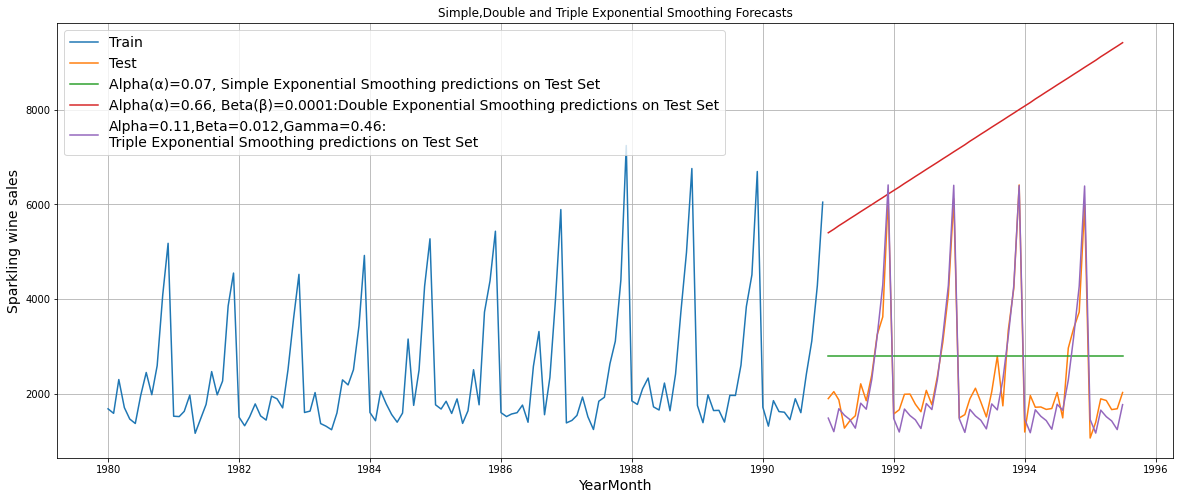

In [210]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(ses_predict, label='Alpha(⍺)=0.07, Simple Exponential Smoothing predictions on Test Set')
plt.plot(des_predict, label='Alpha(⍺)=0.66, Beta(β)=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.plot(tes_add_predict, label='Alpha=0.11,Beta=0.012,Gamma=0.46:\nTriple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best', fontsize=14)
plt.xlabel('YearMonth', fontsize=14)
plt.ylabel('Sparkling wine sales', fontsize=14)
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Forecasts');

#### We see that the Triple Exponential Smoothing is picking up the seasonal component pretty well.

### Model Evaluation

In [211]:
rmse_model6_test = mse(test['Sparkling'],tes_add_predict,squared=False)
print("For Triple Exponential additive Smoothing forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test))


For Triple Exponential additive Smoothing forecast on the Test Data,  RMSE is 378.952


In [212]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test]}
                           ,index=['Triple_Exp_additive_Smoothing_forecast'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
LnR_forecast,1389.135175
Naive_forecast,3864.279352
SimpleAvg_forecast,1275.081804
Simple_Exp_Smoothing_forecast,1338.004622
Double_Exp_Smoothing_forecast,5291.879833
Triple_Exp_additive_Smoothing_forecast,378.952065


## Brute forced triple exponential smoothing with additive errors:

In [213]:
hw_train= train.copy()
hw_test= test.copy()

In [214]:
metrics1 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
metrics1

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [215]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            metrics1_i_j_k = tes_add.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            hw_train['predict',i,j,k] = metrics1_i_j_k.fittedvalues
            hw_test['predict',i,j,k] = metrics1_i_j_k.forecast(steps=len(test))
        
            rmse_model7_1_train = mse(hw_train['Sparkling'],hw_train['predict',i,j,k],squared=False)
            
            rmse_model7_1_test = mse(hw_test['Sparkling'],hw_test['predict',i,j,k],squared=False)
    
            metrics1 = pd.concat([metrics1, pd.DataFrame({'Alpha Values': i, 'Beta Values': j, 'Gamma Values': k,
                                                          'Train RMSE': rmse_model7_1_train, 'Test RMSE': rmse_model7_1_test},
                                                         index=[0])], ignore_index=True)
    



In [216]:
metrics1

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.3,0.3,0.3,4.420646e+02,2.178738e+03
1,0.3,0.3,0.4,4.360458e+02,3.499728e+03
2,0.3,0.3,0.5,4.392337e+02,4.387222e+03
3,0.3,0.3,0.6,4.493725e+02,4.791647e+03
4,0.3,0.3,0.7,4.646839e+02,4.635117e+03
...,...,...,...,...,...
507,1.0,1.0,0.6,1.417157e+04,4.624388e+05
508,1.0,1.0,0.7,6.992263e+04,2.250627e+06
509,1.0,1.0,0.8,3.008867e+05,7.323386e+06
510,1.0,1.0,0.9,1.096286e+06,2.612667e+07


In [217]:
metrics1.sort_values(by=['Test RMSE']).head()


,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
129,0.5,0.3,0.4,477.403185,649.197748
7,0.3,0.3,1.0,538.858393,687.206158
64,0.4,0.3,0.3,464.061379,734.718132
464,1.0,0.5,0.3,660.104855,769.360784
196,0.6,0.3,0.7,569.835997,926.412440


Plotting on both the Training and Test data using brute force alpha, beta and gamma determination


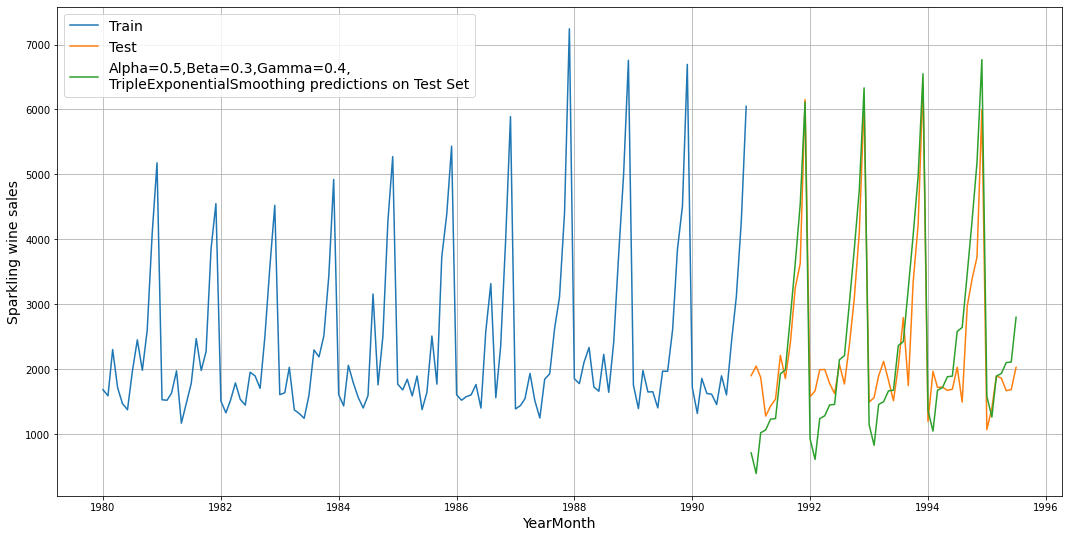

In [218]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(hw_test['predict', 0.5, 0.3, 0.4], label='Alpha=0.5,Beta=0.3,Gamma=0.4,\nTripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best', fontsize=14)
plt.xlabel('YearMonth', fontsize=14)
plt.ylabel('Sparkling wine sales', fontsize=14)
plt.grid();

In [219]:
metrics1.sort_values(by=['Test RMSE']).values[0][4]

649.197748323426

-----

## Model 7: Holt Winter's linear method with multiplicative errors

In [220]:
tes_mult = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
tes_mult_autofit = tes_mult.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(tes_mult.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11103038798513566, 'smoothing_trend': 0.04932846858258709, 'smoothing_seasonal': 0.36236926663935404, 'damping_trend': nan, 'initial_level': 2356.5093135514176, 'initial_trend': -9.637520878595717, 'initial_seasons': array([0.7158511 , 0.68367263, 0.90367729, 0.80635802, 0.65604858,
       0.65440652, 0.88628077, 1.13366001, 0.92077607, 1.21202947,
       1.8708376 , 2.3756531 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


Forecasting using this model for the duration of the test set


In [221]:
tes_mult_predict =  tes_mult_autofit.forecast(len(test))
tes_mult_predict.head()

1991-01-01    1587.919301
1991-02-01    1356.674782
1991-03-01    1763.324309
1991-04-01    1656.532782
1991-05-01    1542.374716
Freq: MS, dtype: float64

Plotting the Training data, Test data and the forecasted values


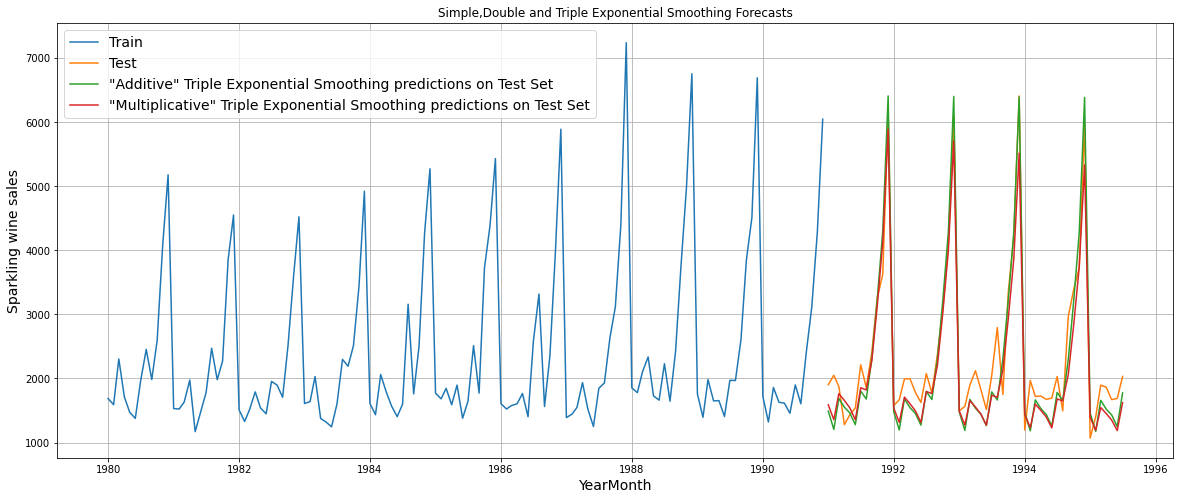

In [222]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')


plt.plot(tes_add_predict, label='"Additive" Triple Exponential Smoothing predictions on Test Set')
plt.plot(tes_mult_predict, label='"Multiplicative" Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best', fontsize=14)
plt.xlabel('YearMonth', fontsize=14)
plt.ylabel('Sparkling wine sales', fontsize=14)
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Forecasts');

Plotting exclusively for Test data and the forecasted values


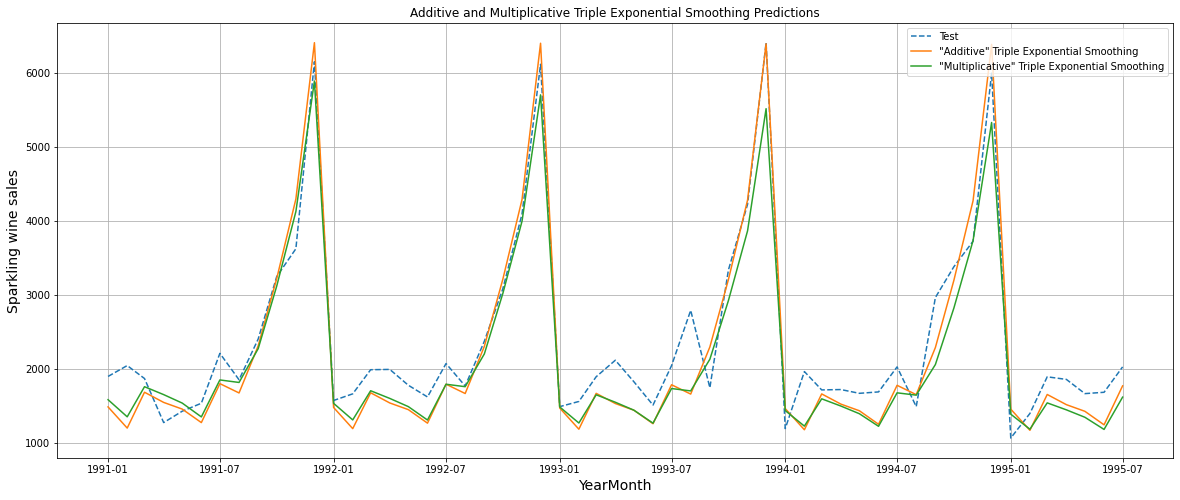

In [223]:
plt.plot(test, linestyle='dashed', label='Test')
plt.plot(tes_add_predict, label='"Additive" Triple Exponential Smoothing')
plt.plot(tes_mult_predict, label='"Multiplicative" Triple Exponential Smoothing')

plt.legend(loc='best', fontsize=10)
plt.xlabel('YearMonth', fontsize=14)
plt.ylabel('Sparkling wine sales', fontsize=14)
plt.grid()
plt.title('Additive and Multiplicative Triple Exponential Smoothing Predictions');

### Model Evaluation

In [224]:
rmse_model7_test = mse(test['Sparkling'],tes_mult_predict,squared=False)
print("For Triple Exponential multiplicative Smoothing forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test))


For Triple Exponential multiplicative Smoothing forecast on the Test Data,  RMSE is 403.012


In [225]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model7_test]}
                           ,index=['Triple_Exp_multiplicative_Smoothing_forecast'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
LnR_forecast,1389.135175
Naive_forecast,3864.279352
SimpleAvg_forecast,1275.081804
Simple_Exp_Smoothing_forecast,1338.004622
Double_Exp_Smoothing_forecast,5291.879833
Triple_Exp_additive_Smoothing_forecast,378.952065
Triple_Exp_multiplicative_Smoothing_forecast,403.012143


-----

## Model 8: Using Brute force method i.e. best parameters (alpha, beta and gamma) for Holt Winter's linear method with multiplicative errors 

In [226]:
hw_train= train.copy()
hw_test= test.copy()

In [227]:
metrics2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
metrics2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [228]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            metrics2_i_j_k = tes_mult.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            hw_train['predict',i,j,k] = metrics2_i_j_k.fittedvalues
            hw_test['predict',i,j,k] = metrics2_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = mse(hw_train['Sparkling'],hw_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = mse(hw_test['Sparkling'],hw_test['predict',i,j,k],squared=False)
    
            metrics2 = pd.concat([metrics2, pd.DataFrame({'Alpha Values': i, 'Beta Values': j, 'Gamma Values': k,
                                                          'Train RMSE': rmse_model8_train, 'Test RMSE': rmse_model8_test},
                                                         index=[0])], ignore_index=True)
    



In [229]:
metrics2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.3,0.3,0.3,3.977973e+02,3.613973e+02
1,0.3,0.3,0.4,4.009853e+02,9.073380e+02
2,0.3,0.3,0.5,4.107568e+02,1.592630e+03
3,0.3,0.3,0.6,4.293935e+02,2.329189e+03
4,0.3,0.3,0.7,4.600390e+02,3.202986e+03
...,...,...,...,...,...
507,1.0,1.0,0.6,1.882994e+05,4.386054e+06
508,1.0,1.0,0.7,2.660015e+05,8.649577e+06
509,1.0,1.0,0.8,1.101923e+06,2.700435e+05
510,1.0,1.0,0.9,7.695708e+04,2.472201e+05


In [230]:
metrics2.sort_values(by=['Test RMSE']).head()


,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.3,0.3,0.3,397.797318,361.397300
17,0.3,0.5,0.4,452.801424,512.542557
376,0.8,1.0,0.3,790.740655,580.266110
66,0.4,0.3,0.5,448.661280,592.153132
8,0.3,0.4,0.3,415.172097,605.110479


Plotting the Training and Test data using brute force method for alpha, beta and gamma determination


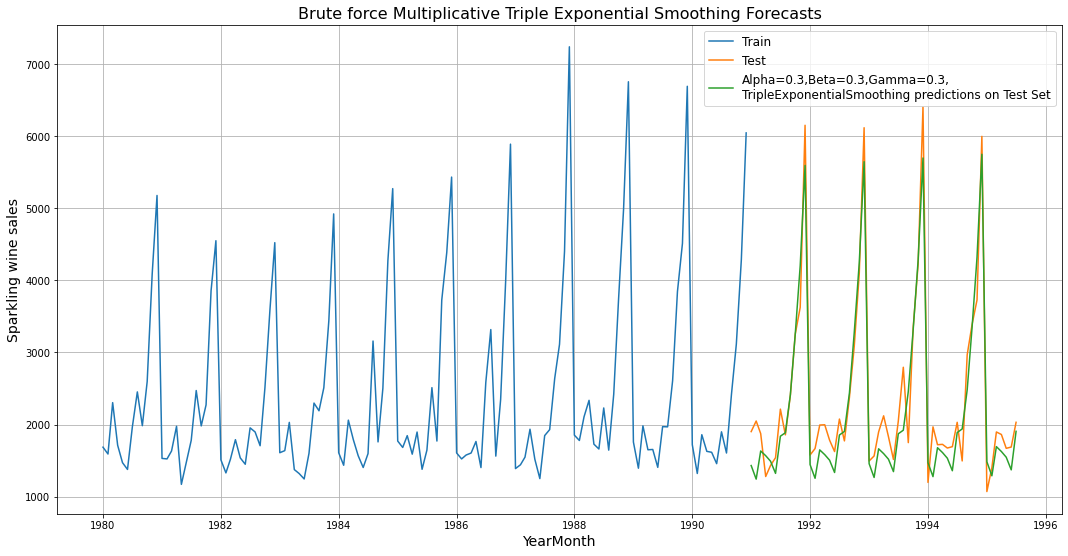

In [231]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(hw_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,\nTripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best', fontsize=12)
plt.xlabel('YearMonth', fontsize=14)
plt.ylabel('Sparkling wine sales', fontsize=14)
plt.title('Brute force Multiplicative Triple Exponential Smoothing Forecasts', fontsize=16)
plt.grid();

In [232]:
rmse_model8_test = metrics1.sort_values(by=['Test RMSE']).values[0][4]
print("For Brute forced Triple Exponential multiplicative Smoothing forecast on the Test Data,  RMSE is %3.3f" %(rmse_model8_test))


For Brute forced Triple Exponential multiplicative Smoothing forecast on the Test Data,  RMSE is 649.198


In [233]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [metrics2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Brute_force_Triple_Exp_multiplicative_Smoothing_forecast'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
LnR_forecast,1389.135175
Naive_forecast,3864.279352
SimpleAvg_forecast,1275.081804
Simple_Exp_Smoothing_forecast,1338.004622
Double_Exp_Smoothing_forecast,5291.879833
Triple_Exp_additive_Smoothing_forecast,378.952065
Triple_Exp_multiplicative_Smoothing_forecast,403.012143
Brute_force_Triple_Exp_multiplicative_Smoothing_forecast,361.397300


In [234]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
Brute_force_Triple_Exp_multiplicative_Smoothing_forecast,361.397300
Triple_Exp_additive_Smoothing_forecast,378.952065
Triple_Exp_multiplicative_Smoothing_forecast,403.012143
SimpleAvg_forecast,1275.081804
Simple_Exp_Smoothing_forecast,1338.004622
LnR_forecast,1389.135175
Naive_forecast,3864.279352
Double_Exp_Smoothing_forecast,5291.879833


----

-----

# 1.5) Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

### Step1: Checking for stationarity using Dickey-Fuller Test :

* Null Hypothesis,       H0 : Time Series is non-stationary.
* Alternate Hypothesis,  Ha : Time Series is stationary.

if p-value < 0.05 (alpha value) then null hypothesis: Time series data is non-stationary is rejected, 

if not, then null hypothesis is true i.e. Time series data is indeed non-stationary.

In [235]:
from statsmodels.tsa.stattools import adfuller

In [236]:
dftest = adfuller(df1)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


#### the p-value is 0.6 which  is clearly > 0.05, thus Null hypothesis is true. Time series data is not stationary.

### Step2: Making the time series data stationary using the differencing method:

#### Non differenced Time series data:

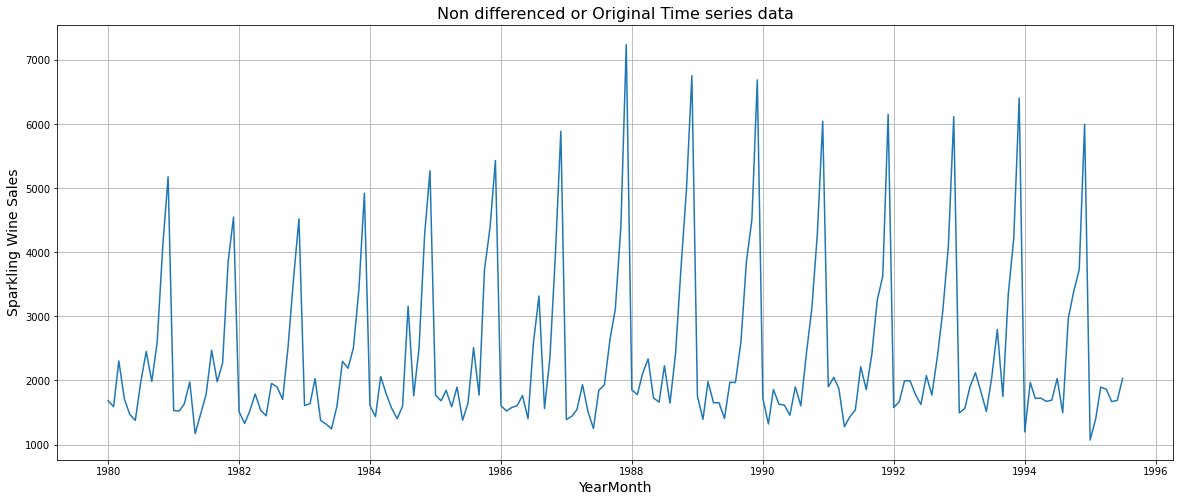

In [237]:
plt.plot(df1)
plt.xlabel('YearMonth', fontsize=14)
plt.ylabel('Sparkling Wine Sales',fontsize=14)
plt.title('Non differenced or Original Time series data',fontsize=16)
plt.grid()
plt.show()

#### Performing differencing ( d=1 ) on the non-stationary data:

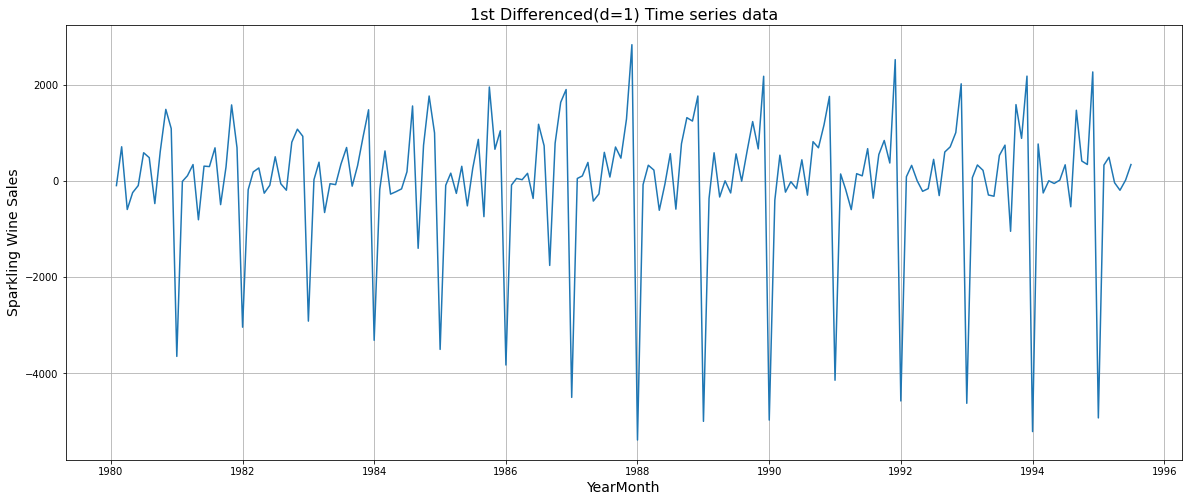

In [238]:
plt.plot(df1.diff(periods=1))
plt.xlabel('YearMonth', fontsize=14)
plt.ylabel('Sparkling Wine Sales',fontsize=14)
plt.title('1st Differenced(d=1) Time series data',fontsize=16)
plt.grid()
plt.show()

#### Checking for stationarity using the Dickey-Fuller test for the differenced(d=1) data:

In [239]:
dftest1 = adfuller(df1.diff(periods=1).dropna())
dftest1
print('DF test1 statistic is %3.3f' %dftest1[0])
print('DF test1 p-value is %1.4f' %dftest1[1])

DF test1 statistic is -45.050
DF test1 p-value is 0.0000


#### the p-value is 0 which  is clearly < 0.05, thus Null hypothesis is rejected i.e. Time series differenced(d=1) data is Stationary.
### Thus we have achieved Stationarity.

-------

-----

# 1.6) Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [240]:
train.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [241]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


### Check for stationarity of the Training Data Time Series.

In [242]:
dftest_train = adfuller(train)
print('DF test statistic is %3.3f' %dftest_train[0])
print('DF test p-value is %1.4f' %dftest_train[1])

DF test statistic is -1.209
DF test p-value is 0.6697


#### the p-value is 0.66 which  is clearly > 0.05, thus Null hypothesis is true. Time series data is not stationary.

#### Making the time series data stationary using the differencing method:

In [243]:
dftest_diff_train = adfuller(train.diff(periods=1).dropna())
print('DF test statistic is %3.3f' %dftest_diff_train[0])
print('DF test p-value is %1.4f' %dftest_diff_train[1])

DF test statistic is -8.005
DF test p-value is 0.0000


#### the p-value is 0 which  is clearly < 0.05, thus Null hypothesis is rejected i.e. Time series differenced(d=1) data is Stationary.
#### Thus we have achieved Stationarity.

---

### Model 9: Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [244]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Parameter combinations for the Model:')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Parameter combinations for the Model:
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [245]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [246]:
from warnings import filterwarnings
filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})], ignore_index=True)
    
ARIMA_AIC

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591756
ARIMA(0, 1, 2) - AIC:2234.4083231324385
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.75509466919
ARIMA(1, 1, 2) - AIC:2234.527200450987
ARIMA(2, 1, 0) - AIC:2260.365743968097
ARIMA(2, 1, 1) - AIC:2233.7776263117594
ARIMA(2, 1, 2) - AIC:2213.5092124139956


,param,AIC
0,"(0, 1, 0)",2267.663036
1,"(0, 1, 1)",2263.060016
2,"(0, 1, 2)",2234.408323
3,"(1, 1, 0)",2266.608539
4,"(1, 1, 1)",2235.755095
5,"(1, 1, 2)",2234.527200
6,"(2, 1, 0)",2260.365744
7,"(2, 1, 1)",2233.777626
8,"(2, 1, 2)",2213.509212


#### Sorting the above AIC values in the ascending order to get the parameters for the minimum AIC value.


In [247]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2213.509212
7,"(2, 1, 1)",2233.777626
2,"(0, 1, 2)",2234.408323
5,"(1, 1, 2)",2234.527200
4,"(1, 1, 1)",2235.755095
6,"(2, 1, 0)",2260.365744
1,"(0, 1, 1)",2263.060016
3,"(1, 1, 0)",2266.608539
0,"(0, 1, 0)",2267.663036


In [248]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Mon, 12 Jun 2023   AIC                           2213.509
Time:                        00:04:37   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

#### Forecasting using this model for the duration of the test set


In [249]:
tes_arima_predict =  results_auto_ARIMA.forecast(steps=len(test))
tes_arima_predict.head()

1991-01-01    4252.352569
1991-02-01    2863.102922
1991-03-01    2043.988206
1991-04-01    1746.217513
1991-05-01    1813.635208
Freq: MS, Name: predicted_mean, dtype: float64

#### Plotting the Training data, Test data and the forecasted values

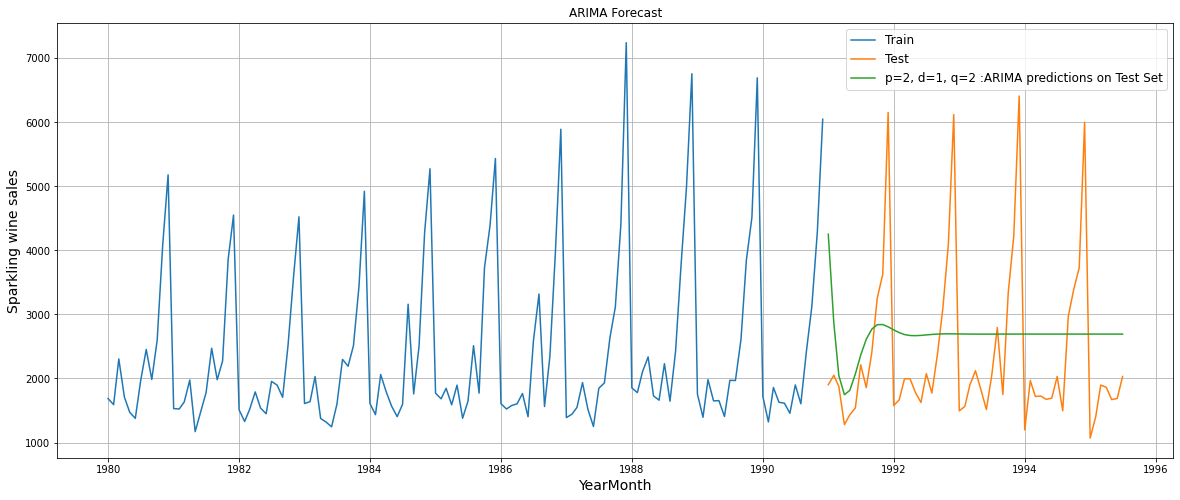

In [250]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(tes_arima_predict, label='p=2, d=1, q=2 :ARIMA predictions on Test Set')

plt.legend(loc='best', fontsize=12)
plt.xlabel('YearMonth', fontsize=14)
plt.ylabel('Sparkling wine sales', fontsize=14)
plt.grid()
plt.title('ARIMA Forecast');

### Model Evaluation

In [251]:
rmse_model9_test = mse(test['Sparkling'],tes_arima_predict,squared=False)
print("For ARIMA forecast on the Test Data,  RMSE is %3.3f" %(rmse_model9_test))


For ARIMA forecast on the Test Data,  RMSE is 1299.980


In [252]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse_model9_test]}
                           ,index=['ARIMA_forecast'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE
LnR_forecast,1389.135175
Naive_forecast,3864.279352
SimpleAvg_forecast,1275.081804
Simple_Exp_Smoothing_forecast,1338.004622
Double_Exp_Smoothing_forecast,5291.879833
Triple_Exp_additive_Smoothing_forecast,378.952065
Triple_Exp_multiplicative_Smoothing_forecast,403.012143
Brute_force_Triple_Exp_multiplicative_Smoothing_forecast,361.397300
ARIMA_forecast,1299.980401


----

### Model 10: Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).


#### Setting the seasonality = 12 as evident from the decomposition plot, to estimate parameters using auto SARIMA model.

In [253]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [254]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [255]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = pd.concat([SARIMA_AIC, pd.DataFrame({'param':[param],'seasonal':[param_seasonal] ,'AIC': [results_SARIMA.aic]})], ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52034D+00    |proj g|=  1.10083D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   5.712D-06   8.520D+00
  F =   8.5203019685086989     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.72729D+00    |proj g|=  9.90809D-02

At iterate   20    f=  6.50693D+00    |proj g|=  2.72369D-02

At iterate   25    f=  6.50437D+00    |proj g|=  1.99268D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     37      1     0     0   6.444D-07   6.504D+00
  F =   6.5043688031199354     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.153364023663
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1626.862633467857
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49370D+00    |proj g|=  1.05310D-01

At iterate    5    f=  5.48087D+00    |proj g|=  1.37492D-04

At iterate   10    f=  5.48086D+00    |proj g|=  3.61292D-03

At iterate   15    f=  5.48016D+00    |proj g|=  1.92094D-02


 This problem is unconstrained.



At iterate   20    f=  5.47984D+00    |proj g|=  7.88312D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     23      1     0     0   7.883D-06   5.480D+00
  F =   5.4798384750965132     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1452.6773574254794
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.94484D+00    |proj g|=  2.86769D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388249
           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     69      2     0     0   2.378D-05   6.822D+00
  F =   6.8219338262834270     

ABNORMAL_TERMINATION_IN_LNSRCH                              

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.17524D+00    |proj g|=  7.25121D-01

At iterate    5    f=  6.15664D+00    |proj g|=  1.01122D-01

At iterate   10    f=  6.15610D+00    |proj g|=  3.04724D-03

           * *


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735792315
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.22113D+00    |proj g|=  4.73390D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.734D-06   6.221D+00
  F =   6.2211280938111511     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1646.377816766144
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =      

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49800D+00    |proj g|=  1.54073D-01

At iterate    5    f=  5.47969D+00    |proj g|=  8.75318D-03

At iterate   10    f=  5.47928D+00    |proj g|=  5.16569D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   5.166D-05   5.479D+00
  F =   5.4792763717072068     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1454.5289621307027
RUNNING THE L-B

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  6.21133D+00    |proj g|=  3.58495D-02

At iterate   20    f=  6.20924D+00    |proj g|=  2.66911D-02

At iterate   25    f=  6.20911D+00    |proj g|=  3.00100D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     31      1     0     0   3.001D-05   6.209D+00
  F =   6.2091114237109517     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158596914
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   10    f=  6.14370D+00    |proj g|=  1.89178D-04

At iterate   15    f=  6.14370D+00    |proj g|=  2.05373D-03

At iterate   20    f=  6.14349D+00    |proj g|=  3.47798D-02

At iterate   25    f=  6.14069D+00    |proj g|=  4.56016D-02

At iterate   30    f=  6.14011D+00    |proj g|=  1.50460D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     39      1     0     0   1.158D-06   6.140D+00
  F =   6.1401128992124248     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920801
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:1466.6211360755017
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53425D+00    |proj g|=  2.99184D-02

At iterate    5    f=  5.53339D+00    |proj g|=  2.91035D-03

At iterate   10    f=  5.53338D+00    |proj g|=  3.23819D-04

At iterate   15    f=  5.53336D+00    |proj g|=  4.29901D-03

At iterate   20    f=  5.53236D+00    |proj g|=  1.10922D-02

At iterate   25    f=  5.53220D+00    |proj g|=  2.52172D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     P

 This problem is unconstrained.



At iterate    5    f=  5.47923D+00    |proj g|=  2.78393D-02

At iterate   10    f=  5.47762D+00    |proj g|=  1.77814D-03

At iterate   15    f=  5.47755D+00    |proj g|=  5.41437D-05

At iterate   20    f=  5.47754D+00    |proj g|=  7.91079D-04

At iterate   25    f=  5.47729D+00    |proj g|=  8.30916D-03

At iterate   30    f=  5.47724D+00    |proj g|=  1.88004D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     33      1     0     0   1.880D-05   5.477D+00
  F =   5.4772392248714716     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:1455.9911553660

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.67987D+00    |proj g|=  2.65556D-01

At iterate    5    f=  6.60887D+00    |proj g|=  3.95890D-03

At iterate   10    f=  6.60872D+00    |proj g|=  3.96863D-04
  ys=-1.806E-02  -gs= 3.972E-04 BFGS update SKIPPED


 This problem is unconstrained.



At iterate   15    f=  6.59831D+00    |proj g|=  7.89251D-03

At iterate   20    f=  6.59746D+00    |proj g|=  2.57427D-02

At iterate   25    f=  6.49456D+00    |proj g|=  3.05040D-01

At iterate   30    f=  6.42077D+00    |proj g|=  3.77181D-02

At iterate   35    f=  6.38342D+00    |proj g|=  3.92280D-02

At iterate   40    f=  6.38150D+00    |proj g|=  3.61135D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     68      1     1     0   1.733D-06   6.381D+00
  F =   6.3814733230773486     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572924

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.92297D+00    |proj g|=  2.14541D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     27      1     0     0   2.611D-07   5.923D+00
  F =   5.9229694069052741     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1569.6639234229924
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.34567D+00    |proj g|=  1.43145D-01

At iterate    5    f=  5.27851D+00    |proj g|=  6.55936D-04

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.81155D+00    |proj g|=  3.47480D-01

At iterate   25    f=  6.78477D+00    |proj g|=  8.38194D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     34      1     0     0   3.073D-06   6.785D+00
  F =   6.7847711673627984     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881837788
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26384D+00    |proj g|=  4.37702D-02

At iterate    

 This problem is unconstrained.



At iterate    5    f=  6.51779D+00    |proj g|=  2.13209D-02

At iterate   10    f=  6.51210D+00    |proj g|=  1.67353D-03

At iterate   15    f=  6.51207D+00    |proj g|=  6.77499D-04

At iterate   20    f=  6.51091D+00    |proj g|=  2.73466D-02

At iterate   25    f=  6.46410D+00    |proj g|=  1.46075D-01

At iterate   30    f=  6.02293D+00    |proj g|=  2.58347D-01

At iterate   35    f=  5.91329D+00    |proj g|=  4.94576D-02

At iterate   40    f=  5.90966D+00    |proj g|=  4.92502D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     58      1     0     0   6.082D-06   5.910D+00
  F =   5.90966255472

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.05960D+00    |proj g|=  7.63728D-02

At iterate   20    f=  6.04886D+00    |proj g|=  2.23967D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     28      1     0     0   2.737D-06   6.049D+00
  F =   6.0487101587211525     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1602.8594819023842
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98979D+00    |proj g|=  1.64336D-01

At iterate    

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.34965D+00    |proj g|=  2.11681D-01

At iterate    5    f=  5.27714D+00    |proj g|=  7.09441D-03

At iterate   10    f=  5.27712D+00    |proj g|=  6.31005D-04

At iterate   15    f=  5.27710D+00    |proj g|=  8.54096D-04

At iterate   20    f=  5.27678D+00    |proj g|=  1.67348D-02

At iterate   25    f=  5.26932D+00    |proj g|=  4.70183D-02

At iterate   30    f=  5.26770D+00    |proj g|=  1.68718D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     38     

 This problem is unconstrained.



At iterate   10    f=  6.63551D+00    |proj g|=  1.48500D-03

At iterate   15    f=  6.62538D+00    |proj g|=  3.75753D-02

At iterate   20    f=  6.33595D+00    |proj g|=  3.11523D-01

At iterate   25    f=  6.05445D+00    |proj g|=  8.31341D-02

At iterate   30    f=  6.05180D+00    |proj g|=  1.54320D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     45      1     0     0   3.344D-07   6.052D+00
  F =   6.0517999826438462     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954179754
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   15    f=  6.63363D+00    |proj g|=  2.55737D-02

At iterate   20    f=  6.57192D+00    |proj g|=  2.65871D-01

At iterate   25    f=  6.29233D+00    |proj g|=  8.82831D-02

At iterate   30    f=  6.04434D+00    |proj g|=  1.70778D-01

At iterate   35    f=  6.01979D+00    |proj g|=  1.27284D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     59      1     0     0   2.550D-05   6.020D+00
  F =   6.0197898050069609     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085218376
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  6.51434D+00    |proj g|=  2.13880D-02

At iterate   10    f=  6.50894D+00    |proj g|=  1.34084D-03

At iterate   15    f=  6.50888D+00    |proj g|=  6.84878D-04

At iterate   20    f=  6.50860D+00    |proj g|=  6.51047D-03

At iterate   25    f=  6.49600D+00    |proj g|=  3.31182D-02

At iterate   30    f=  6.43001D+00    |proj g|=  2.77113D-01

At iterate   35    f=  5.92748D+00    |proj g|=  1.93384D-01

At iterate   40    f=  5.90624D+00    |proj g|=  1.91375D-01

At iterate   45    f=  5.90308D+00    |proj g|=  4.56555D-03

At iterate   50    f=  5.90304D+00    |proj g|=  9.53874D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   20    f=  5.37973D+00    |proj g|=  2.54873D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     28      1     0     0   1.370D-04   5.380D+00
  F =   5.3797154587704350     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:1428.244881115395
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43033D+00    |proj g|=  1.42709D-01


 This problem is unconstrained.



At iterate    5    f=  5.38842D+00    |proj g|=  6.14501D-03

At iterate   10    f=  5.38769D+00    |proj g|=  8.39752D-03

At iterate   15    f=  5.38764D+00    |proj g|=  1.31743D-03

At iterate   20    f=  5.38726D+00    |proj g|=  1.97455D-02

At iterate   25    f=  5.37940D+00    |proj g|=  3.95657D-02

At iterate   30    f=  5.37734D+00    |proj g|=  2.26777D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     38      1     0     0   5.441D-06   5.377D+00
  F =   5.3773363742285536     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:1429.6168027963

 This problem is unconstrained.



At iterate    5    f=  5.27777D+00    |proj g|=  1.16087D-02

At iterate   10    f=  5.27695D+00    |proj g|=  1.65876D-03

At iterate   15    f=  5.27694D+00    |proj g|=  1.69738D-03

At iterate   20    f=  5.27687D+00    |proj g|=  5.61072D-03

At iterate   25    f=  5.27167D+00    |proj g|=  4.09202D-02

At iterate   30    f=  5.26935D+00    |proj g|=  5.21241D-03

At iterate   35    f=  5.26758D+00    |proj g|=  1.44283D-03

At iterate   40    f=  5.26757D+00    |proj g|=  7.26299D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     48      1     0     0   7.263D-06   5.268D+00
  F =   5.26757041232

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.30237D+00    |proj g|=  2.71140D-03

At iterate   10    f=  7.30236D+00    |proj g|=  8.84275D-04

At iterate   15    f=  7.30176D+00    |proj g|=  1.86516D-02

At iterate   20    f=  7.24805D+00    |proj g|=  2.10218D-01

At iterate   25    f=  7.12109D+00    |proj g|=  1.90571D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     41      1     0     0   7.473D-06   7.121D+00
  F =   7.1208818209099283     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.912800720221
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.22313D+00    |proj g|=  1.16360D-01

At iterate    5    f=  5.20335D+00    |proj g|=  1.08528D-02


 This problem is unconstrained.



At iterate   10    f=  5.20327D+00    |proj g|=  2.73509D-04

At iterate   15    f=  5.20323D+00    |proj g|=  5.83589D-03

At iterate   20    f=  5.20043D+00    |proj g|=  3.25656D-02

At iterate   25    f=  5.19880D+00    |proj g|=  3.45928D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     31      1     0     0   1.761D-05   5.199D+00
  F =   5.1988039927199514     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:1382.4842540780671
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.24213D+00    |proj g|=  2.07407D-01

At iterate   25    f=  6.78779D+00    |proj g|=  8.52010D-02

At iterate   30    f=  6.76093D+00    |proj g|=  1.41491D-01

At iterate   35    f=  6.75012D+00    |proj g|=  6.90193D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     49      1     0     0   3.467D-06   6.750D+00
  F =   6.7501236107247342     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332313298
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  6.44039D+00    |proj g|=  1.20117D-03

At iterate   15    f=  6.44035D+00    |proj g|=  2.87319D-03

At iterate   20    f=  6.43760D+00    |proj g|=  3.37019D-02

At iterate   25    f=  6.27972D+00    |proj g|=  1.52562D-01

At iterate   30    f=  5.93918D+00    |proj g|=  1.39649D+00

At iterate   35    f=  5.85683D+00    |proj g|=  1.11687D-01

At iterate   40    f=  5.85289D+00    |proj g|=  6.07395D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     55      1     0     0   9.390D-05   5.853D+00
  F =   5.8528807081128855     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.86463D+00    |proj g|=  7.42707D-03

At iterate   10    f=  5.86459D+00    |proj g|=  1.90778D-03

At iterate   15    f=  5.86394D+00    |proj g|=  2.94297D-02

At iterate   20    f=  5.85785D+00    |proj g|=  3.47828D-02

At iterate   25    f=  5.85666D+00    |proj g|=  4.51965D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     33      1     0     0   1.527D-05   5.857D+00
  F =   5.8566514077528913     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:1556.1559716467632
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.20325D+00    |proj g|=  5.23852D-03

At iterate   10    f=  5.20293D+00    |proj g|=  4.62411D-03

At iterate   15    f=  5.20290D+00    |proj g|=  2.30386D-04

At iterate   20    f=  5.20284D+00    |proj g|=  4.92005D-03

At iterate   25    f=  5.20017D+00    |proj g|=  2.80250D-02

At iterate   30    f=  5.19848D+00    |proj g|=  1.71937D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     37      1     0     0   3.118D-06   5.198D+00
  F =   5.1984805575838955     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:1384.3988672021

 This problem is unconstrained.



At iterate    5    f=  6.62522D+00    |proj g|=  8.04445D-03

At iterate   10    f=  6.62481D+00    |proj g|=  7.74502D-04

At iterate   15    f=  6.62467D+00    |proj g|=  8.10510D-03

At iterate   20    f=  6.61039D+00    |proj g|=  9.92767D-02

At iterate   25    f=  6.28017D+00    |proj g|=  4.03138D-01

At iterate   30    f=  6.04355D+00    |proj g|=  1.92788D-01

At iterate   35    f=  6.03775D+00    |proj g|=  6.79463D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     46      1     0     0   7.963D-07   6.038D+00
  F =   6.0377480206312111     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   25    f=  6.54720D+00    |proj g|=  1.50299D-01

At iterate   30    f=  6.10301D+00    |proj g|=  4.84568D-01

At iterate   35    f=  6.01790D+00    |proj g|=  9.22517D-02

At iterate   40    f=  6.01721D+00    |proj g|=  1.22166D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     55      1     0     0   9.671D-05   6.017D+00
  F =   6.0172116759159042     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438824417988
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  6.43760D+00    |proj g|=  2.35412D-03

At iterate   15    f=  6.43756D+00    |proj g|=  1.49204D-03

At iterate   20    f=  6.43750D+00    |proj g|=  1.65008D-03

At iterate   25    f=  6.43627D+00    |proj g|=  8.98974D-03

At iterate   30    f=  6.35095D+00    |proj g|=  2.45998D-01

At iterate   35    f=  6.02386D+00    |proj g|=  3.54948D-01

At iterate   40    f=  5.89677D+00    |proj g|=  2.15299D-01

At iterate   45    f=  5.85323D+00    |proj g|=  3.03113D-02

At iterate   50    f=  5.84976D+00    |proj g|=  5.11086D-02

At iterate   55    f=  5.84548D+00    |proj g|=  7.91346D-03

At iterate   60    f=  5.84516D+00    |proj g|=  4.40492D-03

At iterate   65    f=  5.84516D+00    |proj g|=  1.01572D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate   15    f=  5.37210D+00    |proj g|=  5.04300D-03

At iterate   20    f=  5.36929D+00    |proj g|=  6.45755D-02

At iterate   25    f=  5.36772D+00    |proj g|=  4.04416D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     29      1     0     0   1.142D-04   5.368D+00
  F =   5.3677172031845357     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:1427.0773416407173
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.37134D+00    |proj g|=  1.87333D-02

At iterate   10    f=  5.37046D+00    |proj g|=  3.36385D-03

At iterate   15    f=  5.37044D+00    |proj g|=  9.82233D-04

At iterate   20    f=  5.37011D+00    |proj g|=  1.57599D-02

At iterate   25    f=  5.36593D+00    |proj g|=  1.31958D-02

At iterate   30    f=  5.36573D+00    |proj g|=  1.32512D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     38      1     0     0   9.861D-06   5.366D+00
  F =   5.3657328664807773     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:1428.5534767509

 This problem is unconstrained.


At iterate    5    f=  5.20213D+00    |proj g|=  1.86184D-02

At iterate   10    f=  5.20158D+00    |proj g|=  2.00340D-03

At iterate   15    f=  5.20150D+00    |proj g|=  1.42020D-03

At iterate   20    f=  5.20149D+00    |proj g|=  1.05578D-03

At iterate   25    f=  5.20121D+00    |proj g|=  1.29257D-02

At iterate   30    f=  5.19736D+00    |proj g|=  2.10637D-02

At iterate   35    f=  5.19708D+00    |proj g|=  8.37638D-04

At iterate   40    f=  5.19706D+00    |proj g|=  3.58623D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     47      1     0     0   1.197D-04   5.197D+00
  F =   5.197059599480

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     28      1     0     0   9.273D-07   7.380D+00
  F =   7.3802796742061592     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.393833990426
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.74531D+00    |proj g|=  2.56917D-01

At iterate    5    f=  6.67964D+00    |proj g|=  6.14362D-04


 This problem is unconstrained.



At iterate   10    f=  6.67957D+00    |proj g|=  3.82996D-03

At iterate   15    f=  6.67055D+00    |proj g|=  5.75586D-02

At iterate   20    f=  6.49925D+00    |proj g|=  1.10762D-01

At iterate   25    f=  6.48966D+00    |proj g|=  1.04295D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     32      1     0     0   2.495D-06   6.490D+00
  F =   6.4896547258919810     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476354829
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.09106D+00    |proj g|=  3.96923D-02

At iterate   20    f=  6.08993D+00    |proj g|=  3.84404D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     23      1     0     0   3.844D-07   6.090D+00
  F =   6.0899269065947292     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:1613.7407033410086
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.45657D+00    |proj g|=  1.31527D-01

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   15    f=  7.09978D+00    |proj g|=  4.34180D-01

At iterate   20    f=  6.83815D+00    |proj g|=  3.51392D-02

SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279331113At iterate   25    f=  6.83805D+00    |proj g|=  7.55129D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     35      1     0     0   7.551D-07   6.838D+00
  F =   6.8380455603526942     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   20    f=  6.54471D+00    |proj g|=  1.11557D-01

At iterate   25    f=  6.14680D+00    |proj g|=  7.61393D-01

At iterate   30    f=  6.08520D+00    |proj g|=  4.35836D-03

At iterate   35    f=  6.08519D+00    |proj g|=  5.22968D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     45      1     0     0   5.230D-06   6.085D+00
  F =   6.0851872736920507     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894402547013
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.09462D+00    |proj g|=  1.83705D-02

At iterate   10    f=  6.09422D+00    |proj g|=  5.34355D-04

At iterate   15    f=  6.09386D+00    |proj g|=  8.51475D-03

At iterate   20    f=  6.09007D+00    |proj g|=  5.10351D-03

At iterate   25    f=  6.08993D+00    |proj g|=  4.69358D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     30      1     0     0   4.694D-06   6.090D+00
  F =   6.0899259413645357     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:1615.7404485202374
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   20    f=  6.13725D+00    |proj g|=  1.72689D-01

At iterate   25    f=  6.11226D+00    |proj g|=  4.28357D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     31      1     0     0   5.529D-06   6.112D+00
  F =   6.1122557121700920     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080129042
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.58908D+00    |proj g|=  2.46980D-02

At iterate    

 This problem is unconstrained.



At iterate   20    f=  6.54803D+00    |proj g|=  9.73977D-02

At iterate   25    f=  6.13538D+00    |proj g|=  8.74911D-01

At iterate   30    f=  6.09378D+00    |proj g|=  3.44596D-02

At iterate   35    f=  6.08764D+00    |proj g|=  1.92254D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     49      1     0     0   3.571D-05   6.088D+00
  F =   6.0876348992679734     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.135613406745
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.


At iterate   10    f=  6.58464D+00    |proj g|=  5.17160D-04

At iterate   15    f=  6.58458D+00    |proj g|=  4.21255D-03

At iterate   20    f=  6.58429D+00    |proj g|=  5.43413D-03

At iterate   25    f=  6.54333D+00    |proj g|=  1.04729D-01

At iterate   30    f=  6.17969D+00    |proj g|=  2.73546D-01

At iterate   35    f=  6.08920D+00    |proj g|=  5.82124D-02

At iterate   40    f=  6.07782D+00    |proj g|=  1.07099D-02

At iterate   45    f=  6.07781D+00    |proj g|=  4.38658D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     54      1     0     0   4.387D-05   6.078D+00
  F =   6.077807601300

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:1440.5741628099224
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43094D+00    |proj g|=  6.38954D-02

At iterate    5    f=  5.42710D+00    |proj g|=  2.82424D-04

At iterate   10    f=  5.42710D+00    |proj g|=  2.99368D-04

At iterate   15    f=  5.42706D+00    |proj g|=  5.96623D-03

At iterate   20    f=  5.42621D+00    |proj g|=  5.31315D-03

At iterate   25    f=  5.42616D+00    |proj g|=  2.45640D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     P

 This problem is unconstrained.



At iterate    5    f=  5.42934D+00    |proj g|=  1.77072D-02

At iterate   10    f=  5.42690D+00    |proj g|=  1.28404D-03

At iterate   15    f=  5.42683D+00    |proj g|=  1.00182D-04

At iterate   20    f=  5.42681D+00    |proj g|=  3.80063D-03

At iterate   25    f=  5.42607D+00    |proj g|=  9.21107D-03

At iterate   30    f=  5.42587D+00    |proj g|=  9.86391D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     38      1     0     0   6.603D-07   5.426D+00
  F =   5.4258614567952339     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 1, 2, 12) - AIC:1444.4274245939

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.36253D+00    |proj g|=  7.01929D-04

At iterate   15    f=  7.36222D+00    |proj g|=  1.36519D-02

At iterate   20    f=  7.33589D+00    |proj g|=  3.08735D-01

At iterate   25    f=  7.19483D+00    |proj g|=  1.93517D-02

At iterate   30    f=  7.19453D+00    |proj g|=  3.93802D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     38      1     0     0   4.217D-06   7.195D+00
  F =   7.1945299144454253     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.3558974135924
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  6.57318D+00    |proj g|=  6.04925D-02

At iterate   10    f=  6.56961D+00    |proj g|=  5.39714D-04

At iterate   15    f=  6.56958D+00    |proj g|=  4.03912D-03

At iterate   20    f=  6.56822D+00    |proj g|=  2.32204D-02

At iterate   25    f=  6.46051D+00    |proj g|=  1.62192D-01

At iterate   30    f=  6.42471D+00    |proj g|=  4.78497D-02
  ys=-4.935E-02  -gs= 3.678E-02 BFGS update SKIPPED

At iterate   35    f=  6.33205D+00    |proj g|=  8.81894D-02

At iterate   40    f=  6.31855D+00    |proj g|=  1.04946D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     65      1     1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.92766D+00    |proj g|=  7.39759D-02

At iterate   20    f=  5.91481D+00    |proj g|=  4.79532D-02

At iterate   25    f=  5.91433D+00    |proj g|=  5.08038D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     28      1     0     0   5.080D-07   5.914D+00
  F =   5.9143285480351455     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:1569.3827366812784
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   10    f=  5.26984D+00    |proj g|=  2.57875D-03

At iterate   15    f=  5.26889D+00    |proj g|=  2.88883D-02

At iterate   20    f=  5.26048D+00    |proj g|=  6.98932D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     27      1     0     0   5.275D-05   5.260D+00
  F =   5.2604400273587135     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:1398.7561672227005
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26217D+00    |proj g|=  4.89411D-01

At iterate    5    f=  7.23407D+00    |proj g|=  3.06733D-02

At iterate   10    f=  7.23074D+00    |proj g|=  6.06755D-04

At iterate   15    f=  7.23052D+00    |proj g|=  5.82554D-03

At iterate   20    f=  7.20838D+00    |proj g|=  8.28054D-02

At iterate   25    f=  7.14467D+00    |proj g|=  2.88877D-01

At iterate   30    f=  7.03917D+00    |proj g|=  1.69349D-01

At iterate   35    f=  6.82181D+00    |proj g|=  2.33433D+00

At iterate   40    f=  6.55650D+00    |proj g|=  5.57756D-02

At iterate   45    f=  6.55395D+00    |proj g|=  5.75517D-02

At iterate   50    f=  6.55129D+00    |proj g|=  1.52673D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.92847D+00    |proj g|=  9.11719D-03

At iterate   10    f=  5.92817D+00    |proj g|=  6.14977D-04

At iterate   15    f=  5.92797D+00    |proj g|=  1.59009D-02

At iterate   20    f=  5.91866D+00    |proj g|=  9.06571D-02

At iterate   25    f=  5.91164D+00    |proj g|=  1.10869D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     29      1     0     0   3.805D-05   5.912D+00
  F =   5.9116381229475321     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1570.6724644581484
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.26882D+00    |proj g|=  4.74188D-03

At iterate   10    f=  5.26872D+00    |proj g|=  2.26649D-03

At iterate   15    f=  5.26871D+00    |proj g|=  1.45971D-03

At iterate   20    f=  5.26848D+00    |proj g|=  2.11028D-02

At iterate   25    f=  5.26236D+00    |proj g|=  7.88910D-02

At iterate   30    f=  5.25929D+00    |proj g|=  1.13140D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     37      1     0     0   1.619D-05   5.259D+00
  F =   5.2592893508158669     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:1400.4523886153

 This problem is unconstrained.



At iterate    5    f=  6.55589D+00    |proj g|=  2.16797D-02

At iterate   10    f=  6.55337D+00    |proj g|=  5.44443D-04

At iterate   15    f=  6.55319D+00    |proj g|=  6.01839D-03

At iterate   20    f=  6.52239D+00    |proj g|=  8.04993D-02

At iterate   25    f=  6.00887D+00    |proj g|=  2.33331D-01

At iterate   30    f=  5.98722D+00    |proj g|=  9.68326D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     45      1     0     0   5.601D-06   5.987D+00
  F =   5.9871824268480704     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606878

 This problem is unconstrained.



At iterate   25    f=  6.48499D+00    |proj g|=  1.62071D-01

At iterate   30    f=  6.39060D+00    |proj g|=  8.38272D-02

At iterate   35    f=  6.21127D+00    |proj g|=  3.93400D-01

At iterate   40    f=  6.15130D+00    |proj g|=  2.31916D-02

At iterate   45    f=  6.05119D+00    |proj g|=  3.99060D-01

At iterate   50    f=  5.97591D+00    |proj g|=  2.96963D-01

At iterate   55    f=  5.96355D+00    |proj g|=  1.41792D-02

At iterate   60    f=  5.96331D+00    |proj g|=  2.15408D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     60     90      1     0     0   2.154D-04   5.963D+00
  F =   5.96331146109

 This problem is unconstrained.



At iterate   10    f=  6.48959D+00    |proj g|=  1.12765D-03

At iterate   15    f=  6.48956D+00    |proj g|=  1.99846D-03

At iterate   20    f=  6.48939D+00    |proj g|=  6.15621D-03

At iterate   25    f=  6.46871D+00    |proj g|=  6.60777D-02

At iterate   30    f=  6.17976D+00    |proj g|=  2.64861D+00

At iterate   35    f=  5.93715D+00    |proj g|=  2.52038D-01

At iterate   40    f=  5.92137D+00    |proj g|=  1.46753D-01

At iterate   45    f=  5.91770D+00    |proj g|=  1.64051D-01

At iterate   50    f=  5.91657D+00    |proj g|=  7.96169D-03

At iterate   55    f=  5.91624D+00    |proj g|=  8.24160D-02

At iterate   60    f=  5.90821D+00    |proj g|=  1.76910D-01

At iterate   65    f=  5.90184D+00    |proj g|=  2.30979D-02

At iterate   70    f=  5.90079D+00    |proj g|=  5.89631D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   10    f=  5.32574D+00    |proj g|=  1.44999D-03

At iterate   15    f=  5.32516D+00    |proj g|=  1.92603D-02

At iterate   20    f=  5.31724D+00    |proj g|=  2.30927D-02

At iterate   25    f=  5.31655D+00    |proj g|=  3.12934D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     28      1     0     0   7.239D-06   5.317D+00
  F =   5.3165454013689173     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:1413.5679859613942
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  5.32444D+00    |proj g|=  9.06105D-03

At iterate   10    f=  5.32371D+00    |proj g|=  3.23974D-04

At iterate   15    f=  5.32235D+00    |proj g|=  2.47465D-02

At iterate   20    f=  5.31395D+00    |proj g|=  7.50864D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     30      1     0     0   9.767D-06   5.314D+00
  F =   5.3139154096984207     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:1414.873668160383
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate   10    f=  5.26815D+00    |proj g|=  7.45280D-04

At iterate   15    f=  5.26812D+00    |proj g|=  3.17013D-04

At iterate   20    f=  5.26811D+00    |proj g|=  3.41193D-03

At iterate   25    f=  5.26661D+00    |proj g|=  1.99938D-02

At iterate   30    f=  5.25866D+00    |proj g|=  5.01574D-03

At iterate   35    f=  5.25861D+00    |proj g|=  6.23067D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     41      1     0     0   6.577D-06   5.259D+00
  F =   5.2586108609113289     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:1402.2732672805

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.4633450504894
At iterate   10    f=  8.25933D+00    |proj g|=  1.60234D-04


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     14      1     0     0   1.602D-04   8.259D+00
  F =   8.2593308524639752     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33508D+00    |proj g|=  1.14817D-01

At iterate    5    f=  7.30209D+00    |proj g|=  2.44909D-03

At iterate   1

 This problem is unconstrained.



At iterate   15    f=  6.51064D+00    |proj g|=  6.45946D-04

At iterate   20    f=  6.51061D+00    |proj g|=  6.31391D-03

At iterate   25    f=  6.50850D+00    |proj g|=  7.67435D-02

At iterate   30    f=  6.39169D+00    |proj g|=  2.67840D-01

At iterate   35    f=  6.25486D+00    |proj g|=  1.47507D-01

At iterate   40    f=  6.24104D+00    |proj g|=  5.15641D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     51      1     0     0   2.582D-05   6.241D+00
  F =   6.2410194778594201     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291421548

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.85850D+00    |proj g|=  7.25011D-04

At iterate   15    f=  5.85838D+00    |proj g|=  1.17467D-02

At iterate   20    f=  5.85455D+00    |proj g|=  5.58878D-02

At iterate   25    f=  5.85212D+00    |proj g|=  2.50036D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     31      1     0     0   8.465D-06   5.852D+00
  F =   5.8521152041728106     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:1554.958413901622
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  5.19458D+00    |proj g|=  1.98300D-03

At iterate   10    f=  5.19456D+00    |proj g|=  2.20306D-04

At iterate   15    f=  5.19453D+00    |proj g|=  3.86947D-03

At iterate   20    f=  5.19210D+00    |proj g|=  2.83223D-02

At iterate   25    f=  5.19071D+00    |proj g|=  1.07300D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     32      1     0     0   1.624D-05   5.191D+00
  F =   5.1907112880036266     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:1382.3477800329574
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   20    f=  7.30167D+00    |proj g|=  3.51400D-02

At iterate   25    f=  7.28319D+00    |proj g|=  5.33825D-02

At iterate   30    f=  6.94185D+00    |proj g|=  5.57078D-01

At iterate   35    f=  6.68580D+00    |proj g|=  3.47850D-02

At iterate   40    f=  6.68439D+00    |proj g|=  4.02968D-02

At iterate   45    f=  6.67714D+00    |proj g|=  6.39573D-02

At iterate   50    f=  6.67358D+00    |proj g|=  9.24944D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     51     80      1     0     0   2.044D-05   6.674D+00
  F =   6.6735832575735667     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.12871D+00    |proj g|=  1.93554D-01

At iterate   30    f=  6.75351D+00    |proj g|=  5.47554D-01

At iterate   35    f=  6.49924D+00    |proj g|=  2.62727D-01

At iterate   40    f=  6.48483D+00    |proj g|=  4.47948D-03

At iterate   45    f=  6.48483D+00    |proj g|=  1.17882D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     67      1     0     0   1.150D-04   6.485D+00
  F =   6.4848303738025113     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.995218683863
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.85617D+00    |proj g|=  1.91395D-02

At iterate   10    f=  5.85585D+00    |proj g|=  6.06446D-04

At iterate   15    f=  5.85580D+00    |proj g|=  4.73464D-03

At iterate   20    f=  5.85311D+00    |proj g|=  3.22214D-02

At iterate   25    f=  5.84967D+00    |proj g|=  1.02911D-02

At iterate   30    f=  5.84898D+00    |proj g|=  5.62619D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     33      1     0     0   5.597D-06   5.849D+00
  F =   5.8489774400429910     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:1556.1300441713

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.22843D+00    |proj g|=  1.75461D-01

At iterate    5    f=  5.19414D+00    |proj g|=  7.15333D-03

At iterate   10    f=  5.19381D+00    |proj g|=  3.40333D-03

At iterate   15    f=  5.19374D+00    |proj g|=  2.19681D-04

At iterate   20    f=  5.19373D+00    |proj g|=  2.22781D-03

At iterate   25    f=  5.19298D+00    |proj g|=  2.85015D-02

At iterate   30    f=  5.19004D+00    |proj g|=  3.42140D-03

At iterate   35    f=  5.18992D+00    |proj g|=  1.63395D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  6.56224D+00    |proj g|=  4.31279D-03

At iterate   10    f=  6.56163D+00    |proj g|=  6.36079D-03

At iterate   15    f=  6.56096D+00    |proj g|=  1.08621D-03

At iterate   20    f=  6.56084D+00    |proj g|=  4.06292D-03

At iterate   25    f=  6.53899D+00    |proj g|=  1.28742D-01

At iterate   30    f=  6.27656D+00    |proj g|=  1.00708D-01

At iterate   35    f=  6.04284D+00    |proj g|=  1.81432D-01

At iterate   40    f=  5.97191D+00    |proj g|=  3.87295D-02

At iterate   45    f=  5.97130D+00    |proj g|=  1.97354D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     70   

 This problem is unconstrained.



At iterate   10    f=  6.56103D+00    |proj g|=  4.35443D-03

At iterate   15    f=  6.56044D+00    |proj g|=  4.43622D-03

At iterate   20    f=  6.56027D+00    |proj g|=  5.49606D-04

At iterate   25    f=  6.55912D+00    |proj g|=  1.08575D-02

At iterate   30    f=  6.53877D+00    |proj g|=  4.57655D-02

At iterate   35    f=  6.51004D+00    |proj g|=  7.36532D-02

At iterate   40    f=  6.44089D+00    |proj g|=  4.23116D-01

At iterate   45    f=  6.02138D+00    |proj g|=  1.93064D-01

At iterate   50    f=  5.96527D+00    |proj g|=  4.91926D-02

At iterate   55    f=  5.95274D+00    |proj g|=  5.80400D-03

At iterate   60    f=  5.95271D+00    |proj g|=  1.02404D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  6.43753D+00    |proj g|=  1.45211D-02

At iterate   10    f=  6.43683D+00    |proj g|=  1.25084D-03

At iterate   15    f=  6.43634D+00    |proj g|=  6.69344D-03

At iterate   20    f=  6.43597D+00    |proj g|=  3.48522D-03

At iterate   25    f=  6.43589D+00    |proj g|=  1.45164D-03

At iterate   30    f=  6.43575D+00    |proj g|=  6.51991D-03

At iterate   35    f=  6.42163D+00    |proj g|=  9.48066D-02

At iterate   40    f=  6.28673D+00    |proj g|=  3.17081D-01

At iterate   45    f=  6.02315D+00    |proj g|=  4.93275D-01

At iterate   50    f=  5.85404D+00    |proj g|=  4.07412D-02

At iterate   55    f=  5.85242D+00    |proj g|=  1.92666D-02

At iterate   60    f=  5.84887D+00    |proj g|=  1.33085D-01

At iterate   65    f=  5.84663D+00    |proj g|=  6.56181D-02

At iterate   70    f=  5.84542D+00    |proj g|=  3.91158D-02

At iterate   75    f=  5.84307D+00    |proj g|=  9.97565D-02

At iterate   80    f=  5.83642D+00    |proj g|=  4.58084D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  5.30667D+00    |proj g|=  9.26171D-03

At iterate   20    f=  5.30410D+00    |proj g|=  3.72075D-02

At iterate   25    f=  5.30300D+00    |proj g|=  1.01945D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.895D-05   5.303D+00
  F =   5.3030015566953983     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:1411.992410967585


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31762D+00    |proj g|=  7.69686D-02

At iterate    5    f=  5.30579D+00    |proj g|=  6.37231D-03

At iterate   10    f=  5.30550D+00    |proj g|=  9.37559D-04

At iterate   15    f=  5.30549D+00    |proj g|=  1.08734D-03

At iterate   20    f=  5.30526D+00    |proj g|=  1.46008D-02

At iterate   25    f=  5.30160D+00    |proj g|=  8.36661D-03

At iterate   30    f=  5.30148D+00    |proj g|=  4.25070D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   10    f=  5.19218D+00    |proj g|=  2.67503D-03

At iterate   15    f=  5.19215D+00    |proj g|=  1.58820D-03

At iterate   20    f=  5.19214D+00    |proj g|=  6.25890D-04

At iterate   25    f=  5.19204D+00    |proj g|=  4.17745D-03

At iterate   30    f=  5.18927D+00    |proj g|=  1.88890D-02

At iterate   35    f=  5.18822D+00    |proj g|=  9.31443D-04

At iterate   40    f=  5.18821D+00    |proj g|=  1.40999D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     46      1     0     0   1.685D-05   5.188D+00
  F =   5.1882148514330586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.71427D+00    |proj g|=  2.50031D-01

At iterate    5    f=  6.65094D+00    |proj g|=  4.32328D-04

At iterate   10    f=  6.65092D+00    |proj g|=  2.46556D-03

At iterate   15    f=  6.64821D+00    |proj g|=  3.23017D-02

At iterate   20    f=  6.47955D+00    |proj g|=  1.96168D-01


 This problem is unconstrained.



At iterate   25    f=  6.44475D+00    |proj g|=  3.30706D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     31      1     0     0   6.175D-06   6.445D+00
  F =   6.4447435756976938     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.412303984191
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.71832D+00    |proj g|=  5.84190D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.37787D+00    |proj g|=  8.48067D-05

At iterate   10    f=  5.37787D+00    |proj g|=  9.64016D-04

At iterate   15    f=  5.37776D+00    |proj g|=  1.07401D-02

At iterate   20    f=  5.37728D+00    |proj g|=  1.31946D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   7.205D-06   5.377D+00
  F =   5.3772815208011915     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(0, 1, 2, 12) - AIC:1429.6023214915147
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  6.71502D+00    |proj g|=  6.83235D-04
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066051989

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     39      1     0     0   8.670D-06   6.715D+00
  F =   6.7150174492621169     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24308D+00    |proj g|=  5.22461D-02

At iterate    5    f=  7.23645D+00    |proj g|=  7.24370D-03

At iterate   1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57645D+00    |proj g|=  1.94777D-01

At iterate    5    f=  6.56014D+00    |proj g|=  1.30768D-02

At iterate   10    f=  6.55861D+00    |proj g|=  6.19296D-04

At iterate   15    f=  6.55855D+00    |proj g|=  3.45298D-03

At iterate   20    f=  6.54482D+00    |proj g|=  7.33790D-02

At iterate   25    f=  6.28985D+00    |proj g|=  4.26812D-01

At iterate   30    f=  6.06865D+00    |proj g|=  2.29057D-01

At iterate   35    f=  6.01896D+00    |proj g|=  2.64992D-02

At iterate   40    f=  6.01883D+00    |proj g|=  2.13877D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.97895D+00    |proj g|=  7.49228D-03

At iterate   20    f=  5.97678D+00    |proj g|=  2.42917D-02

At iterate   25    f=  5.97543D+00    |proj g|=  1.35041D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     30      1     0     0   1.242D-06   5.975D+00
  F =   5.9754334267328515     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:1587.5144246574728
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.37679D+00    |proj g|=  4.59939D-03

At iterate   10    f=  5.37640D+00    |proj g|=  2.63089D-04

At iterate   15    f=  5.37640D+00    |proj g|=  4.79473D-04

At iterate   20    f=  5.37622D+00    |proj g|=  8.34120D-03

At iterate   25    f=  5.37571D+00    |proj g|=  1.75705D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     31      1     0     0   3.747D-06   5.376D+00
  F =   5.3757095211673827     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 1, 2, 12) - AIC:1431.187313588189
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   15    f=  6.47389D+00    |proj g|=  4.36095D-02

At iterate   20    f=  6.02256D+00    |proj g|=  5.64138D-01

At iterate   25    f=  5.99333D+00    |proj g|=  3.28458D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     34      1     0     0   2.144D-05   5.993D+00
  F =   5.9933346457924186     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464891986
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   10    f=  6.49552D+00    |proj g|=  1.27268D-03

At iterate   15    f=  6.49497D+00    |proj g|=  1.95106D-02

At iterate   20    f=  6.47053D+00    |proj g|=  9.95363D-02

At iterate   25    f=  6.22616D+00    |proj g|=  2.36969D-01

At iterate   30    f=  5.99823D+00    |proj g|=  9.78330D-02

At iterate   35    f=  5.96833D+00    |proj g|=  2.02264D-02

At iterate   40    f=  5.96831D+00    |proj g|=  6.94324D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     49      1     0     0   7.457D-05   5.968D+00
  F =   5.9683124968744981     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  6.49418D+00    |proj g|=  5.34642D-04

At iterate   15    f=  6.49417D+00    |proj g|=  1.17464D-03

At iterate   20    f=  6.49174D+00    |proj g|=  1.63654D-02

At iterate   25    f=  6.43426D+00    |proj g|=  2.17685D-01

At iterate   30    f=  6.13519D+00    |proj g|=  6.49016D-01

At iterate   35    f=  5.97559D+00    |proj g|=  5.36319D-02

At iterate   40    f=  5.96521D+00    |proj g|=  1.59015D-01

At iterate   45    f=  5.95573D+00    |proj g|=  1.51542D-02

At iterate   50    f=  5.95433D+00    |proj g|=  2.05856D-03

At iterate   55    f=  5.95427D+00    |proj g|=  1.41742D-03

At iterate   60    f=  5.95424D+00    |proj g|=  3.00828D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.31755D+00    |proj g|=  1.41960D-04

At iterate   10    f=  5.31755D+00    |proj g|=  1.49367D-04

At iterate   15    f=  5.31754D+00    |proj g|=  2.21650D-03

At iterate   20    f=  5.31714D+00    |proj g|=  1.56232D-02

At iterate   25    f=  5.31679D+00    |proj g|=  1.05404D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     32      1     0     0   7.378D-05   5.317D+00
  F =   5.3167895054189120     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 1, 1, 12) - AIC:1415.6324294305928
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.32016D+00    |proj g|=  2.58525D-02

At iterate   10    f=  5.31664D+00    |proj g|=  1.27061D-03

At iterate   15    f=  5.31663D+00    |proj g|=  3.42623D-04

At iterate   20    f=  5.31663D+00    |proj g|=  2.38152D-04

At iterate   25    f=  5.31656D+00    |proj g|=  5.17909D-03

At iterate   30    f=  5.31580D+00    |proj g|=  1.04074D-03

At iterate   35    f=  5.31578D+00    |proj g|=  1.75840D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     40      1     0     0   4.442D-06   5.316D+00
  F =   5.3157835124945585     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.35198D+00    |proj g|=  2.91089D-03

At iterate   10    f=  7.35197D+00    |proj g|=  4.28069D-04

At iterate   15    f=  7.35181D+00    |proj g|=  9.33890D-03

At iterate   20    f=  7.33542D+00    |proj g|=  1.18708D-01

At iterate   25    f=  7.25887D+00    |proj g|=  7.62730D-02

At iterate   30    f=  7.22460D+00    |proj g|=  3.13950D-01

At iterate   35    f=  7.17820D+00    |proj g|=  1.16674D-02

At iterate   40    f=  7.17809D+00    |proj g|=  2.27116D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     62      1     0     0   5.058D-06   7.178D+00
  F =   7.17809468633

 This problem is unconstrained.



At iterate    5    f=  6.56251D+00    |proj g|=  5.07280D-02

At iterate   10    f=  6.56082D+00    |proj g|=  5.74249D-03

At iterate   15    f=  6.56080D+00    |proj g|=  4.44063D-04

At iterate   20    f=  6.56077D+00    |proj g|=  3.01150D-03

At iterate   25    f=  6.55695D+00    |proj g|=  3.70452D-02

At iterate   30    f=  6.35422D+00    |proj g|=  4.39587D-01

At iterate   35    f=  6.30085D+00    |proj g|=  2.76940D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     46      1     0     0   2.299D-05   6.301D+00
  F =   6.3008462425487188     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.92417D+00    |proj g|=  3.81878D-02

At iterate   10    f=  5.92274D+00    |proj g|=  4.00577D-04

At iterate   15    f=  5.92243D+00    |proj g|=  1.36448D-02

At iterate   20    f=  5.91288D+00    |proj g|=  4.77547D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     30      1     0     0   1.573D-05   5.910D+00
  F =   5.9097560312917459     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:1570.175592261021
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  5.26718D+00    |proj g|=  3.12964D-02

At iterate   10    f=  5.26511D+00    |proj g|=  2.76541D-04

At iterate   15    f=  5.26507D+00    |proj g|=  6.18468D-03

At iterate   20    f=  5.26161D+00    |proj g|=  4.62162D-02

At iterate   25    f=  5.25837D+00    |proj g|=  4.33461D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     32      1     0     0   8.364D-06   5.258D+00
  F =   5.2583706749269412     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:1400.2098581807124
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   20    f=  7.20853D+00    |proj g|=  7.07889D-02

At iterate   25    f=  7.19947D+00    |proj g|=  4.16447D-02

At iterate   30    f=  7.02987D+00    |proj g|=  2.67275D-01

At iterate   35    f=  6.75396D+00    |proj g|=  7.35988D-02

At iterate   40    f=  6.75312D+00    |proj g|=  4.82473D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     63      1     0     0   5.673D-06   6.753D+00
  F =   6.7531190492408451     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.823428999583
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  6.89920D+00    |proj g|=  1.22390D+00

At iterate   35    f=  6.56040D+00    |proj g|=  7.23633D-02

At iterate   40    f=  6.54581D+00    |proj g|=  1.54378D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     60      1     0     0   2.357D-04   6.546D+00
  F =   6.5457997187947381     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.0911257618109
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:1574.3724067255198
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96578D+00    |proj g|=  1.30146D-01

At iterate    5    f=  5.92221D+00    |proj g|=  9.83280D-03

At iterate   10    f=  5.92168D+00    |proj g|=  4.02740D-04

At iterate   15    f=  5.92159D+00    |proj g|=  4.87365D-03

At iterate   20    f=  5.91369D+00    |proj g|=  8.75717D-02

At iterate   25    f=  5.90855D+00    |proj g|=  9.94412D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     P

 This problem is unconstrained.



At iterate    5    f=  5.26799D+00    |proj g|=  7.06501D-02

At iterate   10    f=  5.26406D+00    |proj g|=  1.18422D-03

At iterate   15    f=  5.26399D+00    |proj g|=  6.30605D-04

At iterate   20    f=  5.26399D+00    |proj g|=  1.62339D-03

At iterate   25    f=  5.26358D+00    |proj g|=  2.73907D-02

At iterate   30    f=  5.25790D+00    |proj g|=  3.75433D-02

At iterate   35    f=  5.25724D+00    |proj g|=  3.39961D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     42      1     0     0   3.125D-06   5.257D+00
  F =   5.2572364392830737     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  6.48410D+00    |proj g|=  6.76850D-04

At iterate   15    f=  6.48327D+00    |proj g|=  2.51645D-02

At iterate   20    f=  6.42019D+00    |proj g|=  1.09933D-01

At iterate   25    f=  5.95551D+00    |proj g|=  2.23731D-01

At iterate   30    f=  5.92858D+00    |proj g|=  1.55102D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     45      1     0     0   3.141D-06   5.928D+00
  F =   5.9284981291276155     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235060896904
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  6.48377D+00    |proj g|=  4.73095D-03

At iterate   10    f=  6.48331D+00    |proj g|=  1.18311D-03

At iterate   15    f=  6.48138D+00    |proj g|=  1.39584D-02

At iterate   20    f=  6.45529D+00    |proj g|=  4.63505D-02

At iterate   25    f=  6.18907D+00    |proj g|=  2.44611D-01

At iterate   30    f=  5.91475D+00    |proj g|=  5.92309D-01

At iterate   35    f=  5.90595D+00    |proj g|=  3.13821D-02

At iterate   40    f=  5.90591D+00    |proj g|=  9.56828D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     52      1     0     0   9.568D-05   5.906D+00
  F =   5.90590751911

 This problem is unconstrained.



At iterate   15    f=  6.48200D+00    |proj g|=  1.44420D-03

At iterate   20    f=  6.48143D+00    |proj g|=  9.49126D-03

At iterate   25    f=  6.46137D+00    |proj g|=  5.61862D-02

At iterate   30    f=  6.18226D+00    |proj g|=  3.41725D-01

At iterate   35    f=  5.95981D+00    |proj g|=  6.48384D-02

At iterate   40    f=  5.91127D+00    |proj g|=  2.30571D-01

At iterate   45    f=  5.90633D+00    |proj g|=  7.23965D-02

At iterate   50    f=  5.89758D+00    |proj g|=  3.54598D-02

At iterate   55    f=  5.89554D+00    |proj g|=  3.70710D-03

At iterate   60    f=  5.89527D+00    |proj g|=  6.22912D-03

At iterate   65    f=  5.89524D+00    |proj g|=  2.42613D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   10    f=  5.26720D+00    |proj g|=  2.60033D-04

At iterate   15    f=  5.26718D+00    |proj g|=  3.08665D-03

At iterate   20    f=  5.26505D+00    |proj g|=  3.07519D-02

At iterate   25    f=  5.26131D+00    |proj g|=  7.35376D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     35      1     0     0   5.193D-06   5.261D+00
  F =   5.2613083597814185     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:1400.9854069822945
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  5.26564D+00    |proj g|=  1.73371D-02

At iterate   10    f=  5.26433D+00    |proj g|=  1.20664D-02

At iterate   15    f=  5.26422D+00    |proj g|=  4.30722D-04

At iterate   20    f=  5.26414D+00    |proj g|=  6.10544D-03

At iterate   25    f=  5.26152D+00    |proj g|=  8.19195D-02

At iterate   30    f=  5.25755D+00    |proj g|=  1.37332D-03

At iterate   35    f=  5.25755D+00    |proj g|=  1.02871D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     40      1     0     0   1.029D-05   5.258D+00
  F =   5.2575472482793320     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.26752D+00    |proj g|=  6.08399D-02

At iterate   10    f=  5.26382D+00    |proj g|=  6.80133D-03

At iterate   15    f=  5.26371D+00    |proj g|=  2.48548D-03

At iterate   20    f=  5.26369D+00    |proj g|=  2.78067D-04

At iterate   25    f=  5.26366D+00    |proj g|=  3.89061D-03

At iterate   30    f=  5.26147D+00    |proj g|=  2.42639D-02

At iterate   35    f=  5.25748D+00    |proj g|=  1.64740D-02

At iterate   40    f=  5.25689D+00    |proj g|=  2.42529D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     48      1     0     0   7.176D-05   5.257D+00
  F =   5.25688767295

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.25847D+00    |proj g|=  9.06145D-02

At iterate   10    f=  8.25774D+00    |proj g|=  1.27140D-02

At iterate   15    f=  8.22121D+00    |proj g|=  2.15687D-01
  ys=-3.045E-02  -gs= 4.262E-03 BFGS update SKIPPED

At iterate   20    f=  8.20988D+00    |proj g|=  5.48694D-02

At iterate   25    f=  8.20784D+00    |proj g|=  1.89299D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     54      1     1     0   3.744D-04   8.208D+00
  F =   8.2078337687638552     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.868114953658
RUNNING

 This problem is unconstrained.



At iterate    5    f=  6.51144D+00    |proj g|=  3.83163D-02

At iterate   10    f=  6.51021D+00    |proj g|=  1.60535D-03

At iterate   15    f=  6.50971D+00    |proj g|=  2.90258D-03

At iterate   20    f=  6.50969D+00    |proj g|=  1.34285D-03

At iterate   25    f=  6.50782D+00    |proj g|=  2.11508D-02

At iterate   30    f=  6.43863D+00    |proj g|=  5.59332D-01

At iterate   35    f=  6.25514D+00    |proj g|=  8.08253D-02

At iterate   40    f=  6.24429D+00    |proj g|=  3.25891D-02

At iterate   45    f=  6.24076D+00    |proj g|=  3.80709D-03

At iterate   50    f=  6.24073D+00    |proj g|=  1.41893D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.85817D+00    |proj g|=  1.07566D-03

At iterate   15    f=  5.85816D+00    |proj g|=  1.05918D-03

At iterate   20    f=  5.85782D+00    |proj g|=  1.07484D-02

At iterate   25    f=  5.85513D+00    |proj g|=  1.27146D-02

At iterate   30    f=  5.85223D+00    |proj g|=  9.90723D-03

At iterate   35    f=  5.85207D+00    |proj g|=  4.08305D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     42      1     0     0   4.083D-05   5.852D+00
  F =   5.8520709560991211     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:1556.9467324101

 This problem is unconstrained.



At iterate    5    f=  5.19441D+00    |proj g|=  4.33401D-03

At iterate   10    f=  5.19430D+00    |proj g|=  2.16307D-04

At iterate   15    f=  5.19429D+00    |proj g|=  2.49180D-03

At iterate   20    f=  5.19350D+00    |proj g|=  2.71990D-02

At iterate   25    f=  5.19060D+00    |proj g|=  1.24495D-03

At iterate   30    f=  5.19060D+00    |proj g|=  5.03029D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     33      1     0     0   5.030D-06   5.191D+00
  F =   5.1905970381232711     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:1384.3176180645

 This problem is unconstrained.



At iterate   30    f=  7.22678D+00    |proj g|=  1.11940D-01

At iterate   35    f=  7.20208D+00    |proj g|=  8.96814D-02

At iterate   40    f=  7.03412D+00    |proj g|=  5.27051D-02

At iterate   45    f=  6.64076D+00    |proj g|=  3.98544D-01

At iterate   50    f=  6.62215D+00    |proj g|=  1.61854D-02

At iterate   55    f=  6.61219D+00    |proj g|=  6.71524D-02

At iterate   60    f=  6.61067D+00    |proj g|=  1.77632D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     64    105      1     0     0   2.782D-06   6.611D+00
  F =   6.6106594437051314     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   15    f=  7.17686D+00    |proj g|=  3.37088D-03

At iterate   20    f=  7.17680D+00    |proj g|=  7.25939D-04

At iterate   25    f=  7.17417D+00    |proj g|=  2.93693D-02

At iterate   30    f=  7.15193D+00    |proj g|=  8.46691D-02

At iterate   35    f=  7.12000D+00    |proj g|=  4.87023D-02

At iterate   40    f=  7.05860D+00    |proj g|=  7.88634D-02

At iterate   45    f=  6.94885D+00    |proj g|=  1.50701D+00

At iterate   50    f=  6.50980D+00    |proj g|=  1.42739D-01

At iterate   55    f=  6.50380D+00    |proj g|=  2.44679D-01

At iterate   60    f=  6.49689D+00    |proj g|=  1.12424D-01

At iterate   65    f=  6.49144D+00    |proj g|=  2.64551D-02

At iterate   70    f=  6.48376D+00    |proj g|=  1.51498D-02

At iterate   75    f=  6.48337D+00    |proj g|=  1.84196D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  6.43812D+00    |proj g|=  8.51810D-04

At iterate   15    f=  6.43771D+00    |proj g|=  5.31522D-03

At iterate   20    f=  6.43714D+00    |proj g|=  1.11298D-03

At iterate   25    f=  6.43710D+00    |proj g|=  5.40990D-04

At iterate   30    f=  6.43654D+00    |proj g|=  7.06962D-03

At iterate   35    f=  6.39343D+00    |proj g|=  1.05496D-01

At iterate   40    f=  6.04235D+00    |proj g|=  2.13484D+00

At iterate   45    f=  5.87335D+00    |proj g|=  9.21573D-01

At iterate   50    f=  5.83847D+00    |proj g|=  1.22588D-02

At iterate   55    f=  5.83841D+00    |proj g|=  5.43096D-04

At iterate   60    f=  5.83841D+00    |proj g|=  1.06754D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   15    f=  5.91862D+00    |proj g|=  8.55107D-03

At iterate   20    f=  5.91488D+00    |proj g|=  3.73834D-02

At iterate   25    f=  5.91332D+00    |proj g|=  1.05121D-03

At iterate   30    f=  5.91332D+00    |proj g|=  7.87201D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     32      1     0     0   7.872D-06   5.913D+00
  F =   5.9133214562165648     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:1573.1168644411732
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  5.85651D+00    |proj g|=  2.24437D-02

At iterate   10    f=  5.85551D+00    |proj g|=  1.23707D-03

At iterate   15    f=  5.85551D+00    |proj g|=  3.03843D-04

At iterate   20    f=  5.85548D+00    |proj g|=  4.43055D-03

At iterate   25    f=  5.85332D+00    |proj g|=  3.86926D-02

At iterate   30    f=  5.84897D+00    |proj g|=  4.21676D-03

At iterate   35    f=  5.84894D+00    |proj g|=  2.91590D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     44      1     0     0   6.927D-05   5.849D+00
  F =   5.8489397319988337     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.19401D+00    |proj g|=  1.07675D-02

At iterate   10    f=  5.19354D+00    |proj g|=  4.75320D-03

At iterate   15    f=  5.19344D+00    |proj g|=  6.35531D-04

At iterate   20    f=  5.19343D+00    |proj g|=  2.09892D-03

At iterate   25    f=  5.19281D+00    |proj g|=  1.62085D-02

At iterate   30    f=  5.19005D+00    |proj g|=  5.00212D-03

At iterate   35    f=  5.18980D+00    |proj g|=  1.81924D-03

At iterate   40    f=  5.18976D+00    |proj g|=  1.85701D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     48      1     0     0   8.029D-05   5.190D+00
  F =   5.18976228030

 This problem is unconstrained.



At iterate    5    f=  6.49900D+00    |proj g|=  3.11567D-03

At iterate   10    f=  6.49868D+00    |proj g|=  2.48698D-03

At iterate   15    f=  6.49759D+00    |proj g|=  8.05075D-03

At iterate   20    f=  6.49744D+00    |proj g|=  5.36785D-04

At iterate   25    f=  6.49716D+00    |proj g|=  5.43056D-03

At iterate   30    f=  6.47113D+00    |proj g|=  7.17874D-02

At iterate   35    f=  6.32788D+00    |proj g|=  3.06068D-01

At iterate   40    f=  6.28644D+00    |proj g|=  8.24813D-01

At iterate   45    f=  6.21018D+00    |proj g|=  2.07207D-01

At iterate   50    f=  6.10987D+00    |proj g|=  1.43920D+00

At iterate   55    f=  6.10340D+00    |proj g|=  5.59750D-02

At iterate   60    f=  6.10314D+00    |proj g|=  8.20015D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  6.49828D+00    |proj g|=  2.75777D-03

At iterate   10    f=  6.49805D+00    |proj g|=  2.39873D-03

At iterate   15    f=  6.49714D+00    |proj g|=  6.08527D-03

At iterate   20    f=  6.49677D+00    |proj g|=  6.11326D-04

At iterate   25    f=  6.49666D+00    |proj g|=  2.49282D-03

At iterate   30    f=  6.49464D+00    |proj g|=  1.47212D-02

At iterate   35    f=  6.46958D+00    |proj g|=  6.15184D-02

At iterate   40    f=  6.43343D+00    |proj g|=  2.11339D-01

At iterate   45    f=  6.19758D+00    |proj g|=  5.98679D-01

At iterate   50    f=  5.93147D+00    |proj g|=  2.60398D-01

At iterate   55    f=  5.91247D+00    |proj g|=  4.24696D-01

At iterate   60    f=  5.90669D+00    |proj g|=  3.45256D-02

At iterate   65    f=  5.90620D+00    |proj g|=  1.17822D-03

At iterate   70    f=  5.90619D+00    |proj g|=  1.95557D-03

At iterate   75    f=  5.90617D+00    |proj g|=  4.99806D-03

At iterate   80    f=  5.90597D+00    |proj g|=  6.84432D-03
  ys=-2.

 This problem is unconstrained.



At iterate   10    f=  6.43542D+00    |proj g|=  1.03633D-03

At iterate   15    f=  6.43530D+00    |proj g|=  6.47814D-03

At iterate   20    f=  6.43441D+00    |proj g|=  2.94188D-03

At iterate   25    f=  6.43425D+00    |proj g|=  7.29085D-04

At iterate   30    f=  6.43419D+00    |proj g|=  5.73963D-04

At iterate   35    f=  6.43368D+00    |proj g|=  5.70646D-03

At iterate   40    f=  6.42183D+00    |proj g|=  2.35658D-02

At iterate   45    f=  6.34788D+00    |proj g|=  4.81845D-02

At iterate   50    f=  6.29891D+00    |proj g|=  6.36843D-02

At iterate   55    f=  6.22856D+00    |proj g|=  2.41833D-01

At iterate   60    f=  6.17425D+00    |proj g|=  1.50558D-01

At iterate   65    f=  6.05491D+00    |proj g|=  3.44229D-01

At iterate   70    f=  6.02824D+00    |proj g|=  2.63200D-01

At iterate   75    f=  5.94822D+00    |proj g|=  4.39510D-01

At iterate   80    f=  5.92410D+00    |proj g|=  1.21589D-01

At iterate   85    f=  5.86299D+00    |proj g|=  1.36215D-01

At iter

 This problem is unconstrained.


SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:1399.775633998513
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26220D+00    |proj g|=  1.22720D-01



 This problem is unconstrained.


At iterate    5    f=  5.25138D+00    |proj g|=  9.84877D-03

At iterate   10    f=  5.25043D+00    |proj g|=  1.77636D-03

At iterate   15    f=  5.25041D+00    |proj g|=  9.23073D-04

At iterate   20    f=  5.25020D+00    |proj g|=  1.33910D-02

At iterate   25    f=  5.24789D+00    |proj g|=  1.97455D-02

At iterate   30    f=  5.24693D+00    |proj g|=  3.08719D-03

At iterate   35    f=  5.24691D+00    |proj g|=  6.46535D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36     39      1     0     0   2.862D-05   5.247D+00
  F =   5.2469061216718407     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH    

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.22563D+00    |proj g|=  1.72885D-01

At iterate    5    f=  5.19434D+00    |proj g|=  2.77020D-02

At iterate   10    f=  5.19182D+00    |proj g|=  1.99603D-03

At iterate   15    f=  5.19179D+00    |proj g|=  2.36219D-03

At iterate   20    f=  5.19177D+00    |proj g|=  4.36479D-04

At iterate   25    f=  5.19177D+00    |proj g|=  2.71006D-03

At iterate   30    f=  5.19072D+00    |proj g|=  3.05768D-02

At iterate   35    f=  5.18801D+00    |proj g|=  4.39797D-03

At iterate   40    f=  5.18799D+00    |proj g|=  8.38377D-04

At iterate   45    f=  5.18798D+00    |proj g|=  4.30390D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

In [256]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
95,"(1, 1, 2)","(0, 1, 2, 12)",1382.347780
41,"(0, 1, 2)","(0, 1, 2, 12)",1382.484254
101,"(1, 1, 2)","(1, 1, 2, 12)",1384.137874
149,"(2, 1, 2)","(0, 1, 2, 12)",1384.317618
47,"(0, 1, 2)","(1, 1, 2, 12)",1384.398867


#### Inference

* Criteria to choose the best fit model is the lowest/minimum AIC value 

For SARIMA(p, d, q) × (P, D, Q)S,
we got SARIMAX (1,1,2) x (0, 1, 2, 12) model with the least AIC of 1382.347780

Here, 
* p = non-seasonal AR order = 1,
* d = non-seasonal differencing = 1,
* q = non-seasonal MA order = 2,
* P = seasonal AR order = 0,
* D = seasonal differencing = 1,
* Q = seasonal MA order = 2,
* S = time span of repeating seasonal pattern = 12

In [257]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.22402D+00    |proj g|=  1.37653D-01

At iterate    5    f=  5.19458D+00    |proj g|=  1.98300D-03

At iterate   10    f=  5.19456D+00    |proj g|=  2.20306D-04

At iterate   15    f=  5.19453D+00    |proj g|=  3.86947D-03

At iterate   20    f=  5.19210D+00    |proj g|=  2.83223D-02

At iterate   25    f=  5.19071D+00    |proj g|=  1.07300D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     32      1     0     0   

In [258]:
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -685.174
Date:                            Mon, 12 Jun 2023   AIC                           1382.348
Time:                                    00:05:44   BIC                           1397.479
Sample:                                         0   HQIC                          1388.455
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5507      0.287     -1.922      0.055      -1.112       0.011
ma.L1         -0.1612      0.235   

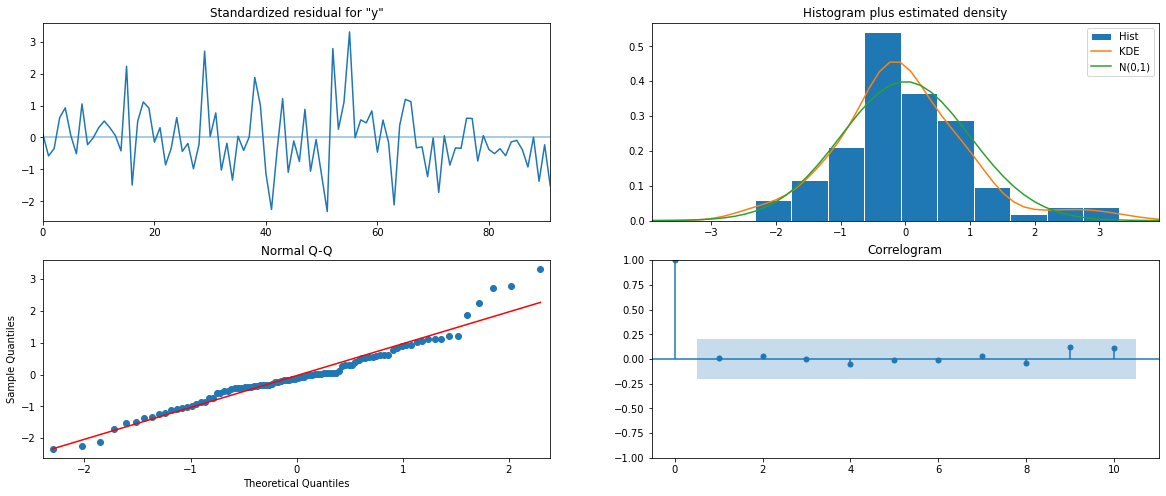

In [259]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

### The above 4 plots in the residuals diagnostic plots tell us: 

- **Standardized residuals plot**: <i>The top left plot shows 1-step-ahead standardized residuals. 
    If model is working correctly, then no pattern should be obvious in the residuals which is clearly not visible from the plot as well .</i>



- **Histogram plus estimated density plot**: <i>This plot shows the distribution of the residuals.The orange line shows a smoothed version of this histogram, and the green line shows a normal distribution. If the model is good these two lines should be the same. Here there are small differences between them, which indicate that our model is doing just well enough.</i>



- **Normal Q-Q plot**: <i>The Q-Q plot compare the distribution of residuals to normal distribution. If the distribution of the residuals is normal, then all the points should lie along the red line, except for some values at the end, which is exactly happening in this case.</i>



- **Correlogram plot**: <i>The correlogram plot is the ACF plot of the residuals rather than the data. 95% of the correlations for lag >0  should not be significant (within the blue shades). If there is a significant correlation in the residuals, it means that there is information in the data that was not captured by the model, which is clearly not in this case</i> .

#### Forecasting using this model for the duration of the test set


In [260]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [261]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1460.244619,412.922804,650.930795,2269.558443
1,1392.437145,429.721337,550.198802,2234.675489
2,1743.201692,430.065902,900.288013,2586.115371
3,1650.066908,433.930064,799.579611,2500.554205
4,1522.656015,434.242951,671.555471,2373.756559


In [262]:
pred_auto_SARIMA_date = predicted_auto_SARIMA.summary_frame(alpha=0.05).set_index(pd.date_range(start='1991-01-01',end='1995-08-01', freq='M'))

In [263]:
rmse = mse(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
print(rmse)

382.57674384111874


#### Plotting the Training data, Test data and the forecasted values with confidence band

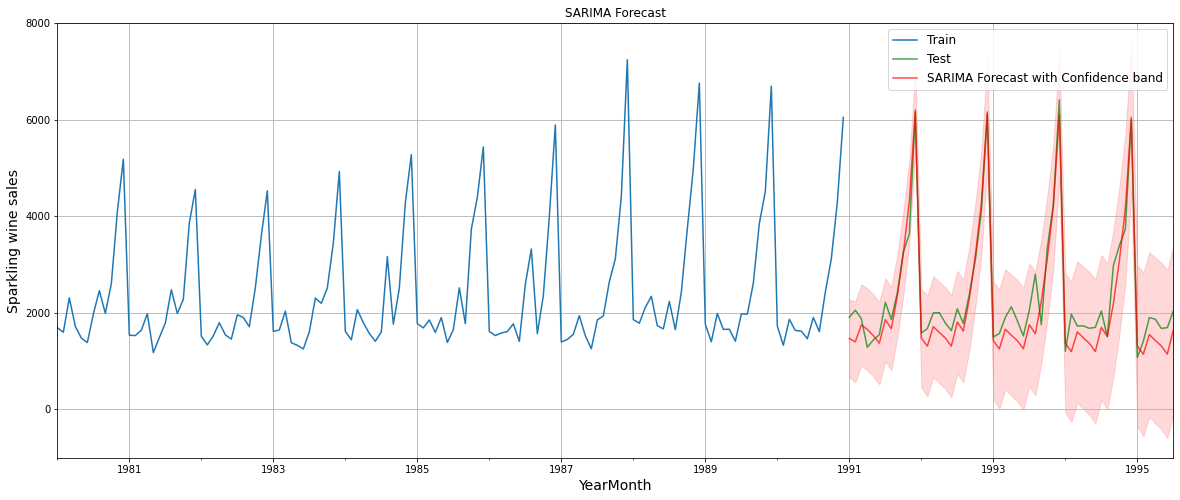

In [264]:
axis = train['Sparkling'].plot(label='Train')
test['Sparkling'].plot(ax=axis, label='Test',color='g', alpha=0.7)
pred_auto_SARIMA_date['mean'].plot(ax=axis, label='SARIMA Forecast with Confidence band', color='r', alpha=0.7)
axis.fill_between(pred_auto_SARIMA_date.index, pred_auto_SARIMA_date['mean_ci_lower'], 
                  pred_auto_SARIMA_date['mean_ci_upper'], color='r', alpha=.15)
axis.set_xlabel('YearMonth', fontsize=14)
axis.set_ylabel('Sparkling wine sales', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.title('SARIMA Forecast')
plt.grid()
plt.show()

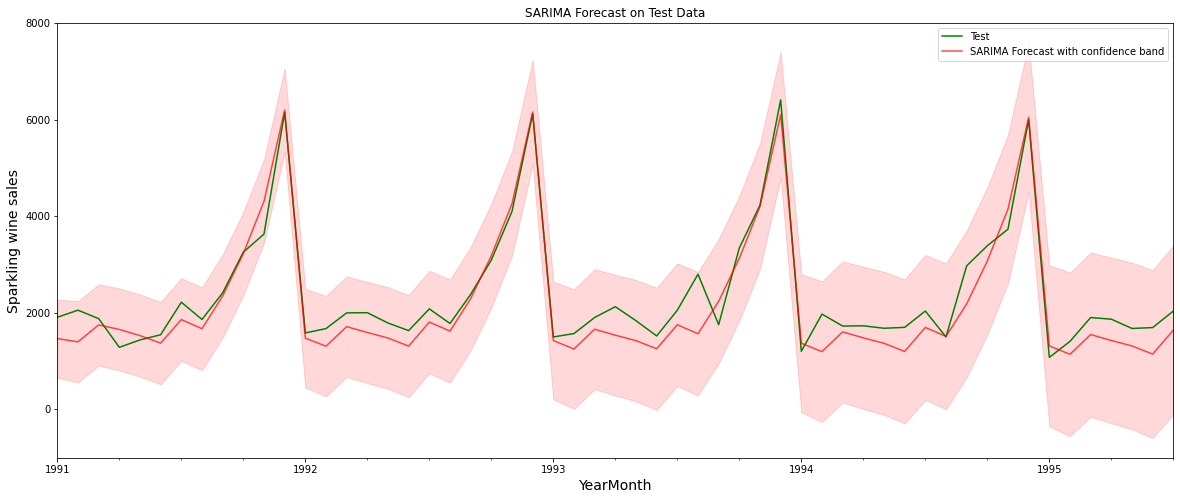

In [265]:
axis = test['Sparkling'].plot(label='Test',color='g')
#test['Sparkling'].plot(ax=axis, label='Test', alpha=0.7)
pred_auto_SARIMA_date['mean'].plot(ax=axis, label='SARIMA Forecast with confidence band', color='r', alpha=0.7)
axis.fill_between(pred_auto_SARIMA_date.index, pred_auto_SARIMA_date['mean_ci_lower'], 
                  pred_auto_SARIMA_date['mean_ci_upper'], color='r', alpha=.15)
axis.set_xlabel('YearMonth', fontsize=14)
axis.set_ylabel('Sparkling wine sales', fontsize=14)
plt.legend(loc='best')
plt.title('SARIMA Forecast on Test Data')
plt.show()

### Model Evaluation

In [266]:
rmse_model10_test = mse(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
print("For SARIMA forecast on the Test Data,  RMSE is %3.3f" %(rmse_model10_test))


For SARIMA forecast on the Test Data,  RMSE is 382.577


In [267]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse_model10_test]}
                           ,index=['SARIMA_forecast'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

,Test RMSE
LnR_forecast,1389.135175
Naive_forecast,3864.279352
SimpleAvg_forecast,1275.081804
Simple_Exp_Smoothing_forecast,1338.004622
Double_Exp_Smoothing_forecast,5291.879833
Triple_Exp_additive_Smoothing_forecast,378.952065
Triple_Exp_multiplicative_Smoothing_forecast,403.012143
Brute_force_Triple_Exp_multiplicative_Smoothing_forecast,361.397300
ARIMA_forecast,1299.980401
SARIMA_forecast,382.576744


----

# 1.7) Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

## Final comparison of all the models:

In [268]:
# Define the model names
model_names = [
    'Linear Regression',
    'Naive',
    'Simple Average',
    'Simple Exponential Smoothing',
    'Double Exponential Smoothing',
    'Triple Exponential Additive Smoothing',
    'Triple Exponential Multiplicative Smoothing',
    'Brute forced Triple Exponential Multiplicative Smoothing',
    'ARIMA',
    'SARIMA']

# Define the model parameters
model_parameters = [
    'NA',
    'NA',
    'NA',
    'alpha: 0.07 ',
    'alpha: 0.66, beta: 0.0001',
    'alpha: 0.11, beta: 0.012, gamma: 0.46',
    'alpha: 0.11, beta: 0.049, gamma: 0.362',
    'alpha: 0.3,  beta: 0.3,   gamma: 0.3',
    '(p, d, q): (2,1,2)',
    '(p, d, q): (1,1,2), (P, D, Q, S): (0,1,2,12)']

# Define the RMSE values on the test data
rmse_values = [
    1389.135175,
    3864.279352,
    1275.081804,
    1338.004622,
    5291.879833,
    378.952065,
    403.012143,
    361.397300,
    1299.980401,
    382.576744]

pd.set_option('display.max_colwidth', None) 

# Create the DataFrame
Model_performance_table = pd.DataFrame({'Model': model_names, 'Parameters': model_parameters, 
                                        'Test RMSE': rmse_values})

# Display the DataFrame
Model_performance_table


,Model,Parameters,Test RMSE
0,Linear Regression,NA,1389.135175
1,Naive,NA,3864.279352
2,Simple Average,NA,1275.081804
3,Simple Exponential Smoothing,alpha: 0.07,1338.004622
4,Double Exponential Smoothing,"alpha: 0.66, beta: 0.0001",5291.879833
5,Triple Exponential Additive Smoothing,"alpha: 0.11, beta: 0.012, gamma: 0.46",378.952065
6,Triple Exponential Multiplicative Smoothing,"alpha: 0.11, beta: 0.049, gamma: 0.362",403.012143
7,Brute forced Triple Exponential Multiplicative Smoothing,"alpha: 0.3, beta: 0.3, gamma: 0.3",361.397300
8,ARIMA,"(p, d, q): (2,1,2)",1299.980401
9,SARIMA,"(p, d, q): (1,1,2), (P, D, Q, S): (0,1,2,12)",382.576744


In [269]:
Model_performance_table.sort_values(by=['Test RMSE'])


,Model,Parameters,Test RMSE
7,Brute forced Triple Exponential Multiplicative Smoothing,"alpha: 0.3, beta: 0.3, gamma: 0.3",361.397300
5,Triple Exponential Additive Smoothing,"alpha: 0.11, beta: 0.012, gamma: 0.46",378.952065
9,SARIMA,"(p, d, q): (1,1,2), (P, D, Q, S): (0,1,2,12)",382.576744
6,Triple Exponential Multiplicative Smoothing,"alpha: 0.11, beta: 0.049, gamma: 0.362",403.012143
2,Simple Average,NA,1275.081804
8,ARIMA,"(p, d, q): (2,1,2)",1299.980401
3,Simple Exponential Smoothing,alpha: 0.07,1338.004622
0,Linear Regression,NA,1389.135175
1,Naive,NA,3864.279352
4,Double Exponential Smoothing,"alpha: 0.66, beta: 0.0001",5291.879833


----

---

# 1.8) Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [270]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
Brute_force_Triple_Exp_multiplicative_Smoothing_forecast,361.397300
Triple_Exp_additive_Smoothing_forecast,378.952065
SARIMA_forecast,382.576744
Triple_Exp_multiplicative_Smoothing_forecast,403.012143
SimpleAvg_forecast,1275.081804
ARIMA_forecast,1299.980401
Simple_Exp_Smoothing_forecast,1338.004622
LnR_forecast,1389.135175
Naive_forecast,3864.279352
Double_Exp_Smoothing_forecast,5291.879833


#### As we can see the test rmse values for the top three models are pretty close , therefore we will make two final models, one for triple exponential smoothing and one for SARIMA 

## Final model 1: 
## Using Brute force method to get best parameters (alpha, beta and gamma) for Holt Winter's linear method with multiplicative errors 

In [271]:
# Initializing the triple Exponential Smoothing Model
final_mult = ExponentialSmoothing(df1,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
final_mult_autofit = final_mult.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(final_mult.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07611233888055394, 'smoothing_trend': 0.06524380126893013, 'smoothing_seasonal': 0.2736267945889893, 'damping_trend': nan, 'initial_level': 2356.1166181634553, 'initial_trend': -15.04572813125736, 'initial_seasons': array([0.72829258, 0.70049277, 0.88857303, 0.81468567, 0.67600412,
       0.66513642, 0.88442932, 1.13244727, 0.93282493, 1.2536224 ,
       1.9208532 , 2.50061252]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [272]:
final_model1_predict = final_mult_autofit.forecast(12)
final_model1_predict

1995-08-01    1931.433752
1995-09-01    2350.816510
1995-10-01    3177.669796
1995-11-01    3915.687006
1995-12-01    5981.419940
1996-01-01    1356.205971
1996-02-01    1597.557328
1996-03-01    1828.070205
1996-04-01    1788.696447
1996-05-01    1639.442061
1996-06-01    1553.665365
1996-07-01    1961.833167
Freq: MS, dtype: float64

In [273]:
final_model_train=df1.copy()

In [274]:
# Create an empty DataFrame to store the metrics
final_model1_metrics = pd.DataFrame(columns=['Alpha Values', 'Beta Values', 'Gamma Values', 'Test RMSE'])
final_model1_metrics

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [275]:

# Initialize an empty dictionary to store predicted values
final_model_predicted = {}

for i in np.arange(0.3, 1.1, 0.1):
    for j in np.arange(0.3, 1.1, 0.1):
        for k in np.arange(0.3, 1.1, 0.1):
            final_model1_metrics_i_j_k = final_mult.fit(smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k, optimized=False, use_brute=True)
            
        
            pred_values = ('predict', i, j, k)
            
            # Store the predicted values
            final_model_predicted[pred_values] = final_model1_metrics_i_j_k.forecast(steps=12)
            
            # Calculate RMSE
            rmse_final_model1 = mse(df1['Sparkling'][-12:], final_model_predicted[pred_values], squared=False)
            final_model1_metrics = pd.concat([final_model1_metrics, pd.DataFrame({'Alpha Values': i, 'Beta Values': j, 'Gamma Values': k,
                                                                                  'Test RMSE': rmse_final_model1},
                                                         index=[0])], ignore_index=True)
    



In [276]:
final_model1_metrics

,Alpha Values,Beta Values,Gamma Values,Test RMSE
0,0.3,0.3,0.3,527.101441
1,0.3,0.3,0.4,347.614364
2,0.3,0.3,0.5,725.059180
3,0.3,0.3,0.6,1318.702042
4,0.3,0.3,0.7,1823.642117
...,...,...,...,...
507,1.0,1.0,0.6,284456.031499
508,1.0,1.0,0.7,7951.623315
509,1.0,1.0,0.8,380575.158935
510,1.0,1.0,0.9,963843.587747


In [277]:
final_model1_metrics.sort_values(by=['Test RMSE']).head()


,Alpha Values,Beta Values,Gamma Values,Test RMSE
1,0.3,0.3,0.4,347.614364
320,0.8,0.3,0.3,380.839221
256,0.7,0.3,0.3,455.358006
384,0.9,0.3,0.3,462.208893
448,1.0,0.3,0.3,510.581051


Plotting the complete data alongwith forecasted values using brute force alpha, beta and gamma determination


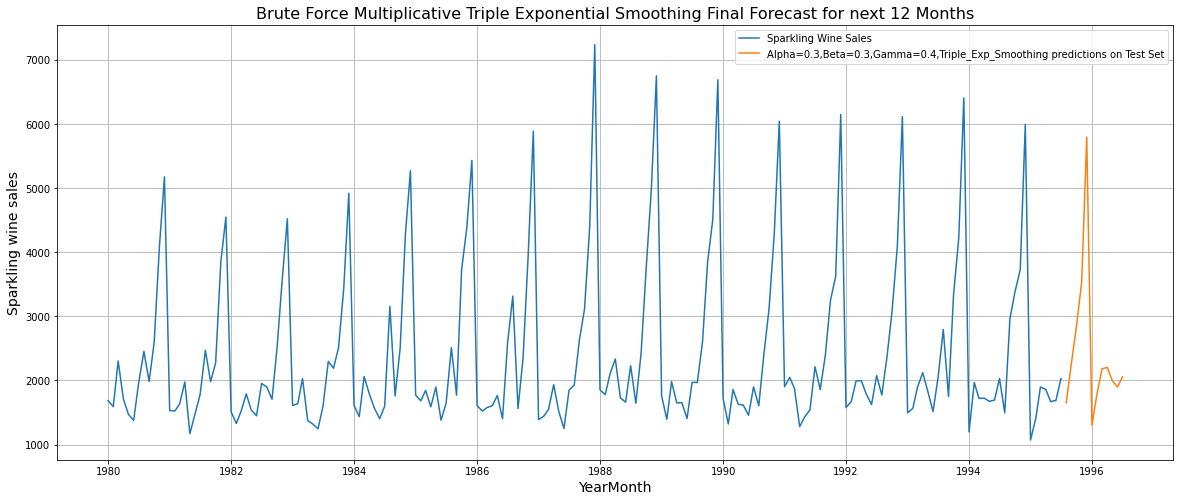

In [278]:
plt.plot(df1['Sparkling'], label='Sparkling Wine Sales')

plt.plot(final_model_predicted['predict', 0.3, 0.3, 0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,Triple_Exp_Smoothing predictions on Test Set')

plt.legend(loc='best', fontsize=10)
plt.xlabel('YearMonth', fontsize=14)
plt.ylabel('Sparkling wine sales', fontsize=14)
plt.title('Brute Force Multiplicative Triple Exponential Smoothing Final Forecast for next 12 Months', fontsize=16)
plt.grid();

In [279]:
rmse_final_model1 = final_model1_metrics.sort_values(by=['Test RMSE']).values[0][3]

In [280]:
print("For 12 months forecast on the complete data using triple exp smoothing where (⍺,β,𝛄)=0.3,  RMSE is %3.3f" %(rmse_final_model1))


For 12 months forecast on the complete data using triple exp smoothing where (⍺,β,𝛄)=0.3,  RMSE is 347.614


In [281]:
resultsDf_final_model1 = pd.DataFrame({'Model RMSE': [rmse_final_model1]}
                           ,index=['⍺=0.3,β=0.3,𝛄=0.3,Triple_Expo_Smoothing_full_data'])

resultsDf_final_model1

,Model RMSE
"⍺=0.3,β=0.3,𝛄=0.3,Triple_Expo_Smoothing_full_data",347.614364


## Final model 2: 
## Using best parameters for SARIMA: 

In [282]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [283]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(df1['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = pd.concat([SARIMA_AIC, pd.DataFrame({'param':[param],'seasonal':[param_seasonal] ,'AIC': [results_SARIMA.aic]})], ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.61214D+00    |proj g|=  7.34843D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   7.348D-06   8.612D+00
  F =   8.6121417012810149     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:3222.9409962790996
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.25449D+00    |proj g|=  6.62002D-02

At iterate   20    f=  6.99905D+00    |proj g|=  9.10999D-03

At iterate   25    f=  6.99861D+00    |proj g|=  4.49070D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     36      1     0     0   4.720D-06   6.999D+00
  F =   6.9986088048502291     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:2623.4796930139855
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     20     22      1     0     0   1.025D-06   6.579D+00
  F =   6.5792554179091640     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:2464.641526298027
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14316D+00    |proj g|=  1.57777D-01

At iterate    5    f=  6.12009D+00    |proj g|=  4.24817D-04

At iterate   10    f=  6.11959D+00    |proj g|=  2.04979D-02

At iterate   15

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.63418D+00    |proj g|=  1.08125D+00

At iterate    5    f=  6.60395D+00    |proj g|=  2.53975D-01

At iterate   10    f=  6.60065D+00    |proj g|=  7.25285D-03

At iterate   15    f=  6.60064D+00    |proj g|=  1.17825D-03

At iterate   20    f=  6.60062D+00    |proj g|=  1.70671D-02

At iterate   25    f=  6.59866D+00    |proj g|=  2.13468D-01

At iterate   30    f=  6.58593D+00    |proj g|=  2.23743D-02

At iterate   35    f=  6.58590D+00    |proj g|=  7.63175D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:2466.523816938206
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.13271D+00    |proj g|=  1.70687D-01

At iterate    5    f=  6.11417D+00    |proj g|=  2.52366D-02

At iterate   10    f=  6.11201D+00    |proj g|=  4.21111D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   1.447D-05   6.112D+00
  F =   6.1120062344199377     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.64062D+00    |proj g|=  3.44892D-02

At iterate    5    f=  6.62851D+00    |proj g|=  5.79431D-02

At iterate   10    f=  6.62819D+00    |proj g|=  1.85035D-04

At iterate   15    f=  6.62814D+00    |proj g|=  4.15937D-03

At iterate   20    f=  6.62560D+00    |proj g|=  1.01249D-01

At iterate   25    f=  6.62505D+00    |proj g|=  2.64317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     42      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  6.57991D+00    |proj g|=  1.96974D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     16      1     0     0   1.152D-04   6.580D+00
  F =   6.5798846394127883     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:2470.8768551403828
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.16056D+00    |proj g|=  4.21769D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.15077D+00    |proj g|=  5.43671D-02

At iterate   10    f=  6.14927D+00    |proj g|=  1.74614D-04

At iterate   15    f=  6.14927D+00    |proj g|=  1.82530D-03

At iterate   20    f=  6.14867D+00    |proj g|=  2.07910D-02

At iterate   25    f=  6.14580D+00    |proj g|=  3.47471D-03

At iterate   30    f=  6.14579D+00    |proj g|=  4.69160D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     42      1     0     0   6.430D-06   6.146D+00
  F =   6.1457902609121868     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:2306.5255575811

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.13213D+00    |proj g|=  1.66977D-01

At iterate    5    f=  6.11319D+00    |proj g|=  1.63143D-02

At iterate   10    f=  6.11083D+00    |proj g|=  7.67361D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     16      1     0     0   2.846D-05   6.111D+00
  F =   6.1108289350114431     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:2295.4500216942797
RUNNING THE L-B

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.68950D+00    |proj g|=  5.19112D-02

At iterate   10    f=  7.68932D+00    |proj g|=  1.52567D-03

At iterate   15    f=  7.68872D+00    |proj g|=  3.32832D-02

At iterate   20    f=  7.64545D+00    |proj g|=  2.95877D-01

At iterate   25    f=  7.52141D+00    |proj g|=  2.66046D-02

At iterate   30    f=  7.52097D+00    |proj g|=  2.20419D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     46      1     0     0   2.204D-06   7.521D+00
  F =   7.5209749107952595     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:2818.8446166374

 This problem is unconstrained.



At iterate    5    f=  7.10305D+00    |proj g|=  3.27689D-02
  ys=-3.233E-03  -gs= 7.974E-03 BFGS update SKIPPED

At iterate   10    f=  7.10149D+00    |proj g|=  4.57413D-04

At iterate   15    f=  7.10140D+00    |proj g|=  6.33280D-03

At iterate   20    f=  7.09627D+00    |proj g|=  4.03977D-02

At iterate   25    f=  6.82734D+00    |proj g|=  2.45829D-01

At iterate   30    f=  6.82124D+00    |proj g|=  6.75177D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     52      1     1     0   9.107D-05   6.821D+00
  F =   6.8212424366048756     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.35254D+00    |proj g|=  4.09106D-03

At iterate   15    f=  6.35024D+00    |proj g|=  6.00452D-02

At iterate   20    f=  6.32053D+00    |proj g|=  2.25147D-02

At iterate   25    f=  6.32014D+00    |proj g|=  1.95941D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     31      1     0     0   1.959D-06   6.320D+00
  F =   6.3201392747576444     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:2369.732088759359
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  5.88544D+00    |proj g|=  2.56961D-02

At iterate   10    f=  5.88517D+00    |proj g|=  1.13265D-03

At iterate   15    f=  5.88494D+00    |proj g|=  2.62670D-02

At iterate   20    f=  5.86675D+00    |proj g|=  3.22472D-01

At iterate   25    f=  5.85913D+00    |proj g|=  6.09737D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     34      1     0     0   1.632D-06   5.859D+00
  F =   5.8591327708998557     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:2199.315656316546
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.00521D+00    |proj g|=  5.34208D-01
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:2611.6896455413157
At iterate   30    f=  6.96715D+00    |proj g|=  2.28340D-02


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     44      1     0     0   2.755D-05   6.967D+00
  F =   6.9670846137468336     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56009D+00    |proj g|=  9.16325D-02

At iterate    

 This problem is unconstrained.



At iterate   10    f=  7.02350D+00    |proj g|=  2.35629D-03

At iterate   15    f=  7.02345D+00    |proj g|=  1.60391D-03

At iterate   20    f=  7.02119D+00    |proj g|=  1.73355D-02

At iterate   25    f=  6.87230D+00    |proj g|=  2.22769D-01

At iterate   30    f=  6.41069D+00    |proj g|=  5.07831D-01

At iterate   35    f=  6.32519D+00    |proj g|=  1.67458D-01

At iterate   40    f=  6.32202D+00    |proj g|=  2.80641D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     56      1     0     0   1.373D-05   6.322D+00
  F =   6.3220178911826279     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.35293D+00    |proj g|=  4.83905D-02

At iterate   10    f=  6.35042D+00    |proj g|=  6.13282D-04

At iterate   15    f=  6.35035D+00    |proj g|=  1.55176D-02

At iterate   20    f=  6.34490D+00    |proj g|=  1.16857D-01

At iterate   25    f=  6.31769D+00    |proj g|=  1.59297D-02

At iterate   30    f=  6.31725D+00    |proj g|=  5.33773D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     39      1     0     0   1.040D-05   6.317D+00
  F =   6.3172510722362230     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:2370.6519010163

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93629D+00    |proj g|=  1.67603D-01

At iterate    5    f=  5.88615D+00    |proj g|=  7.01706D-03

At iterate   10    f=  5.88446D+00    |proj g|=  4.72394D-03

At iterate   15    f=  5.88443D+00    |proj g|=  2.28138D-03

At iterate   20    f=  5.88260D+00    |proj g|=  5.19481D-02

At iterate   25    f=  5.85875D+00    |proj g|=  3.57339D-02

At iterate   30    f=  5.85852D+00    |proj g|=  1.40706D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  7.11095D+00    |proj g|=  2.08329D-03

At iterate   10    f=  7.11075D+00    |proj g|=  9.34705D-03

At iterate   15    f=  7.08535D+00    |proj g|=  1.65596D-01

At iterate   20    f=  6.53333D+00    |proj g|=  3.74041D-01

At iterate   25    f=  6.42809D+00    |proj g|=  4.76400D-02

At iterate   30    f=  6.42770D+00    |proj g|=  2.96268D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     46      1     0     0   2.919D-06   6.428D+00
  F =   6.4276956424424245     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:2411.9581702734

 This problem is unconstrained.



At iterate   25    f=  6.79584D+00    |proj g|=  9.70867D-01

At iterate   30    f=  6.41864D+00    |proj g|=  1.29789D-01

At iterate   35    f=  6.39854D+00    |proj g|=  1.39721D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     54      1     0     0   1.913D-04   6.399D+00
  F =   6.3985088273911286     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:2403.042301444282
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   10    f=  7.02099D+00    |proj g|=  2.26442D-03

At iterate   15    f=  7.02083D+00    |proj g|=  9.10851D-04

At iterate   20    f=  7.02077D+00    |proj g|=  3.24878D-03

At iterate   25    f=  7.01748D+00    |proj g|=  1.85812D-02

At iterate   30    f=  6.99772D+00    |proj g|=  1.54607D-01

At iterate   35    f=  6.71947D+00    |proj g|=  2.71387D-01

At iterate   40    f=  6.38721D+00    |proj g|=  4.96243D-01

At iterate   45    f=  6.35432D+00    |proj g|=  5.31690D-02

At iterate   50    f=  6.33917D+00    |proj g|=  2.91151D-01

At iterate   55    f=  6.33074D+00    |proj g|=  9.49064D-02

At iterate   60    f=  6.32683D+00    |proj g|=  1.61491D-02

At iterate   65    f=  6.32610D+00    |proj g|=  1.41710D-02

At iterate   70    f=  6.32591D+00    |proj g|=  3.60250D-03

At iterate   75    f=  6.32589D+00    |proj g|=  3.07818D-03

At iterate   80    f=  6.32569D+00    |proj g|=  3.32597D-02

At iterate   85    f=  6.32511D+00    |proj g|=  4.22656D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  5.96801D+00    |proj g|=  5.10616D-04

At iterate   15    f=  5.96783D+00    |proj g|=  3.00242D-02

At iterate   20    f=  5.95239D+00    |proj g|=  1.58630D-01

At iterate   25    f=  5.94441D+00    |proj g|=  1.17119D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     38      1     0     0   7.909D-06   5.944D+00
  F =   5.9443861304855972     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:2231.2004128016133
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  5.96676D+00    |proj g|=  3.05955D-02

At iterate   10    f=  5.96394D+00    |proj g|=  5.75163D-02

At iterate   15    f=  5.96319D+00    |proj g|=  5.34034D-04

At iterate   20    f=  5.96316D+00    |proj g|=  6.06406D-03

At iterate   25    f=  5.95978D+00    |proj g|=  7.25028D-02

At iterate   30    f=  5.93784D+00    |proj g|=  5.81432D-02

At iterate   35    f=  5.93691D+00    |proj g|=  1.13121D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     46      1     0     0   4.856D-06   5.937D+00
  F =   5.9368980698045393     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  5.88684D+00    |proj g|=  1.67915D-02

At iterate   10    f=  5.88483D+00    |proj g|=  4.64081D-03

At iterate   15    f=  5.88436D+00    |proj g|=  2.49999D-02

At iterate   20    f=  5.88424D+00    |proj g|=  1.03038D-03

At iterate   25    f=  5.88406D+00    |proj g|=  9.46400D-03

At iterate   30    f=  5.87886D+00    |proj g|=  2.99503D-02

At iterate   35    f=  5.86290D+00    |proj g|=  1.05681D-02

At iterate   40    f=  5.85504D+00    |proj g|=  7.40451D-03

At iterate   45    f=  5.85492D+00    |proj g|=  4.41679D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     54   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.57335D+00    |proj g|=  1.80380D-01

At iterate   30    f=  7.48392D+00    |proj g|=  3.65790D-01

At iterate   35    f=  7.43029D+00    |proj g|=  2.53367D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     53      1     0     0   1.088D-06   7.430D+00
  F =   7.4302821972512723     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:2786.925541771976
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  7.03961D+00    |proj g|=  3.26987D-02

At iterate   10    f=  7.03849D+00    |proj g|=  1.78900D-03

At iterate   15    f=  7.03847D+00    |proj g|=  1.05748D-02

At iterate   20    f=  7.03487D+00    |proj g|=  2.18710D-01

At iterate   25    f=  6.88871D+00    |proj g|=  4.16026D-01

At iterate   30    f=  6.74086D+00    |proj g|=  2.42026D-01

At iterate   35    f=  6.72949D+00    |proj g|=  8.97298D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     48      1     0     0   2.904D-05   6.729D+00
  F =   6.7294856466548802     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.29927D+00    |proj g|=  5.88910D-02

At iterate   20    f=  6.27773D+00    |proj g|=  4.78257D-02

At iterate   25    f=  6.27704D+00    |proj g|=  6.17993D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     30      1     0     0   1.328D-04   6.277D+00
  F =   6.2770422260351175     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:2355.613792537134
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  5.83312D+00    |proj g|=  4.08805D-02

At iterate   10    f=  5.83153D+00    |proj g|=  4.35705D-03

At iterate   15    f=  5.83151D+00    |proj g|=  9.87985D-04

At iterate   20    f=  5.83132D+00    |proj g|=  1.37863D-02

At iterate   25    f=  5.82383D+00    |proj g|=  1.03576D-01

At iterate   30    f=  5.81333D+00    |proj g|=  2.76288D-02

At iterate   35    f=  5.81285D+00    |proj g|=  1.19589D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     41      1     0     0   1.709D-05   5.813D+00
  F =   5.8128503925764212     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  7.58038D+00    |proj g|=  8.77914D-01

At iterate   20    f=  7.28169D+00    |proj g|=  7.95348D-01

At iterate   25    f=  6.96029D+00    |proj g|=  1.67983D-01

At iterate   30    f=  6.95744D+00    |proj g|=  1.23421D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     45      1     0     0   2.674D-06   6.957D+00
  F =   6.9574350682110913     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:2610.0807155109483
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  6.79574D+00    |proj g|=  4.74234D-01

At iterate   35    f=  6.72975D+00    |proj g|=  8.94358D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     52      1     0     0   2.350D-05   6.730D+00
  F =   6.7297022592145677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:2526.9086449462484
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98281D+00    |proj g|=  1.91128D-01

At iterate    

 This problem is unconstrained.



At iterate   30    f=  6.41722D+00    |proj g|=  3.13632D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     39      1     0     0   8.944D-07   6.417D+00
  F =   6.4172159504726256     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:2408.038765476762
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.31481D+00    |proj g|=  1.12428D-01

At iterate    5    f=  6.30098D+00    |proj g|=  3.95684D-02

At iterate   10

 This problem is unconstrained.



At iterate   25    f=  6.27437D+00    |proj g|=  1.88909D-02

At iterate   30    f=  6.27410D+00    |proj g|=  7.34888D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     36      1     0     0   7.349D-06   6.274D+00
  F =   6.2741006531500574     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:2356.5136442781213
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85131D+00    |proj g|=  1.19953D-01


 This problem is unconstrained.



At iterate    5    f=  5.83358D+00    |proj g|=  3.67516D-02

At iterate   10    f=  5.83193D+00    |proj g|=  9.21522D-03

At iterate   15    f=  5.83108D+00    |proj g|=  9.41270D-04

At iterate   20    f=  5.83055D+00    |proj g|=  4.69217D-02

At iterate   25    f=  5.81406D+00    |proj g|=  2.77094D-02

At iterate   30    f=  5.81255D+00    |proj g|=  1.30659D-03

At iterate   35    f=  5.81254D+00    |proj g|=  2.22219D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     41      1     0     0   1.270D-05   5.813D+00
  F =   5.8125393377774133     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  7.09875D+00    |proj g|=  1.01516D-02

At iterate   10    f=  7.09849D+00    |proj g|=  8.62081D-04

At iterate   15    f=  7.09806D+00    |proj g|=  1.16260D-02

At iterate   20    f=  7.06044D+00    |proj g|=  5.19782D-02

At iterate   25    f=  6.61947D+00    |proj g|=  1.77852D-01

At iterate   30    f=  6.42687D+00    |proj g|=  1.40410D-01

At iterate   35    f=  6.41815D+00    |proj g|=  7.34459D-03

At iterate   40    f=  6.41812D+00    |proj g|=  9.46461D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     55      1     0     0   9.465D-06   6.418D+00
  F =   6.41811964741

 This problem is unconstrained.



At iterate   25    f=  7.05548D+00    |proj g|=  6.55450D-02

At iterate   30    f=  6.76882D+00    |proj g|=  4.67433D-01

At iterate   35    f=  6.41606D+00    |proj g|=  1.12546D-01

At iterate   40    f=  6.39322D+00    |proj g|=  9.36195D-03

At iterate   45    f=  6.39321D+00    |proj g|=  5.07354D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     70      1     0     0   5.074D-06   6.393D+00
  F =   6.3932075418557366     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:2403.0596206540454
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   10    f=  6.96528D+00    |proj g|=  1.72043D-03

At iterate   15    f=  6.96518D+00    |proj g|=  5.65128D-04

At iterate   20    f=  6.96503D+00    |proj g|=  6.04171D-03

At iterate   25    f=  6.94973D+00    |proj g|=  7.01035D-02

At iterate   30    f=  6.77833D+00    |proj g|=  3.51377D-01

At iterate   35    f=  6.29090D+00    |proj g|=  1.05496D-01

At iterate   40    f=  6.27487D+00    |proj g|=  9.54555D-03

At iterate   45    f=  6.27486D+00    |proj g|=  1.16033D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     58      1     0     0   1.160D-04   6.275D+00
  F =   6.27486186002

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96223D+00    |proj g|=  1.24598D-01

At iterate    5    f=  5.95511D+00    |proj g|=  6.01487D-04

At iterate   10    f=  5.95508D+00    |proj g|=  3.36172D-03

At iterate   15    f=  5.95284D+00    |proj g|=  7.61532D-02

At iterate   20    f=  5.93886D+00    |proj g|=  2.75139D-03

At iterate   25    f=  5.93886D+00    |proj g|=  1.85736D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  5.95368D+00    |proj g|=  8.64951D-03

At iterate   10    f=  5.95055D+00    |proj g|=  1.08292D-02

At iterate   15    f=  5.95041D+00    |proj g|=  4.74178D-04

At iterate   20    f=  5.95003D+00    |proj g|=  2.00947D-02

At iterate   25    f=  5.93669D+00    |proj g|=  8.14126D-02

At iterate   30    f=  5.92971D+00    |proj g|=  3.55675D-03

At iterate   35    f=  5.92969D+00    |proj g|=  1.96427D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     48      1     0     0   3.470D-05   5.930D+00
  F =   5.9296844616496331     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85116D+00    |proj g|=  1.16226D-01

At iterate    5    f=  5.83235D+00    |proj g|=  4.22882D-02

At iterate   10    f=  5.83148D+00    |proj g|=  1.01920D-02

At iterate   15    f=  5.83087D+00    |proj g|=  1.12598D-02

At iterate   20    f=  5.83081D+00    |proj g|=  6.21106D-04

At iterate   25    f=  5.83079D+00    |proj g|=  2.61853D-03

At iterate   30    f=  5.82908D+00    |proj g|=  3.09105D-02

At iterate   35    f=  5.81929D+00    |proj g|=  3.08320D-02

At iterate   40    f=  5.81119D+00    |proj g|=  6.89132D-03

At iterate   45    f=  5.81111D+00    |proj g|=  1.74321D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.77812D+00    |proj g|=  1.61530D-02

At iterate   15    f=  7.74038D+00    |proj g|=  1.89907D-01

At iterate   20    f=  7.67639D+00    |proj g|=  1.62737D-01

At iterate   25    f=  7.65602D+00    |proj g|=  5.37554D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     33      1     0     0   4.176D-06   7.656D+00
  F =   7.6560242569797685     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:2869.3530721104335


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24276D+00    |proj g|=  1.85787D-01

At iterate    5    f=  7.18328D+00    |proj g|=  4.16615D-04

At iterate   10    f=  7.18323D+00    |proj g|=  2.77776D-03

At iterate   15    f=  7.17711D+00    |proj g|=  3.58035D-02

At iterate   20    f=  7.01457D+00    |proj g|=  2.69048D-01

At iterate   25    f=  6.96535D+00    |proj g|=  7.84718D-03

At iterate   30    f=  6.96464D+00    |proj g|=  1.88853D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.04502D+00    |proj g|=  2.87924D-04

At iterate   10    f=  6.04501D+00    |proj g|=  3.09305D-03

At iterate   15    f=  6.04399D+00    |proj g|=  3.68459D-02

At iterate   20    f=  6.03686D+00    |proj g|=  3.76270D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   9.385D-06   6.037D+00
  F =   6.0368385134722828     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:2265.777604038634
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.61747D+00    |proj g|=  2.63681D-02

At iterate   10    f=  7.61727D+00    |proj g|=  1.48121D-03

At iterate   15    f=  7.61678D+00    |proj g|=  1.13129D-02

At iterate   20    f=  7.57733D+00    |proj g|=  2.28119D-01

At iterate   25    f=  7.00188D+00    |proj g|=  1.89502D-01

At iterate   30    f=  6.96847D+00    |proj g|=  9.75465D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     42      1     0     0   6.530D-04   6.968D+00
  F =   6.9684591606697399     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:2614.2037260904

 This problem is unconstrained.



At iterate    5    f=  7.09163D+00    |proj g|=  2.57745D-02

At iterate   10    f=  7.09060D+00    |proj g|=  8.58056D-04

At iterate   15    f=  7.09057D+00    |proj g|=  2.85117D-03

At iterate   20    f=  7.08878D+00    |proj g|=  4.16138D-02

At iterate   25    f=  6.99084D+00    |proj g|=  2.30822D-01

At iterate   30    f=  6.60523D+00    |proj g|=  4.91117D-01

At iterate   35    f=  6.51488D+00    |proj g|=  4.63344D-02

At iterate   40    f=  6.50598D+00    |proj g|=  6.83285D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     55      1     0     0   7.825D-05   6.506D+00
  F =   6.50597554292

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.54462D+00    |proj g|=  2.84509D-02

At iterate   15    f=  6.53998D+00    |proj g|=  1.89573D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   1.071D-06   6.540D+00
  F =   6.5399724199465021     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:2451.9496850599917
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.53305D+00    |proj g|=  5.60973D-02

At iterate    

 This problem is unconstrained.



At iterate   10    f=  6.04426D+00    |proj g|=  7.32497D-04

At iterate   15    f=  6.04425D+00    |proj g|=  1.37510D-03

At iterate   20    f=  6.04353D+00    |proj g|=  2.23341D-02

At iterate   25    f=  6.03605D+00    |proj g|=  5.84283D-03

At iterate   30    f=  6.03599D+00    |proj g|=  4.57592D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     34      1     0     0   7.531D-07   6.036D+00
  F =   6.0359902156763452     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 1, 2, 12) - AIC:2267.460340662953
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   25    f=  6.53920D+00    |proj g|=  1.72931D-03
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:2453.655616957415

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     37      1     0     0   1.643D-05   6.539D+00
  F =   6.5391861415973667     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09122D+00    |proj g|=  1.98498D-02

At iterate    5    f=  7.08906D+00    |proj g|=  7.63614D-03

At iterate   10

 This problem is unconstrained.



At iterate   25    f=  6.89039D+00    |proj g|=  2.77012D-01

At iterate   30    f=  6.54724D+00    |proj g|=  1.11373D+00

At iterate   35    f=  6.50658D+00    |proj g|=  5.41752D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     59      1     0     0   7.097D-05   6.507D+00
  F =   6.5065437406059878     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:2443.4473589866393
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   15    f=  7.08810D+00    |proj g|=  2.73710D-03

At iterate   20    f=  6.95196D+00    |proj g|=  2.19924D-01

At iterate   25    f=  6.61599D+00    |proj g|=  2.12250D-01

At iterate   30    f=  6.50099D+00    |proj g|=  2.81589D-02

At iterate   35    f=  6.50050D+00    |proj g|=  3.02402D-03

At iterate   40    f=  6.50048D+00    |proj g|=  3.32978D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     57      1     0     0   4.762D-05   6.500D+00
  F =   6.5004784747303122     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:2443.1789495491

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:2269.1239004706704
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.05254D+00    |proj g|=  4.38045D-02

At iterate    5    f=  6.04513D+00    |proj g|=  2.07367D-02

At iterate   10    f=  6.04432D+00    |proj g|=  3.02126D-04

At iterate   15    f=  6.04428D+00    |proj g|=  4.81580D-03

At iterate   20    f=  6.04027D+00    |proj g|=  4.11387D-02

At iterate   25    f=  6.03466D+00    |proj g|=  8.58367D-04

At iterate   30    f=  6.03465D+00    |proj g|=  5.49137D-03

At iterate   35    f=  6.03441D+00    |proj g|=  4.68209D-03

At iterate   40    f=  6.03438D+00    |proj g|=  2.95536D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of

 This problem is unconstrained.


At iterate    5    f=  6.04589D+00    |proj g|=  1.18632D-02

At iterate   10    f=  6.04390D+00    |proj g|=  6.61638D-03

At iterate   15    f=  6.04379D+00    |proj g|=  3.30541D-04

At iterate   20    f=  6.04373D+00    |proj g|=  5.71580D-03

At iterate   25    f=  6.03924D+00    |proj g|=  3.71574D-02

At iterate   30    f=  6.03437D+00    |proj g|=  9.91743D-04

At iterate   35    f=  6.03429D+00    |proj g|=  4.35325D-03

At iterate   40    f=  6.03427D+00    |proj g|=  7.28209D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     43      1     0     0   7.282D-05   6.034D+00
  F =   6.034266452403

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.56180D+00    |proj g|=  3.03104D-01

At iterate   30    f=  7.47724D+00    |proj g|=  2.39918D-01

At iterate   35    f=  7.47425D+00    |proj g|=  2.38022D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     46      1     0     0   9.404D-07   7.474D+00
  F =   7.4742517115814371     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:2803.3701401314574
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   15    f=  7.07948D+00    |proj g|=  2.02409D-02

At iterate   20    f=  7.07233D+00    |proj g|=  2.82527D-01

At iterate   25    f=  6.82379D+00    |proj g|=  3.06835D-01

At iterate   30    f=  6.77936D+00    |proj g|=  1.91031D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     38      1     0     0   2.893D-05   6.779D+00
  F =   6.7793551170145276     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:2545.478813763433
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.36445D+00    |proj g|=  1.87032D-01

At iterate    5    f=  6.34685D+00    |proj g|=  6.05090D-04

At iterate   10    f=  6.34681D+00    |proj g|=  6.95552D-03

At iterate   15    f=  6.34135D+00    |proj g|=  8.84359D-02

At iterate   20    f=  6.31541D+00    |proj g|=  1.11617D-02

At iterate   25    f=  6.31538D+00    |proj g|=  1.43369D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     31      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  5.88010D+00    |proj g|=  5.72859D-03

At iterate   10    f=  5.88004D+00    |proj g|=  1.93875D-03

At iterate   15    f=  5.87918D+00    |proj g|=  2.39039D-02

At iterate   20    f=  5.86029D+00    |proj g|=  1.49440D-01

At iterate   25    f=  5.85514D+00    |proj g|=  1.18173D-03

At iterate   30    f=  5.85514D+00    |proj g|=  2.85832D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     33      1     0     0   2.858D-05   5.855D+00
  F =   5.8551364448055825     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:2199.8210303572

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.52895D+00    |proj g|=  8.83009D-04

At iterate   15    f=  7.52886D+00    |proj g|=  5.19755D-03

At iterate   20    f=  7.51192D+00    |proj g|=  1.68407D-01

At iterate   25    f=  7.48693D+00    |proj g|=  7.58559D-02

At iterate   30    f=  7.15664D+00    |proj g|=  2.19971D+00

At iterate   35    f=  6.78728D+00    |proj g|=  8.97398D-02

At iterate   40    f=  6.77201D+00    |proj g|=  2.26932D-02

At iterate   45    f=  6.77150D+00    |proj g|=  2.29996D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     61      1     0     0   1.774D-05   6.771D+00
  F =   6.77149515183

 This problem is unconstrained.



At iterate    5    f=  7.01032D+00    |proj g|=  3.98889D-02

At iterate   10    f=  7.00578D+00    |proj g|=  7.92650D-04

At iterate   15    f=  7.00561D+00    |proj g|=  4.21836D-03

At iterate   20    f=  6.98556D+00    |proj g|=  2.95384D-02

At iterate   25    f=  6.93964D+00    |proj g|=  1.70105D-02

At iterate   30    f=  6.66627D+00    |proj g|=  4.72048D-01

At iterate   35    f=  6.54253D+00    |proj g|=  1.03942D-01

At iterate   40    f=  6.44765D+00    |proj g|=  3.56730D-01

At iterate   45    f=  6.37299D+00    |proj g|=  7.22263D-01

At iterate   50    f=  6.31972D+00    |proj g|=  5.73163D-02

At iterate   55    f=  6.31783D+00    |proj g|=  1.78281D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.39167D+00    |proj g|=  1.20904D-01

At iterate   20    f=  6.37971D+00    |proj g|=  3.46079D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     29      1     0     0   3.147D-07   6.380D+00
  F =   6.3796983138505787     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:2394.0071693801165
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.37531D+00    |proj g|=  1.95513D-01

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.88131D+00    |proj g|=  1.19037D-02

At iterate   10    f=  5.87939D+00    |proj g|=  9.68040D-03

At iterate   15    f=  5.87919D+00    |proj g|=  6.32902D-04

At iterate   20    f=  5.87880D+00    |proj g|=  1.25894D-02

At iterate   25    f=  5.86132D+00    |proj g|=  1.01008D-01

At iterate   30    f=  5.85432D+00    |proj g|=  1.23346D-03

At iterate   35    f=  5.85430D+00    |proj g|=  9.06604D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     41      1     0     0   7.805D-06   5.854D+00
  F =   5.8543043067089044     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  7.04849D+00    |proj g|=  1.97593D-03

At iterate   10    f=  7.04840D+00    |proj g|=  9.54719D-04

At iterate   15    f=  7.04463D+00    |proj g|=  2.00942D-02

At iterate   20    f=  6.75950D+00    |proj g|=  1.28746D+00

At iterate   25    f=  6.40383D+00    |proj g|=  2.44132D-01

At iterate   30    f=  6.38117D+00    |proj g|=  7.73574D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     45      1     0     0   6.707D-05   6.381D+00
  F =   6.3811287381384121     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:2396.5421480637

 This problem is unconstrained.



At iterate   15    f=  7.04715D+00    |proj g|=  5.87065D-03

At iterate   20    f=  7.01945D+00    |proj g|=  1.72992D-01

At iterate   25    f=  7.00014D+00    |proj g|=  4.78553D-02

At iterate   30    f=  6.87789D+00    |proj g|=  3.71364D-01

At iterate   35    f=  6.49570D+00    |proj g|=  1.05538D+00

At iterate   40    f=  6.38260D+00    |proj g|=  5.07243D-01

At iterate   45    f=  6.35758D+00    |proj g|=  6.87381D-02

At iterate   50    f=  6.35647D+00    |proj g|=  3.32947D-02

At iterate   55    f=  6.35644D+00    |proj g|=  6.54080D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     56     82   

 This problem is unconstrained.



At iterate   10    f=  7.00312D+00    |proj g|=  3.01285D-03

At iterate   15    f=  7.00303D+00    |proj g|=  1.32519D-03

At iterate   20    f=  6.99939D+00    |proj g|=  1.94861D-02

At iterate   25    f=  6.91830D+00    |proj g|=  1.38086D-01

At iterate   30    f=  6.48519D+00    |proj g|=  1.23121D+00

At iterate   35    f=  6.33257D+00    |proj g|=  2.06548D-01

At iterate   40    f=  6.32421D+00    |proj g|=  3.44293D-02

At iterate   45    f=  6.31565D+00    |proj g|=  2.79278D-02

At iterate   50    f=  6.31370D+00    |proj g|=  2.68749D-02

At iterate   55    f=  6.31303D+00    |proj g|=  1.90816D-02

At iterate   60    f=  6.31292D+00    |proj g|=  1.45579D-03

At iterate   65    f=  6.31291D+00    |proj g|=  1.04259D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     66    105      1     0     0   1.043D-04   6.313D+00
  F =   6.3129107381726923     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:2375.028616076587
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94587D+00    |proj g|=  1.93455D-01

At iterate    5    f=  5.92421D+00    |proj g|=  9.64120D-04

At iterate   10    f=  5.92408D+00    |proj g|=  6.91525D-03

At iterate   15

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94507D+00    |proj g|=  1.94858D-01

At iterate    5    f=  5.92248D+00    |proj g|=  1.21925D-02

At iterate   10    f=  5.91919D+00    |proj g|=  5.21021D-04

At iterate   15    f=  5.91917D+00    |proj g|=  3.16731D-03

At iterate   20    f=  5.91749D+00    |proj g|=  8.57133D-02

At iterate   25    f=  5.90166D+00    |proj g|=  1.27482D-01

At iterate   30    f=  5.89476D+00    |proj g|=  2.74978D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91207D+00    |proj g|=  1.99623D-01

At iterate    5    f=  5.88018D+00    |proj g|=  1.70409D-02

At iterate   10    f=  5.87939D+00    |proj g|=  7.38782D-03

At iterate   15    f=  5.87905D+00    |proj g|=  5.21193D-04

At iterate   20    f=  5.87903D+00    |proj g|=  3.03261D-03

At iterate   25    f=  5.87742D+00    |proj g|=  4.05349D-02

At iterate   30    f=  5.85410D+00    |proj g|=  2.11345D-02

At iterate   35    f=  5.85218D+00    |proj g|=  9.37542D-04

At iterate   40    f=  5.85218D+00    |proj g|=  8.29558D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  8.35617D+00    |proj g|=  1.45059D-01

At iterate   25    f=  8.34367D+00    |proj g|=  1.55109D-01

At iterate   30    f=  8.34191D+00    |proj g|=  5.63164D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     38      1     0     0   1.370D-07   8.342D+00
  F =   8.3419124922343286     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:3127.875272095639
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  7.03917D+00    |proj g|=  2.89666D-02

At iterate   10    f=  7.03828D+00    |proj g|=  1.12680D-03

At iterate   15    f=  7.03814D+00    |proj g|=  4.69278D-04

At iterate   20    f=  7.03798D+00    |proj g|=  9.01097D-03

At iterate   25    f=  7.02292D+00    |proj g|=  8.44745D-02

At iterate   30    f=  6.85239D+00    |proj g|=  2.34965D+00

At iterate   35    f=  6.75146D+00    |proj g|=  7.55548D-02

At iterate   40    f=  6.73520D+00    |proj g|=  4.13047D-02

At iterate   45    f=  6.73030D+00    |proj g|=  2.32236D-02

At iterate   50    f=  6.72894D+00    |proj g|=  3.41189D-03

At iterate   55    f=  6.72888D+00    |proj g|=  3.18248D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.82919D+00    |proj g|=  2.42817D-02

At iterate   15    f=  6.82911D+00    |proj g|=  1.59333D-03

At iterate   20    f=  6.82890D+00    |proj g|=  3.78779D-02

At iterate   25    f=  6.82383D+00    |proj g|=  1.22822D-01

At iterate   30    f=  6.82190D+00    |proj g|=  8.52171D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     47      1     0     0   2.476D-05   6.822D+00
  F =   6.8219031921741884     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:2559.3917938731465
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.82806D+00    |proj g|=  1.23320D-02

At iterate   10    f=  5.82691D+00    |proj g|=  7.10722D-03

At iterate   15    f=  5.82686D+00    |proj g|=  4.53345D-04

At iterate   20    f=  5.82677D+00    |proj g|=  9.22773D-03

At iterate   25    f=  5.82362D+00    |proj g|=  4.61877D-02

At iterate   30    f=  5.81922D+00    |proj g|=  9.75688D-02

At iterate   35    f=  5.81053D+00    |proj g|=  2.54751D-02

At iterate   40    f=  5.81036D+00    |proj g|=  2.75913D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     55      1     0     0   2.102D-05   5.810D+00
  F =   5.81035846418

 This problem is unconstrained.



At iterate   25    f=  7.50352D+00    |proj g|=  1.91496D-01

At iterate   30    f=  7.39900D+00    |proj g|=  5.87652D-01

At iterate   35    f=  6.97930D+00    |proj g|=  3.54419D-01

At iterate   40    f=  6.90545D+00    |proj g|=  4.72220D-02

At iterate   45    f=  6.90474D+00    |proj g|=  3.21843D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     70      1     0     0   5.622D-06   6.905D+00
  F =   6.9047403131616534     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:2592.3728771224582
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   15    f=  7.49081D+00    |proj g|=  1.45004D-02

At iterate   20    f=  7.49061D+00    |proj g|=  8.38683D-04

At iterate   25    f=  7.48952D+00    |proj g|=  1.85645D-02

At iterate   30    f=  7.47642D+00    |proj g|=  8.46942D-02

At iterate   35    f=  7.40829D+00    |proj g|=  3.16814D-01

At iterate   40    f=  7.14408D+00    |proj g|=  2.72896D-01

At iterate   45    f=  6.72977D+00    |proj g|=  6.83801D-02

At iterate   50    f=  6.72934D+00    |proj g|=  1.65516D-02

At iterate   55    f=  6.72768D+00    |proj g|=  1.25729D-01

At iterate   60    f=  6.72720D+00    |proj g|=  1.77469D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  6.96740D+00    |proj g|=  1.44567D-03

At iterate   15    f=  6.96703D+00    |proj g|=  1.13744D-02

At iterate   20    f=  6.96679D+00    |proj g|=  5.63252D-04

At iterate   25    f=  6.96651D+00    |proj g|=  1.37967D-02

At iterate   30    f=  6.95803D+00    |proj g|=  1.18965D-01

At iterate   35    f=  6.87529D+00    |proj g|=  3.52021D-01

At iterate   40    f=  6.33426D+00    |proj g|=  6.89615D-01

At iterate   45    f=  6.29434D+00    |proj g|=  3.90215D-01

At iterate   50    f=  6.27560D+00    |proj g|=  6.15293D-02

At iterate   55    f=  6.27497D+00    |proj g|=  4.67673D-03

At iterate   60    f=  6.27494D+00    |proj g|=  2.88924D-03

At iterate   65    f=  6.27493D+00    |proj g|=  2.17261D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.40301D+00    |proj g|=  1.04070D-01

At iterate    5    f=  6.38871D+00    |proj g|=  4.90825D-03

At iterate   10    f=  6.38848D+00    |proj g|=  6.37366D-04

At iterate   15    f=  6.38840D+00    |proj g|=  6.85716D-03

At iterate   20    f=  6.38692D+00    |proj g|=  2.04999D-02

At iterate   25    f=  6.37942D+00    |proj g|=  1.83540D-02

At iterate   30    f=  6.37349D+00    |proj g|=  1.45177D-02

At iterate   35    f=  6.37340D+00    |proj g|=  2.13367D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   15    f=  6.29284D+00    |proj g|=  5.75439D-04

At iterate   20    f=  6.29280D+00    |proj g|=  4.68746D-03

At iterate   25    f=  6.28794D+00    |proj g|=  1.18448D-01

At iterate   30    f=  6.28384D+00    |proj g|=  8.92028D-02

At iterate   35    f=  6.27774D+00    |proj g|=  4.72309D-02

At iterate   40    f=  6.27238D+00    |proj g|=  6.52658D-03

At iterate   45    f=  6.27237D+00    |proj g|=  7.55245D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     70      1     0     0   7.552D-06   6.272D+00
  F =   6.2723652264035774     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85548D+00    |proj g|=  1.40182D-01

At iterate    5    f=  5.82869D+00    |proj g|=  1.11882D-02

At iterate   10    f=  5.82648D+00    |proj g|=  2.35993D-03

At iterate   15    f=  5.82640D+00    |proj g|=  6.12701D-03

At iterate   20    f=  5.82638D+00    |proj g|=  1.22139D-03

At iterate   25    f=  5.82608D+00    |proj g|=  1.87334D-02

At iterate   30    f=  5.81616D+00    |proj g|=  7.95335D-02

At iterate   35    f=  5.81118D+00    |proj g|=  5.61653D-03

At iterate   40    f=  5.81071D+00    |proj g|=  2.16331D-02

At iterate   45    f=  5.81016D+00    |proj g|=  4.43208D-03

At iterate   50    f=  5.81005D+00    |proj g|=  1.01311D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  7.05391D+00    |proj g|=  5.36271D-03

At iterate   10    f=  7.05378D+00    |proj g|=  1.75607D-03

At iterate   15    f=  7.05328D+00    |proj g|=  1.02886D-02

At iterate   20    f=  7.05312D+00    |proj g|=  6.05608D-04

At iterate   25    f=  7.05029D+00    |proj g|=  2.19018D-02

At iterate   30    f=  7.02965D+00    |proj g|=  4.38290D-02

At iterate   35    f=  6.97090D+00    |proj g|=  3.69353D-01

At iterate   40    f=  6.54040D+00    |proj g|=  4.34366D-01

At iterate   45    f=  6.37416D+00    |proj g|=  2.33736D-02

At iterate   50    f=  6.37381D+00    |proj g|=  5.60779D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06012D+00    |proj g|=  3.06578D-02

At iterate    5    f=  7.05307D+00    |proj g|=  4.76348D-03

At iterate   10    f=  7.05284D+00    |proj g|=  1.42844D-03

At iterate   15    f=  7.05267D+00    |proj g|=  1.17295D-02

At iterate   20    f=  7.05228D+00    |proj g|=  6.04431D-04

At iterate   25    f=  7.05187D+00    |proj g|=  2.61557D-03

At iterate   30    f=  7.04381D+00    |proj g|=  8.11680D-02

At iterate   35    f=  6.99133D+00    |proj g|=  1.93916D-01

At iterate   40    f=  6.81814D+00    |proj g|=  5.13774D-01

At iterate   45    f=  6.42310D+00    |proj g|=  8.31475D-02

At iterate   50    f=  6.40895D+00    |proj g|=  3.56852D-02

At iterate   55    f=  6.40111D+00    |proj g|=  2.42838D-02

At iterate   60    f=  6.39898D+00    |proj g|=  7.78295D-02

At iterate   65    f=  6.3

 This problem is unconstrained.



At iterate    5    f=  6.96525D+00    |proj g|=  5.71085D-03

At iterate   10    f=  6.96472D+00    |proj g|=  3.36461D-03

At iterate   15    f=  6.96454D+00    |proj g|=  3.28308D-03

At iterate   20    f=  6.96412D+00    |proj g|=  5.65929D-04

At iterate   25    f=  6.96403D+00    |proj g|=  4.16263D-03

At iterate   30    f=  6.96025D+00    |proj g|=  2.49970D-02

At iterate   35    f=  6.91635D+00    |proj g|=  8.43743D-02

At iterate   40    f=  6.77305D+00    |proj g|=  1.39071D-01

At iterate   45    f=  6.60462D+00    |proj g|=  2.92501D-01

At iterate   50    f=  6.39839D+00    |proj g|=  5.62220D-01

At iterate   55    f=  6.31722D+00    |proj g|=  2.63683D-01

At iterate   60    f=  6.30577D+00    |proj g|=  3.14122D-01

At iterate   65    f=  6.29311D+00    |proj g|=  4.39380D-02

At iterate   70    f=  6.28676D+00    |proj g|=  2.54846D-02

At iterate   75    f=  6.28582D+00    |proj g|=  8.38987D-03

At iterate   80    f=  6.28518D+00    |proj g|=  1.61409D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.91171D+00    |proj g|=  1.73509D-02

At iterate   10    f=  5.91156D+00    |proj g|=  2.17128D-03

At iterate   15    f=  5.91148D+00    |proj g|=  4.20349D-04

At iterate   20    f=  5.91144D+00    |proj g|=  8.67498D-03

At iterate   25    f=  5.90463D+00    |proj g|=  7.98451D-02

At iterate   30    f=  5.89781D+00    |proj g|=  3.39157D-03

At iterate   35    f=  5.89781D+00    |proj g|=  3.56882D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     41      1     0     0   1.931D-05   5.898D+00
  F =   5.8978052424786691     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.91078D+00    |proj g|=  2.60995D-02

At iterate   10    f=  5.90810D+00    |proj g|=  5.71744D-02

At iterate   15    f=  5.90697D+00    |proj g|=  4.46458D-04

At iterate   20    f=  5.90695D+00    |proj g|=  2.65027D-03

At iterate   25    f=  5.90693D+00    |proj g|=  4.22977D-03

At iterate   30    f=  5.90608D+00    |proj g|=  1.02500D-02

At iterate   35    f=  5.89819D+00    |proj g|=  4.27376D-02

At iterate   40    f=  5.89486D+00    |proj g|=  3.69476D-02

At iterate   45    f=  5.89124D+00    |proj g|=  3.05146D-03

At iterate   50    f=  5.89123D+00    |proj g|=  5.20100D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.82850D+00    |proj g|=  2.23137D-02

At iterate   10    f=  5.82691D+00    |proj g|=  8.25373D-03

At iterate   15    f=  5.82617D+00    |proj g|=  5.37143D-04

At iterate   20    f=  5.82616D+00    |proj g|=  1.48367D-03

At iterate   25    f=  5.82614D+00    |proj g|=  8.75508D-04

At iterate   30    f=  5.82573D+00    |proj g|=  1.31369D-02

At iterate   35    f=  5.81782D+00    |proj g|=  3.32642D-02

At iterate   40    f=  5.80852D+00    |proj g|=  1.91077D-02

At iterate   45    f=  5.80618D+00    |proj g|=  4.37984D-03

At iterate   50    f=  5.80607D+00    |proj g|=  8.03699D-04

At iterate   55    f=  5.80606D+00    |proj g|=  6.67322D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.22120D+00    |proj g|=  1.87659D-01

At iterate    5    f=  7.15744D+00    |proj g|=  1.07651D-03

At iterate   10    f=  7.15741D+00    |proj g|=  2.24999D-03

At iterate   15    f=  7.15462D+00    |proj g|=  3.47318D-02


 This problem is unconstrained.



At iterate   20    f=  6.97964D+00    |proj g|=  2.62268D-01

At iterate   25    f=  6.92050D+00    |proj g|=  1.14233D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     32      1     0     0   7.065D-05   6.920D+00
  F =   6.9203747956388906     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:2598.220173568945
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99198D+00    |proj g|=  6.41673D-06

           * * 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(2, 1, 0)x(0, 1, 1, 12) - AIC:2416.8568162474785
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.01343D+00    |proj g|=  1.50344D-01

At iterate    5    f=  5.98942D+00    |proj g|=  2.89334D-04

At iterate   10    f=  5.98940D+00    |proj g|=  4.67248D-03

At iterate   15    f=  5.98694D+00    |proj g|=  4.42665D-02

At iterate   20    f=  5.98239D+00    |proj g|=  2.97621D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   2.271D-

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.54794D+00    |proj g|=  1.06788D-01

At iterate   20    f=  7.14271D+00    |proj g|=  1.18913D+00

At iterate   25    f=  6.98374D+00    |proj g|=  1.96049D-03
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:2619.918657767536
           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     35      1     0     0   1.722D-05   6.984D+00
  F =   6.9837397266511658     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   15    f=  7.06556D+00    |proj g|=  4.25547D-03

At iterate   20    f=  7.06440D+00    |proj g|=  1.69457D-02

At iterate   25    f=  6.92963D+00    |proj g|=  3.91026D-01

At iterate   30    f=  6.50799D+00    |proj g|=  7.70381D-01

At iterate   35    f=  6.44693D+00    |proj g|=  1.09118D-01

At iterate   40    f=  6.44624D+00    |proj g|=  1.07697D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     54      1     0     0   2.084D-04   6.446D+00
  F =   6.4462437591122859     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:2422.8951659079

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.41394D+00    |proj g|=  4.94818D-04

At iterate   10    f=  6.41393D+00    |proj g|=  2.02166D-03

At iterate   15    f=  6.41267D+00    |proj g|=  2.62027D-02

At iterate   20    f=  6.40191D+00    |proj g|=  5.16568D-03

At iterate   25    f=  6.40185D+00    |proj g|=  3.41078D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     31      1     0     0   3.411D-06   6.402D+00
  F =   6.4018517926790031     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:2404.292570461947
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  5.99017D+00    |proj g|=  2.30454D-02

At iterate   10    f=  5.98827D+00    |proj g|=  3.40589D-04

At iterate   15    f=  5.98824D+00    |proj g|=  4.77289D-03

At iterate   20    f=  5.98495D+00    |proj g|=  4.19537D-02

At iterate   25    f=  5.98111D+00    |proj g|=  4.20351D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     33      1     0     0   5.192D-06   5.981D+00
  F =   5.9811061187868164     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 1, 2, 12) - AIC:2248.9336884262693
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   10    f=  7.02151D+00    |proj g|=  5.08387D-03

At iterate   15    f=  7.01966D+00    |proj g|=  2.82039D-02

At iterate   20    f=  6.92098D+00    |proj g|=  2.55800D-01

At iterate   25    f=  6.46715D+00    |proj g|=  1.85080D-01

At iterate   30    f=  6.43334D+00    |proj g|=  1.40023D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     39      1     0     0   8.631D-06   6.433D+00
  F =   6.4333384016485811     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:2416.0685622165693
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  7.02021D+00    |proj g|=  2.15095D-03

At iterate   10    f=  7.02009D+00    |proj g|=  7.09888D-04

At iterate   15    f=  7.01736D+00    |proj g|=  1.44401D-02

At iterate   20    f=  6.78900D+00    |proj g|=  3.18452D-01

At iterate   25    f=  6.43000D+00    |proj g|=  1.06487D-01

At iterate   30    f=  6.41033D+00    |proj g|=  1.53346D-01

At iterate   35    f=  6.40952D+00    |proj g|=  3.18205D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     51      1     0     0   2.420D-05   6.410D+00
  F =   6.4095168984947746     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  7.01940D+00    |proj g|=  1.51485D-03

At iterate   15    f=  7.01937D+00    |proj g|=  2.48451D-03

At iterate   20    f=  7.01699D+00    |proj g|=  4.72392D-02

At iterate   25    f=  6.93648D+00    |proj g|=  1.37656D-01

At iterate   30    f=  6.77666D+00    |proj g|=  7.55647D-01

At iterate   35    f=  6.53214D+00    |proj g|=  6.36244D-01

At iterate   40    f=  6.42671D+00    |proj g|=  9.29351D-02

At iterate   45    f=  6.40416D+00    |proj g|=  6.87565D-02

At iterate   50    f=  6.40218D+00    |proj g|=  3.06380D-02

At iterate   55    f=  6.40180D+00    |proj g|=  6.36076D-03

At iterate   60    f=  6.40178D+00    |proj g|=  1.30073D-03

At iterate   65    f=  6.40178D+00    |proj g|=  7.21227D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.


SARIMA(2, 1, 0)x(2, 1, 0, 12) - AIC:2235.564490706798
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95553D+00    |proj g|=  1.98267D-02


 This problem is unconstrained.



At iterate    5    f=  5.95186D+00    |proj g|=  2.15437D-02

At iterate   10    f=  5.94785D+00    |proj g|=  3.74445D-03

At iterate   15    f=  5.94783D+00    |proj g|=  6.43914D-04

At iterate   20    f=  5.94774D+00    |proj g|=  1.02327D-02

At iterate   25    f=  5.94101D+00    |proj g|=  6.29264D-02

At iterate   30    f=  5.93572D+00    |proj g|=  1.29011D-03

At iterate   35    f=  5.93572D+00    |proj g|=  1.79403D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     42      1     0     0   1.794D-06   5.936D+00
  F =   5.9357156506225532     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  5.94982D+00    |proj g|=  1.04637D-02

At iterate   10    f=  5.94744D+00    |proj g|=  1.30662D-02

At iterate   15    f=  5.94692D+00    |proj g|=  4.36980D-04

At iterate   20    f=  5.94691D+00    |proj g|=  9.30479D-04

At iterate   25    f=  5.94565D+00    |proj g|=  2.90021D-02

At iterate   30    f=  5.93614D+00    |proj g|=  2.11489D-02

At iterate   35    f=  5.93548D+00    |proj g|=  9.08043D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     44      1     0     0   2.844D-05   5.935D+00
  F =   5.9354778673439581     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.39776D+00    |proj g|=  3.46101D-03

At iterate   15    f=  8.39768D+00    |proj g|=  4.52279D-02

At iterate   20    f=  8.38994D+00    |proj g|=  3.04842D-01

At iterate   25    f=  8.38275D+00    |proj g|=  8.53677D-03
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:3143.1328357148673
           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     33      1     0     0   9.755D-06   8.383D+00
  F =   8.3827081168846718     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  7.07766D+00    |proj g|=  1.20996D-03

At iterate   15    f=  7.07765D+00    |proj g|=  3.57327D-03

At iterate   20    f=  7.07637D+00    |proj g|=  1.97737D-02

At iterate   25    f=  6.96144D+00    |proj g|=  2.09274D-01

At iterate   30    f=  6.78232D+00    |proj g|=  7.90656D-02

At iterate   35    f=  6.77041D+00    |proj g|=  8.30410D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     49      1     0     0   3.487D-05   6.770D+00
  F =   6.7703596797721746     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:2544.1145202347

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.34263D+00    |proj g|=  1.01642D-02

At iterate   10    f=  6.34260D+00    |proj g|=  1.08909D-03

At iterate   15    f=  6.34192D+00    |proj g|=  2.27338D-02

At iterate   20    f=  6.31792D+00    |proj g|=  7.96682D-02

At iterate   25    f=  6.31236D+00    |proj g|=  2.05065D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     30      1     0     0   1.152D-06   6.312D+00
  F =   6.3123597499725950     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:2370.8225464897505
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.87732D+00    |proj g|=  3.15757D-02

At iterate   10    f=  5.87719D+00    |proj g|=  5.14735D-04

At iterate   15    f=  5.87690D+00    |proj g|=  9.97630D-03

At iterate   20    f=  5.86243D+00    |proj g|=  2.74472D-01

At iterate   25    f=  5.85358D+00    |proj g|=  1.51463D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     32      1     0     0   1.170D-05   5.854D+00
  F =   5.8535832583955409     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:2201.2401386399324
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   25    f=  7.49991D+00    |proj g|=  6.45932D-02

At iterate   30    f=  7.26850D+00    |proj g|=  5.53350D-01

At iterate   35    f=  7.03686D+00    |proj g|=  1.03488D-02

At iterate   40    f=  6.99131D+00    |proj g|=  3.28424D-01

At iterate   45    f=  6.89562D+00    |proj g|=  2.82952D-01

At iterate   50    f=  6.86644D+00    |proj g|=  3.03339D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     54     91      1     0     0   1.848D-06   6.866D+00
  F =   6.8663407804585406     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:2578.0114518914

 This problem is unconstrained.



At iterate   25    f=  7.43727D+00    |proj g|=  9.69003D-02

At iterate   30    f=  7.38076D+00    |proj g|=  1.36484D-01

At iterate   35    f=  7.14342D+00    |proj g|=  9.47729D-01

At iterate   40    f=  6.93527D+00    |proj g|=  4.66988D-01

At iterate   45    f=  6.90828D+00    |proj g|=  7.63912D-02

At iterate   50    f=  6.84493D+00    |proj g|=  5.98395D-01

At iterate   55    f=  6.78726D+00    |proj g|=  5.60755D-02

At iterate   60    f=  6.77712D+00    |proj g|=  4.40393D-02

At iterate   65    f=  6.76797D+00    |proj g|=  2.02183D-02

At iterate   70    f=  6.76790D+00    |proj g|=  8.90727D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  7.00468D+00    |proj g|=  1.09452D-03

At iterate   15    f=  7.00465D+00    |proj g|=  1.82906D-03

At iterate   20    f=  7.00112D+00    |proj g|=  4.03896D-02

At iterate   25    f=  6.92293D+00    |proj g|=  4.01407D-01

At iterate   30    f=  6.38195D+00    |proj g|=  4.54412D-01

At iterate   35    f=  6.31593D+00    |proj g|=  9.48545D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     53      1     0     0   3.882D-05   6.316D+00
  F =   6.3158139400240332     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:2376.1144135689

 This problem is unconstrained.



At iterate    5    f=  6.35924D+00    |proj g|=  9.76870D-03

At iterate   10    f=  6.35917D+00    |proj g|=  5.25691D-04

At iterate   15    f=  6.35908D+00    |proj g|=  1.09314D-02

At iterate   20    f=  6.35147D+00    |proj g|=  7.63297D-02

At iterate   25    f=  6.33695D+00    |proj g|=  2.55230D-02

At iterate   30    f=  6.33681D+00    |proj g|=  2.57043D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     35      1     0     0   2.570D-05   6.337D+00
  F =   6.3368137899822585     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:2379.9683574533

 This problem is unconstrained.



At iterate    5    f=  6.34701D+00    |proj g|=  5.89936D-02

At iterate   10    f=  6.34104D+00    |proj g|=  2.20209D-03

At iterate   15    f=  6.34102D+00    |proj g|=  3.28520D-03

At iterate   20    f=  6.33868D+00    |proj g|=  4.66865D-02

At iterate   25    f=  6.31402D+00    |proj g|=  5.40686D-02

At iterate   30    f=  6.31027D+00    |proj g|=  7.53947D-03

At iterate   35    f=  6.31025D+00    |proj g|=  2.95683D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     40      1     0     0   2.957D-06   6.310D+00
  F =   6.3102505905533075     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  5.87834D+00    |proj g|=  1.61279D-02

At iterate   10    f=  5.87672D+00    |proj g|=  1.07101D-02

At iterate   15    f=  5.87643D+00    |proj g|=  5.13830D-04

At iterate   20    f=  5.87618D+00    |proj g|=  1.39448D-02

At iterate   25    f=  5.86044D+00    |proj g|=  7.86627D-02

At iterate   30    f=  5.85291D+00    |proj g|=  6.50981D-04

At iterate   35    f=  5.85291D+00    |proj g|=  1.70484D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     41      1     0     0   2.617D-06   5.853D+00
  F =   5.8529127985461669     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  7.00359D+00    |proj g|=  4.94066D-03

At iterate   10    f=  7.00350D+00    |proj g|=  1.16364D-03

At iterate   15    f=  7.00227D+00    |proj g|=  2.69359D-02

At iterate   20    f=  6.85576D+00    |proj g|=  3.04796D-01

At iterate   25    f=  6.43744D+00    |proj g|=  8.77600D-01

At iterate   30    f=  6.34143D+00    |proj g|=  2.98867D-02

At iterate   35    f=  6.34085D+00    |proj g|=  1.32399D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     49      1     0     0   1.033D-04   6.341D+00
  F =   6.3408511398258716     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  7.00285D+00    |proj g|=  1.50280D-03

At iterate   15    f=  7.00272D+00    |proj g|=  3.13522D-03

At iterate   20    f=  6.99896D+00    |proj g|=  6.03599D-02

At iterate   25    f=  6.88408D+00    |proj g|=  1.36917D-01

At iterate   30    f=  6.41041D+00    |proj g|=  4.13734D-01

At iterate   35    f=  6.31864D+00    |proj g|=  5.18215D-02

At iterate   40    f=  6.31712D+00    |proj g|=  1.82221D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     56      1     0     0   9.437D-06   6.317D+00
  F =   6.3171213370891364     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  7.00385D+00    |proj g|=  1.40535D-02

At iterate   10    f=  7.00214D+00    |proj g|=  2.21388D-03

At iterate   15    f=  7.00207D+00    |proj g|=  6.37926D-04

At iterate   20    f=  7.00185D+00    |proj g|=  4.00308D-03

At iterate   25    f=  6.99405D+00    |proj g|=  8.10008D-02

At iterate   30    f=  6.94675D+00    |proj g|=  5.68910D-02

At iterate   35    f=  6.61304D+00    |proj g|=  1.09390D+00

At iterate   40    f=  6.32619D+00    |proj g|=  8.00793D-02

At iterate   45    f=  6.31200D+00    |proj g|=  1.98100D-02

At iterate   50    f=  6.31161D+00    |proj g|=  1.45971D-03

At iterate   55    f=  6.31160D+00    |proj g|=  1.38463D-03

At iterate   60    f=  6.31160D+00    |proj g|=  3.86733D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  5.88343D+00    |proj g|=  4.78328D-02

At iterate   10    f=  5.88310D+00    |proj g|=  3.76025D-03

At iterate   15    f=  5.88309D+00    |proj g|=  1.22829D-03

At iterate   20    f=  5.88261D+00    |proj g|=  1.65424D-02

At iterate   25    f=  5.86497D+00    |proj g|=  1.75272D-01

At iterate   30    f=  5.86329D+00    |proj g|=  1.21576D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     38      1     0     0   3.224D-05   5.863D+00
  F =   5.8632891763570925     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:2204.8701519575

 This problem is unconstrained.



At iterate    5    f=  5.88177D+00    |proj g|=  6.66488D-02

At iterate   10    f=  5.87995D+00    |proj g|=  3.71016D-02

At iterate   15    f=  5.87698D+00    |proj g|=  7.50213D-04

At iterate   20    f=  5.87697D+00    |proj g|=  1.09248D-03

At iterate   25    f=  5.87649D+00    |proj g|=  1.79786D-02

At iterate   30    f=  5.85771D+00    |proj g|=  1.27657D-01

At iterate   35    f=  5.85338D+00    |proj g|=  5.66212D-03

At iterate   40    f=  5.85256D+00    |proj g|=  3.78749D-02

At iterate   45    f=  5.85180D+00    |proj g|=  1.41294D-03

At iterate   50    f=  5.85175D+00    |proj g|=  2.38533D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.87834D+00    |proj g|=  2.09881D-02

At iterate   10    f=  5.87684D+00    |proj g|=  4.02652D-03

At iterate   15    f=  5.87629D+00    |proj g|=  1.54820D-03

At iterate   20    f=  5.87628D+00    |proj g|=  2.00668D-03

At iterate   25    f=  5.87452D+00    |proj g|=  4.03939D-02

At iterate   30    f=  5.85329D+00    |proj g|=  5.18079D-02

At iterate   35    f=  5.85032D+00    |proj g|=  3.01247D-03

At iterate   40    f=  5.85028D+00    |proj g|=  4.13248D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     47      1     0     0   4.434D-05   5.850D+00
  F =   5.85027964588

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.62028D+00    |proj g|=  1.06025D-01

At iterate   10    f=  7.61591D+00    |proj g|=  2.35302D-02

At iterate   15    f=  7.61462D+00    |proj g|=  1.57925D-02

At iterate   20    f=  7.61457D+00    |proj g|=  1.10535D-03

At iterate   25    f=  7.61457D+00    |proj g|=  2.18259D-03

At iterate   30    f=  7.61449D+00    |proj g|=  2.30675D-02

At iterate   35    f=  7.61145D+00    |proj g|=  7.48096D-02

At iterate   40    f=  7.47961D+00    |proj g|=  2.12274D-01

At iterate   45    f=  7.44246D+00    |proj g|=  1.84006D-01

At iterate   50    f=  7.42935D+00    |proj g|=  4.37160D-03

At iterate   55    f=  7.42822D+00    |proj g|=  3.03531D-02

At iterate   60    f=  7.42740D+00    |proj g|=  9.29295D-03

At iterate   65    f=  7.42739D+00    |proj g|=  4.50443D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  7.04152D+00    |proj g|=  7.80808D-02

At iterate   10    f=  7.03686D+00    |proj g|=  3.06791D-02

At iterate   15    f=  7.03618D+00    |proj g|=  5.17891D-03

At iterate   20    f=  7.03613D+00    |proj g|=  4.69994D-04

At iterate   25    f=  7.03611D+00    |proj g|=  3.41689D-03

At iterate   30    f=  7.03507D+00    |proj g|=  7.06680D-02

At iterate   35    f=  7.01634D+00    |proj g|=  9.33185D-02

At iterate   40    f=  6.96633D+00    |proj g|=  2.00703D-01

At iterate   45    f=  6.74055D+00    |proj g|=  9.09407D-02

At iterate   50    f=  6.73060D+00    |proj g|=  1.19340D-02

At iterate   55    f=  6.72886D+00    |proj g|=  5.22988D-03

At iterate   60    f=  6.72875D+00    |proj g|=  6.26255D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.29641D+00    |proj g|=  5.31892D-03

At iterate   10    f=  6.29632D+00    |proj g|=  8.23325D-04

At iterate   15    f=  6.29573D+00    |proj g|=  3.57339D-02

At iterate   20    f=  6.29284D+00    |proj g|=  6.00516D-03

At iterate   25    f=  6.28989D+00    |proj g|=  2.44427D-02

At iterate   30    f=  6.28963D+00    |proj g|=  5.10388D-03

At iterate   35    f=  6.28958D+00    |proj g|=  3.69690D-03

At iterate   40    f=  6.28949D+00    |proj g|=  3.51479D-02

At iterate   45    f=  6.28935D+00    |proj g|=  9.12691D-03

At iterate   50    f=  6.28876D+00    |proj g|=  9.14447D-02

At iterate   55    f=  6.27579D+00    |proj g|=  1.96133D-02

At iterate   60    f=  6.27466D+00    |proj g|=  4.15243D-03

At iterate   65    f=  6.27437D+00    |proj g|=  4.03206D-02

At iterate   70    f=  6.27432D+00    |proj g|=  5.82783D-04

At iterate   75    f=  6.27432D+00    |proj g|=  4.73825D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    5    f=  5.83087D+00    |proj g|=  4.02250D-02

At iterate   10    f=  5.82671D+00    |proj g|=  6.60610D-03

At iterate   15    f=  5.82657D+00    |proj g|=  4.50648D-04

At iterate   20    f=  5.82651D+00    |proj g|=  7.71222D-03

At iterate   25    f=  5.82348D+00    |proj g|=  9.39149D-02

At iterate   30    f=  5.82163D+00    |proj g|=  2.24878D-02

At iterate   35    f=  5.81236D+00    |proj g|=  2.32728D-02

At iterate   40    f=  5.81225D+00    |proj g|=  6.59511D-04

At iterate   45    f=  5.81225D+00    |proj g|=  2.32180D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     63   

 This problem is unconstrained.



At iterate   20    f=  7.53715D+00    |proj g|=  1.20492D-03

At iterate   25    f=  7.53457D+00    |proj g|=  1.55579D-02

At iterate   30    f=  7.50149D+00    |proj g|=  1.04115D+00

At iterate   35    f=  6.90361D+00    |proj g|=  2.55488D-01

At iterate   40    f=  6.86666D+00    |proj g|=  9.07967D-02

At iterate   45    f=  6.86518D+00    |proj g|=  1.63792D-02
  ys=-4.503E-04  -gs= 2.653E-04 BFGS update SKIPPED

At iterate   50    f=  6.86165D+00    |proj g|=  4.88847D-02

At iterate   55    f=  6.86051D+00    |proj g|=  1.83433D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     59     84      1     1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50290D+00    |proj g|=  9.83791D-02

At iterate    5    f=  7.48945D+00    |proj g|=  2.48653D-02

At iterate   10    f=  7.48788D+00    |proj g|=  7.86574D-04

At iterate   15    f=  7.48739D+00    |proj g|=  1.54728D-02

At iterate   20    f=  7.48726D+00    |proj g|=  9.73265D-04

At iterate   25    f=  7.48703D+00    |proj g|=  9.17018D-03

At iterate   30    f=  7.47888D+00    |proj g|=  6.24033D-02

At iterate   35    f=  7.30403D+00    |proj g|=  9.49680D-02

At iterate   40    f=  6.90377D+00    |proj g|=  3.33272D-01

At iterate   45    f=  6.73180D+00    |proj g|=  4.17786D-01

At iterate   50    f=  6.72769D+00    |proj g|=  7.45317D-03

At iterate   55    f=  6.72726D+00    |proj g|=  2.57389D-02

At iterate   60    f=  6.72713D+00    |proj g|=  3.37541D-03

           * * *

Tit   = 

 This problem is unconstrained.



At iterate    5    f=  6.96774D+00    |proj g|=  3.35235D-02

At iterate   10    f=  6.96393D+00    |proj g|=  1.13530D-03

At iterate   15    f=  6.96370D+00    |proj g|=  2.78922D-03

At iterate   20    f=  6.96358D+00    |proj g|=  1.37541D-03

At iterate   25    f=  6.96182D+00    |proj g|=  1.79040D-02

At iterate   30    f=  6.94802D+00    |proj g|=  3.27321D-02

At iterate   35    f=  6.67361D+00    |proj g|=  2.46259D+00

At iterate   40    f=  6.44111D+00    |proj g|=  3.57180D+00

At iterate   45    f=  6.30516D+00    |proj g|=  5.12433D-01

At iterate   50    f=  6.27818D+00    |proj g|=  5.33590D-02

At iterate   55    f=  6.27753D+00    |proj g|=  1.67282D-02

At iterate   60    f=  6.27502D+00    |proj g|=  9.60564D-03

At iterate   65    f=  6.27494D+00    |proj g|=  8.84894D-04

At iterate   70    f=  6.27490D+00    |proj g|=  1.36344D-02

At iterate   75    f=  6.27490D+00    |proj g|=  1.84169D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate   15    f=  6.34745D+00    |proj g|=  1.65369D-03

At iterate   20    f=  6.34657D+00    |proj g|=  2.12531D-02

At iterate   25    f=  6.33882D+00    |proj g|=  3.38643D-02

At iterate   30    f=  6.33569D+00    |proj g|=  9.74193D-03

At iterate   35    f=  6.33269D+00    |proj g|=  9.22692D-03

At iterate   40    f=  6.33257D+00    |proj g|=  1.30183D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     52      1     0     0   1.302D-05   6.333D+00
  F =   6.3325743363054441     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:2380.3828017782

 This problem is unconstrained.



At iterate    5    f=  6.30170D+00    |proj g|=  2.44642D-02

At iterate   10    f=  6.29506D+00    |proj g|=  9.80765D-03

At iterate   15    f=  6.29379D+00    |proj g|=  1.53909D-02

At iterate   20    f=  6.29246D+00    |proj g|=  7.66188D-03

At iterate   25    f=  6.29237D+00    |proj g|=  5.18962D-04

At iterate   30    f=  6.29219D+00    |proj g|=  7.43928D-03

At iterate   35    f=  6.28023D+00    |proj g|=  6.30137D-02

At iterate   40    f=  6.27221D+00    |proj g|=  2.15188D-03

At iterate   45    f=  6.27221D+00    |proj g|=  2.39696D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     54   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85060D+00    |proj g|=  1.21148D-01

At iterate    5    f=  5.82924D+00    |proj g|=  1.09530D-02

At iterate   10    f=  5.82630D+00    |proj g|=  6.21339D-03

At iterate   15    f=  5.82610D+00    |proj g|=  2.44718D-03

At iterate   20    f=  5.82603D+00    |proj g|=  9.98222D-04

At iterate   25    f=  5.82602D+00    |proj g|=  1.37031D-03

At iterate   30    f=  5.82557D+00    |proj g|=  6.64394D-03

At iterate   35    f=  5.82285D+00    |proj g|=  2.68433D-02

At iterate   40    f=  5.81407D+00    |proj g|=  5.86743D-02

At iterate   45    f=  5.81329D+00    |proj g|=  4.98757D-03

At iterate   50    f=  5.81324D+00    |proj g|=  9.58895D-03

At iterate   55    f=  5.81320D+00    |proj g|=  1.26705D-02

At iterate   60    f=  5.81290D+00    |proj g|=  1.37812D-01

At iterate   65    f=  5.8

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.01678D+00    |proj g|=  4.61610D-02

At iterate    5    f=  7.00650D+00    |proj g|=  4.76317D-03

At iterate   10    f=  7.00617D+00    |proj g|=  6.68866D-04

At iterate   15    f=  7.00602D+00    |proj g|=  3.25110D-03

At iterate   20    f=  7.00592D+00    |proj g|=  6.73629D-04

At iterate   25    f=  7.00435D+00    |proj g|=  1.42843D-02

At iterate   30    f=  6.92897D+00    |proj g|=  5.83382D-02

At iterate   35    f=  6.57899D+00    |proj g|=  9.30615D-01

At iterate   40    f=  6.35106D+00    |proj g|=  1.03012D-01

At iterate   45    f=  6.34833D+00    |proj g|=  7.28003D-03

At iterate   50    f=  6.34741D+00    |proj g|=  1.32555D-01

At iterate   55    f=  6.34555D+00    |proj g|=  4.41197D-02

At iterate   60    f=  6.34435D+00    |proj g|=  2.02746D-02

At iterate   65    f=  6.3

 This problem is unconstrained.



At iterate   10    f=  7.00542D+00    |proj g|=  1.95675D-03

At iterate   15    f=  7.00523D+00    |proj g|=  2.33244D-03

At iterate   20    f=  7.00501D+00    |proj g|=  1.16905D-03

At iterate   25    f=  7.00383D+00    |proj g|=  1.76523D-02

At iterate   30    f=  6.96796D+00    |proj g|=  4.09024D-02

At iterate   35    f=  6.68468D+00    |proj g|=  3.21274D-01

At iterate   40    f=  6.33804D+00    |proj g|=  1.23474D-01

At iterate   45    f=  6.31752D+00    |proj g|=  3.69475D-02

At iterate   50    f=  6.31706D+00    |proj g|=  4.49755D-03

At iterate   55    f=  6.31701D+00    |proj g|=  1.58670D-02

At iterate   60    f=  6.31658D+00    |proj g|=  2.22594D-02

At iterate   65    f=  6.31613D+00    |proj g|=  1.05863D-02

At iterate   70    f=  6.31610D+00    |proj g|=  7.90135D-03

At iterate   75    f=  6.31608D+00    |proj g|=  1.55137D-03

At iterate   80    f=  6.31608D+00    |proj g|=  5.62931D-04

At iterate   85    f=  6.31608D+00    |proj g|=  1.27994D-04

       

 This problem is unconstrained.



At iterate    5    f=  6.96320D+00    |proj g|=  1.58566D-02

At iterate   10    f=  6.96134D+00    |proj g|=  2.13395D-03

At iterate   15    f=  6.96115D+00    |proj g|=  6.06550D-04

At iterate   20    f=  6.96093D+00    |proj g|=  5.61825D-03

At iterate   25    f=  6.96077D+00    |proj g|=  1.07310D-03

At iterate   30    f=  6.95951D+00    |proj g|=  8.68530D-03

At iterate   35    f=  6.94748D+00    |proj g|=  9.94230D-02

At iterate   40    f=  6.93707D+00    |proj g|=  4.18576D-02

At iterate   45    f=  6.83428D+00    |proj g|=  1.76599D-01

At iterate   50    f=  6.61149D+00    |proj g|=  1.84899D-01

At iterate   55    f=  6.30167D+00    |proj g|=  1.83161D-01

At iterate   60    f=  6.27411D+00    |proj g|=  7.17603D-02

At iterate   65    f=  6.27118D+00    |proj g|=  1.67618D-02

At iterate   70    f=  6.27100D+00    |proj g|=  7.63016D-03

At iterate   75    f=  6.27096D+00    |proj g|=  2.82998D-03

At iterate   80    f=  6.27096D+00    |proj g|=  8.52605D-04

       

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88732D+00    |proj g|=  1.31006D-01

At iterate    5    f=  5.87350D+00    |proj g|=  2.52118D-02

At iterate   10    f=  5.87315D+00    |proj g|=  9.31620D-04

At iterate   15    f=  5.87315D+00    |proj g|=  1.20941D-03

At iterate   20    f=  5.87299D+00    |proj g|=  2.82914D-02

At iterate   25    f=  5.86396D+00    |proj g|=  8.13166D-02

At iterate   30    f=  5.85949D+00    |proj g|=  5.77895D-03

At iterate   35    f=  5.85947D+00    |proj g|=  7.19737D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  5.87279D+00    |proj g|=  2.50928D-02

At iterate   10    f=  5.87055D+00    |proj g|=  4.87390D-02

At iterate   15    f=  5.86761D+00    |proj g|=  1.66312D-02

At iterate   20    f=  5.86727D+00    |proj g|=  4.01419D-03

At iterate   25    f=  5.86724D+00    |proj g|=  9.71737D-04

At iterate   30    f=  5.86692D+00    |proj g|=  1.81597D-02

At iterate   35    f=  5.85701D+00    |proj g|=  7.97991D-02

At iterate   40    f=  5.85473D+00    |proj g|=  3.28785D-02

At iterate   45    f=  5.85407D+00    |proj g|=  1.77001D-02

At iterate   50    f=  5.85328D+00    |proj g|=  6.15561D-03

At iterate   55    f=  5.85321D+00    |proj g|=  2.35417D-02

At iterate   60    f=  5.85265D+00    |proj g|=  7.24646D-03

At iterate   65    f=  5.85253D+00    |proj g|=  3.41426D-03

At iterate   70    f=  5.85253D+00    |proj g|=  2.01962D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  5.82986D+00    |proj g|=  2.93354D-02

At iterate   10    f=  5.82693D+00    |proj g|=  5.81552D-03

At iterate   15    f=  5.82617D+00    |proj g|=  1.09083D-02

At iterate   20    f=  5.82595D+00    |proj g|=  7.59716D-03

At iterate   25    f=  5.82582D+00    |proj g|=  8.52088D-03

At iterate   30    f=  5.82578D+00    |proj g|=  4.90762D-04

At iterate   35    f=  5.82569D+00    |proj g|=  7.80156D-03

At iterate   40    f=  5.81960D+00    |proj g|=  2.85614D-02

At iterate   45    f=  5.80682D+00    |proj g|=  2.48546D-02

At iterate   50    f=  5.80607D+00    |proj g|=  2.40015D-03

At iterate   55    f=  5.80603D+00    |proj g|=  1.87365D-03

At iterate   60    f=  5.80602D+00    |proj g|=  6.50069D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

In [284]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
41,"(0, 1, 2)","(0, 1, 2, 12)",2184.006047
95,"(1, 1, 2)","(0, 1, 2, 12)",2185.074066
47,"(0, 1, 2)","(1, 1, 2, 12)",2185.889712
101,"(1, 1, 2)","(1, 1, 2, 12)",2186.958886
53,"(0, 1, 2)","(2, 1, 2, 12)",2187.354395


#### Inference

* Criteria to choose the best fit model is the lowest/minimum AIC value 

For ARIMA(p, d, q) × (P, D, Q)S,
we got SARIMAX (0,1,2) x (0, 1, 2, 12) model with the least AIC of 1382.347780

Here, 
* p = non-seasonal AR order = 0,
* d = non-seasonal differencing = 1,
* q = non-seasonal MA order = 2,
* P = seasonal AR order = 0,
* D = seasonal differencing = 1,
* Q = seasonal MA order = 2,
* S = time span of repeating seasonal pattern = 12

In [285]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(df1['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85767D+00    |proj g|=  1.47498D-01


 This problem is unconstrained.



At iterate    5    f=  5.83312D+00    |proj g|=  4.08805D-02

At iterate   10    f=  5.83153D+00    |proj g|=  4.35705D-03

At iterate   15    f=  5.83151D+00    |proj g|=  9.87985D-04

At iterate   20    f=  5.83132D+00    |proj g|=  1.37863D-02

At iterate   25    f=  5.82383D+00    |proj g|=  1.03576D-01

At iterate   30    f=  5.81333D+00    |proj g|=  2.76288D-02

At iterate   35    f=  5.81285D+00    |proj g|=  1.19589D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     41      1     0     0   1.709D-05   5.813D+00
  F =   5.8128503925764212     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

In [286]:
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1087.003
Date:                            Mon, 12 Jun 2023   AIC                           2184.006
Time:                                    00:12:10   BIC                           2198.958
Sample:                                         0   HQIC                          2190.081
                                            - 187                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9094      0.104     -8.713      0.000      -1.114      -0.705
ma.L2         -0.1315      0.087   

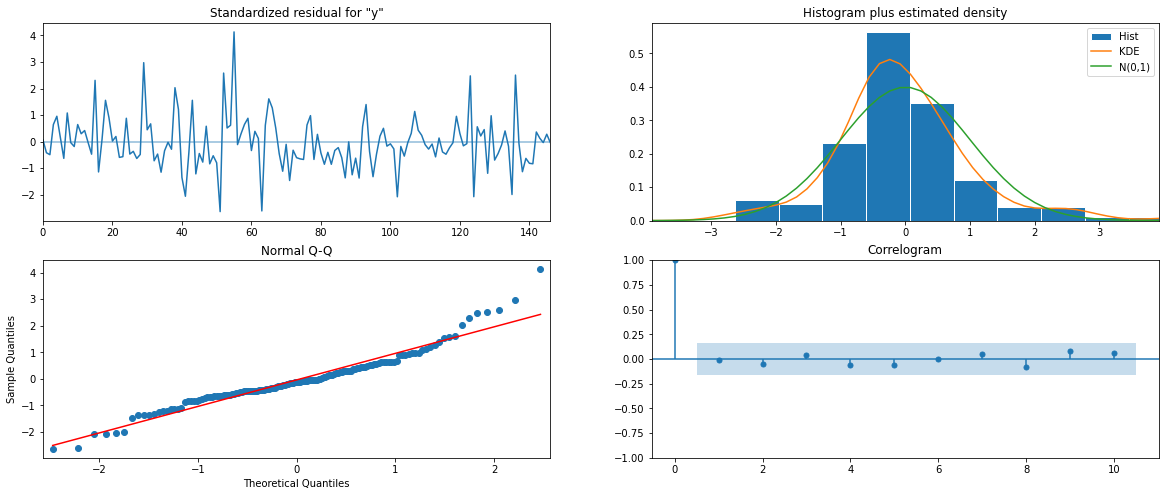

In [287]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

### The above 4 plots in the residuals diagnostic plots tell us: 

- **Standardized residuals plot**: <i>The top left plot shows 1-step-ahead standardized residuals. 
    If model is working correctly, then no pattern should be obvious in the residuals which is clearly not visible from the plot as well .</i>



- **Histogram plus estimated density plot**: <i>This plot shows the distribution of the residuals.The orange line shows a smoothed version of this histogram, and the green line shows a normal distribution. If the model is good these two lines should be the same. Here there are small differences between them, which indicate that our model is doing just well enough.</i>



- **Normal Q-Q plot**: <i>The Q-Q plot compare the distribution of residuals to normal distribution. If the distribution of the residuals is normal, then all the points should lie along the red line, except for some values at the end, which is exactly happening in this case.</i>



- **Correlogram plot**: <i>The correlogram plot is the ACF plot of the residuals rather than the data. 95% of the correlations for lag >0  should not be significant (within the blue shades). If there is a significant correlation in the residuals, it means that there is information in the data that was not captured by the model, which is clearly not in this case</i> .

#### 12 months forecast values on the original full data:


In [288]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=12)

In [289]:
predicted_auto_SARIMA.summary_frame(alpha=0.05)

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1874.532382,390.425605,1109.312257,2639.752506
1,2487.731949,395.514932,1712.536927,3262.926970
2,3299.132345,395.815285,2523.348641,4074.916049
3,3937.424230,396.115411,3161.052291,4713.796169
4,6136.303106,396.415310,5359.343375,6913.262837
5,1251.537746,396.714986,473.990662,2029.084830
6,1583.922132,397.014455,805.788098,2362.056166
7,1842.201491,397.313780,1063.480792,2620.922190
8,1822.836520,397.612771,1043.529808,2602.143231
9,1668.250817,397.911540,888.358529,2448.143105


In [290]:
pred_auto_SARIMA_date = predicted_auto_SARIMA.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

In [291]:
rmse = mse(df1['Sparkling'][-12:],predicted_auto_SARIMA.predicted_mean,squared=False)
print(rmse)

208.1225497500507


#### Plotting the complete data and the forecasted values for next 12 months:

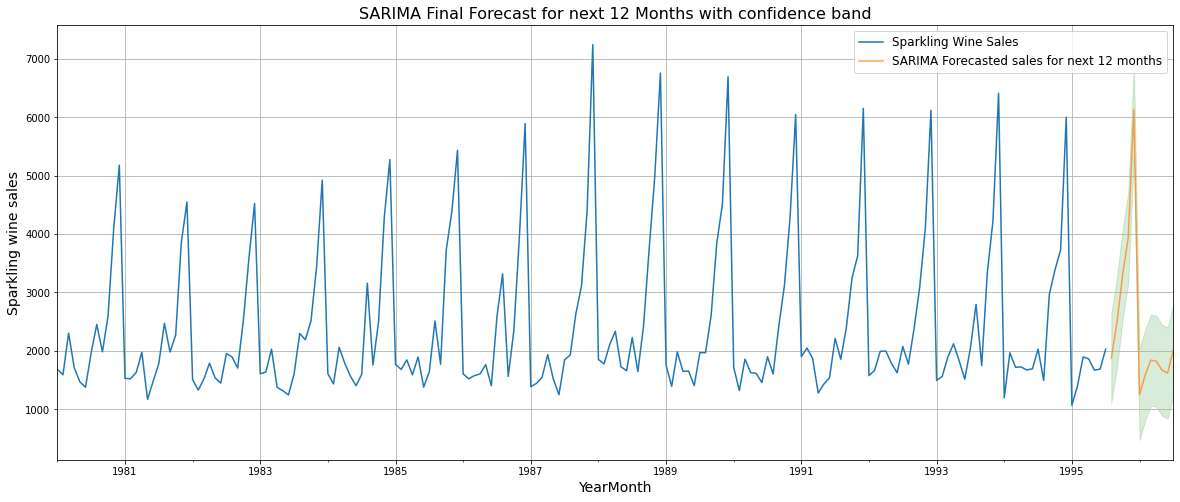

In [292]:
# plot the forecast along with the confidence band

axis = df1['Sparkling'].plot(label='Sparkling Wine Sales')

pred_auto_SARIMA_date['mean'].plot(ax=axis, label='SARIMA Forecasted sales for next 12 months', alpha=0.7)
axis.fill_between(pred_auto_SARIMA_date.index, pred_auto_SARIMA_date['mean_ci_lower'], 
                  pred_auto_SARIMA_date['mean_ci_upper'],color= 'g', alpha=.15)
axis.set_xlabel('YearMonth', fontsize=14)
axis.set_ylabel('Sparkling wine sales', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.title('SARIMA Final Forecast for next 12 Months with confidence band', fontsize=16)
plt.grid()
plt.show()

### Model Evaluation

In [293]:
rmse_final_model2 = mse(df1['Sparkling'][-12:],predicted_auto_SARIMA.predicted_mean,squared=False)
print("For 12 months SARIMA forecast on the complete Data,  RMSE is %3.3f" %(rmse_final_model2))


For 12 months SARIMA forecast on the complete Data,  RMSE is 208.123


In [294]:
resultsDf_final_model2 = pd.DataFrame({'Model RMSE': [rmse_final_model2]}
                           ,index=['SARIMA_forecast_full_data'])

resultsDf_final_model2 = pd.concat([resultsDf_final_model2, resultsDf_final_model1])
resultsDf_final_model2

,Model RMSE
SARIMA_forecast_full_data,208.122550
"⍺=0.3,β=0.3,𝛄=0.3,Triple_Expo_Smoothing_full_data",347.614364


# END